# Using physics-based features and clustered data by all features to train the e_electronic models for prediction

In [310]:
# import libraries
import os
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [311]:
# some constants
TEST_SIZE = 0.30
RANDOM_STATE = 42
N_SPLITS = 10

# the minimum number of samples in a train set  
MIN_TRAIN_SIZE = 0

TARGET = 'e_electronic'
FIG_PATH = '../../figures/domain_based/clustered/' + TARGET + '/'

In [312]:
# read_data
data = pd.read_csv('../../data/clustered_by_all_features/domain_based_data.csv')
data.head()

crystal_system  space_group  band_gap      volume   density  \
0               4           12    0.3593   66.249645  8.647377   
1               2          186    5.2239  488.540699  2.644605   
2               4           14    8.2939  417.193072  2.159094   
3               6          164    3.1183  179.999621  3.792487   
4               1           82    0.8566  176.302334  4.805648   

   density_atomic  formation_energy_per_atom  MagpieData minimum Number  \
0       16.562411                  -1.022655                        8.0   
1       22.206395                  -2.775097                        8.0   
2       13.037283                  -2.928047                        5.0   
3       16.363602                  -2.462943                        8.0   
4       25.186048                  -0.806761                       25.0   

   MagpieData maximum Number  MagpieData range Number  ...  \
0                       80.0                     72.0  ...   
1                       20.0                     12.0  ...   
2                        9.0                      4.0  ...   
3                       42.0                     34.0  ...   
4                       34.0                      9.0  ...   

   MagpieData mean CovalentRadius  MagpieData minimum Electronegativity  \
0                      102.000000                                  1.69   
1                      125.636364                                  1.00   
2                       63.750000                                  2.04   
3                       91.909091                                  1.33   
4                      123.285714                                  1.55   

   MagpieData maximum Electronegativity  MagpieData range Electronegativity  \
0                                  3.44                                1.75   
1                                  3.44                                2.44   
2                                  3.98                                1.94   
3                                  3.44                                2.11   
4                                  2.55                                1.00   

   MagpieData mean Electronegativity  cluster  e_electronic   e_ionic  \
0                           2.642500        6      5.807363  3.770194   
1                           2.400000        1      3.229764  8.055110   
2                           3.495000        5      1.624871  0.563809   
3                           3.015455        3      3.727241  7.620234   
4                           2.195714        6      7.738875  3.180481   

     e_total  class  
0   9.577558  train  
1  11.284874  train  
2   2.188679  train  
3  11.347476  train  
4  10.919357  train  

[5 rows x 24 columns]

In [313]:
data_train = data[data['class'] == 'train']
data_test = data[data['class'] == 'test']
display(data_train.head())
display(data_test.head())
print(data_train.shape)
print(data_test.shape)

crystal_system  space_group  band_gap      volume   density  \
0               4           12    0.3593   66.249645  8.647377   
1               2          186    5.2239  488.540699  2.644605   
2               4           14    8.2939  417.193072  2.159094   
3               6          164    3.1183  179.999621  3.792487   
4               1           82    0.8566  176.302334  4.805648   

   density_atomic  formation_energy_per_atom  MagpieData minimum Number  \
0       16.562411                  -1.022655                        8.0   
1       22.206395                  -2.775097                        8.0   
2       13.037283                  -2.928047                        5.0   
3       16.363602                  -2.462943                        8.0   
4       25.186048                  -0.806761                       25.0   

   MagpieData maximum Number  MagpieData range Number  ...  \
0                       80.0                     72.0  ...   
1                       20.0                     12.0  ...   
2                        9.0                      4.0  ...   
3                       42.0                     34.0  ...   
4                       34.0                      9.0  ...   

   MagpieData mean CovalentRadius  MagpieData minimum Electronegativity  \
0                      102.000000                                  1.69   
1                      125.636364                                  1.00   
2                       63.750000                                  2.04   
3                       91.909091                                  1.33   
4                      123.285714                                  1.55   

   MagpieData maximum Electronegativity  MagpieData range Electronegativity  \
0                                  3.44                                1.75   
1                                  3.44                                2.44   
2                                  3.98                                1.94   
3                                  3.44                                2.11   
4                                  2.55                                1.00   

   MagpieData mean Electronegativity  cluster  e_electronic   e_ionic  \
0                           2.642500        6      5.807363  3.770194   
1                           2.400000        1      3.229764  8.055110   
2                           3.495000        5      1.624871  0.563809   
3                           3.015455        3      3.727241  7.620234   
4                           2.195714        6      7.738875  3.180481   

     e_total  class  
0   9.577558  train  
1  11.284874  train  
2   2.188679  train  
3  11.347476  train  
4  10.919357  train  

[5 rows x 24 columns]

crystal_system  space_group  band_gap      volume   density  \
5083               2          189    0.9245  473.246667  3.461689   
5084               6          162    0.0000   87.320161  5.791205   
5085               5            2    1.3114  565.922230  3.367404   
5086               4           12    1.8083  269.068882  4.987902   
5087               4           15    3.4886  242.560637  3.970266   

      density_atomic  formation_energy_per_atom  MagpieData minimum Number  \
5083       39.437222                  -1.164229                       34.0   
5084        9.702240                  -1.597766                        8.0   
5085       20.960083                  -1.130545                        1.0   
5086       11.211203                  -1.781247                        8.0   
5087       12.128032                  -2.794766                        8.0   

      MagpieData maximum Number  MagpieData range Number  ...  \
5083                       37.0                      3.0  ...   
5084                       33.0                     25.0  ...   
5085                       53.0                     52.0  ...   
5086                       51.0                     43.0  ...   
5087                       49.0                     41.0  ...   

      MagpieData mean CovalentRadius  MagpieData minimum Electronegativity  \
5083                      170.000000                                  0.82   
5084                       84.222222                                  1.91   
5085                       74.851852                                  1.31   
5086                      106.750000                                  0.93   
5087                       92.600000                                  0.93   

      MagpieData maximum Electronegativity  \
5083                                  2.55   
5084                                  3.44   
5085                                  3.44   
5086                                  3.44   
5087                                  3.44   

      MagpieData range Electronegativity  MagpieData mean Electronegativity  \
5083                                1.73                           1.685000   
5084                                1.53                           2.990000   
5085                                2.13                           2.578889   
5086                                2.51                           2.441667   
5087                                2.51                           2.715000   

      cluster  e_electronic    e_ionic    e_total  class  
5083       10      3.363473   2.902911   6.266384   test  
5084        9      4.294284   6.486058  10.780343   test  
5085       10      5.133890  19.865435  24.999325   test  
5086        4      3.632911   5.267904   8.900815   test  
5087        8      3.027878   4.827287   7.855166   test  

[5 rows x 24 columns]

(5083, 24)
(2179, 24)


In [314]:
# drop class column
data_train = data_train.drop(['class'], axis=1)
data_test = data_test.drop(['class'], axis=1)
display(data_train.head())
display(data_test.head())

crystal_system  space_group  band_gap      volume   density  \
0               4           12    0.3593   66.249645  8.647377   
1               2          186    5.2239  488.540699  2.644605   
2               4           14    8.2939  417.193072  2.159094   
3               6          164    3.1183  179.999621  3.792487   
4               1           82    0.8566  176.302334  4.805648   

   density_atomic  formation_energy_per_atom  MagpieData minimum Number  \
0       16.562411                  -1.022655                        8.0   
1       22.206395                  -2.775097                        8.0   
2       13.037283                  -2.928047                        5.0   
3       16.363602                  -2.462943                        8.0   
4       25.186048                  -0.806761                       25.0   

   MagpieData maximum Number  MagpieData range Number  ...  \
0                       80.0                     72.0  ...   
1                       20.0                     12.0  ...   
2                        9.0                      4.0  ...   
3                       42.0                     34.0  ...   
4                       34.0                      9.0  ...   

   MagpieData range CovalentRadius  MagpieData mean CovalentRadius  \
0                             78.0                      102.000000   
1                            110.0                      125.636364   
2                             27.0                       63.750000   
3                            109.0                       91.909091   
4                             19.0                      123.285714   

   MagpieData minimum Electronegativity  MagpieData maximum Electronegativity  \
0                                  1.69                                  3.44   
1                                  1.00                                  3.44   
2                                  2.04                                  3.98   
3                                  1.33                                  3.44   
4                                  1.55                                  2.55   

   MagpieData range Electronegativity  MagpieData mean Electronegativity  \
0                                1.75                           2.642500   
1                                2.44                           2.400000   
2                                1.94                           3.495000   
3                                2.11                           3.015455   
4                                1.00                           2.195714   

   cluster  e_electronic   e_ionic    e_total  
0        6      5.807363  3.770194   9.577558  
1        1      3.229764  8.055110  11.284874  
2        5      1.624871  0.563809   2.188679  
3        3      3.727241  7.620234  11.347476  
4        6      7.738875  3.180481  10.919357  

[5 rows x 23 columns]

crystal_system  space_group  band_gap      volume   density  \
5083               2          189    0.9245  473.246667  3.461689   
5084               6          162    0.0000   87.320161  5.791205   
5085               5            2    1.3114  565.922230  3.367404   
5086               4           12    1.8083  269.068882  4.987902   
5087               4           15    3.4886  242.560637  3.970266   

      density_atomic  formation_energy_per_atom  MagpieData minimum Number  \
5083       39.437222                  -1.164229                       34.0   
5084        9.702240                  -1.597766                        8.0   
5085       20.960083                  -1.130545                        1.0   
5086       11.211203                  -1.781247                        8.0   
5087       12.128032                  -2.794766                        8.0   

      MagpieData maximum Number  MagpieData range Number  ...  \
5083                       37.0                      3.0  ...   
5084                       33.0                     25.0  ...   
5085                       53.0                     52.0  ...   
5086                       51.0                     43.0  ...   
5087                       49.0                     41.0  ...   

      MagpieData range CovalentRadius  MagpieData mean CovalentRadius  \
5083                            100.0                      170.000000   
5084                             58.0                       84.222222   
5085                            110.0                       74.851852   
5086                            100.0                      106.750000   
5087                            100.0                       92.600000   

      MagpieData minimum Electronegativity  \
5083                                  0.82   
5084                                  1.91   
5085                                  1.31   
5086                                  0.93   
5087                                  0.93   

      MagpieData maximum Electronegativity  \
5083                                  2.55   
5084                                  3.44   
5085                                  3.44   
5086                                  3.44   
5087                                  3.44   

      MagpieData range Electronegativity  MagpieData mean Electronegativity  \
5083                                1.73                           1.685000   
5084                                1.53                           2.990000   
5085                                2.13                           2.578889   
5086                                2.51                           2.441667   
5087                                2.51                           2.715000   

      cluster  e_electronic    e_ionic    e_total  
5083       10      3.363473   2.902911   6.266384  
5084        9      4.294284   6.486058  10.780343  
5085       10      5.133890  19.865435  24.999325  
5086        4      3.632911   5.267904   8.900815  
5087        8      3.027878   4.827287   7.855166  

[5 rows x 23 columns]

In [315]:
train_clusters = {}
for cluster, df in data_train.groupby('cluster'):
    train_clusters[cluster] = df

In [316]:
test_clusters = {}
for cluster, df in data_test.groupby('cluster'):
    test_clusters[cluster] = df

CLUSTER_NUMS = len(train_clusters)

## Some Help Function

In [328]:
# save the scalers, for later test data scaling
scalers = []

def get_train_test_set(cluster):
    X = train_clusters[cluster].drop(['e_electronic', 'e_total', 'e_ionic'], axis=1)
    cluster_scaler = StandardScaler()
    X_scaled_train = cluster_scaler.fit_transform(X)
    y_train = train_clusters[cluster][TARGET]
    scalers.append(cluster_scaler)

    X_test = test_clusters[cluster].drop(['e_electronic', 'e_total', 'e_ionic'], axis=1)
    y_test = test_clusters[cluster][TARGET]
    X_scaled_test = cluster_scaler.transform(X_test)

    return X_scaled_train, y_train, X_scaled_test, y_test

def model_test(model, X_test, y_test):
    '''Test the model on the test set and return the results:
        1. mean_squared_error
        2. mean_absolute_error
        3. y_pred'''
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae, y_pred

def model_cross_train(model, X, y):
    '''Train the model model on X and return the results of cross-validation:
        1. scores（neg_root_mean_squared_error）
        2. y_hat'''
    kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
    y_hat = cross_val_predict(model, X, y, cv=kfold)
    return scores, y_hat

# After determining all the hyperparameters, train the model on the entire training set with the best hyperparameters
def model_final_train(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

## Models

In [318]:
# draw parity plot
def parity_plot(mse, mae, y_test, y_pred, y_name=TARGET, title='Parity Plot', fig_path=None, dpi=300):
    # draw parity plot
    fig, ax = plt.subplots(figsize=(8, 8), dpi=dpi)
    ax.scatter(y_test, y_pred, s=2, c="#9cc3e5", marker="^")
    ax.plot(y_test, y_test, c="#aad390", zorder=-5)
    ax.set_title(title)
    # relative dielectric constant, no unit
    ax.set_xlabel("Actual " + y_name)
    ax.set_ylabel("Predicted " + y_name)
    ax.set_xscale("log")
    ax.set_yscale("log")
    # make it diagonal distribution
    ax.set_aspect("equal", adjustable="box")
    # set the range of x and y to be the same
    ax.set_xlim([min(y_test), max(y_test)])
    ax.set_ylim([min(y_test), max(y_test)])
    # inward ticks
    ax.tick_params(axis='both', direction='in', length=4) 

    ax.grid(True, linestyle="--", alpha=0.4)
    
    # draw mse and mae on the plot of top_left
    # Add bbox to the plot
    bbox_props = dict(boxstyle="round,pad=0.8", ec="#aad390", lw=0.6, facecolor="white", alpha=0.6)
    ax.text(0.05, 0.95, "MSE: {:.2f}\n\nMAE: {:.2f}".format(mse, mae), transform=ax.transAxes, 
            fontsize=6, c='#9cc3e5', verticalalignment='top', bbox=bbox_props)

    plt.show()
    if fig_path:
        # Is there the directory of the fig_path
        if not os.path.exists(fig_path):
            os.makedirs(fig_path)
        fig.savefig(fig_path+title+".png", dpi=dpi, bbox_inches='tight')

In [319]:
def plot_scores(mse, mae, y_train, y_hat, title='Parity Plot', fig_path=None, dpi=300):
    '''...'''
    print(f'MSE: {mse}, MAE: {mae}')

    # parity plot
    parity_plot(mse, mae, y_train, y_hat, y_name=TARGET, title=title, fig_path=fig_path, dpi=dpi)

#### LinearRegression Model

In [320]:
def linear_regression(cluster):
    X_train, y_train, X_test, y_test = get_train_test_set(cluster)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    # test
    mse, mae, y_pred = model_test(lr, X_test, y_test)
    plot_scores(mse, mae, y_test, y_pred, title=f'Cluster {cluster} Linear Regression', fig_path=FIG_PATH)
    return lr, y_test, y_pred

Cluster 0 Linear Regression   Train set size: 371
MSE: 0.21295860300007294, MAE: 0.37289258399743924


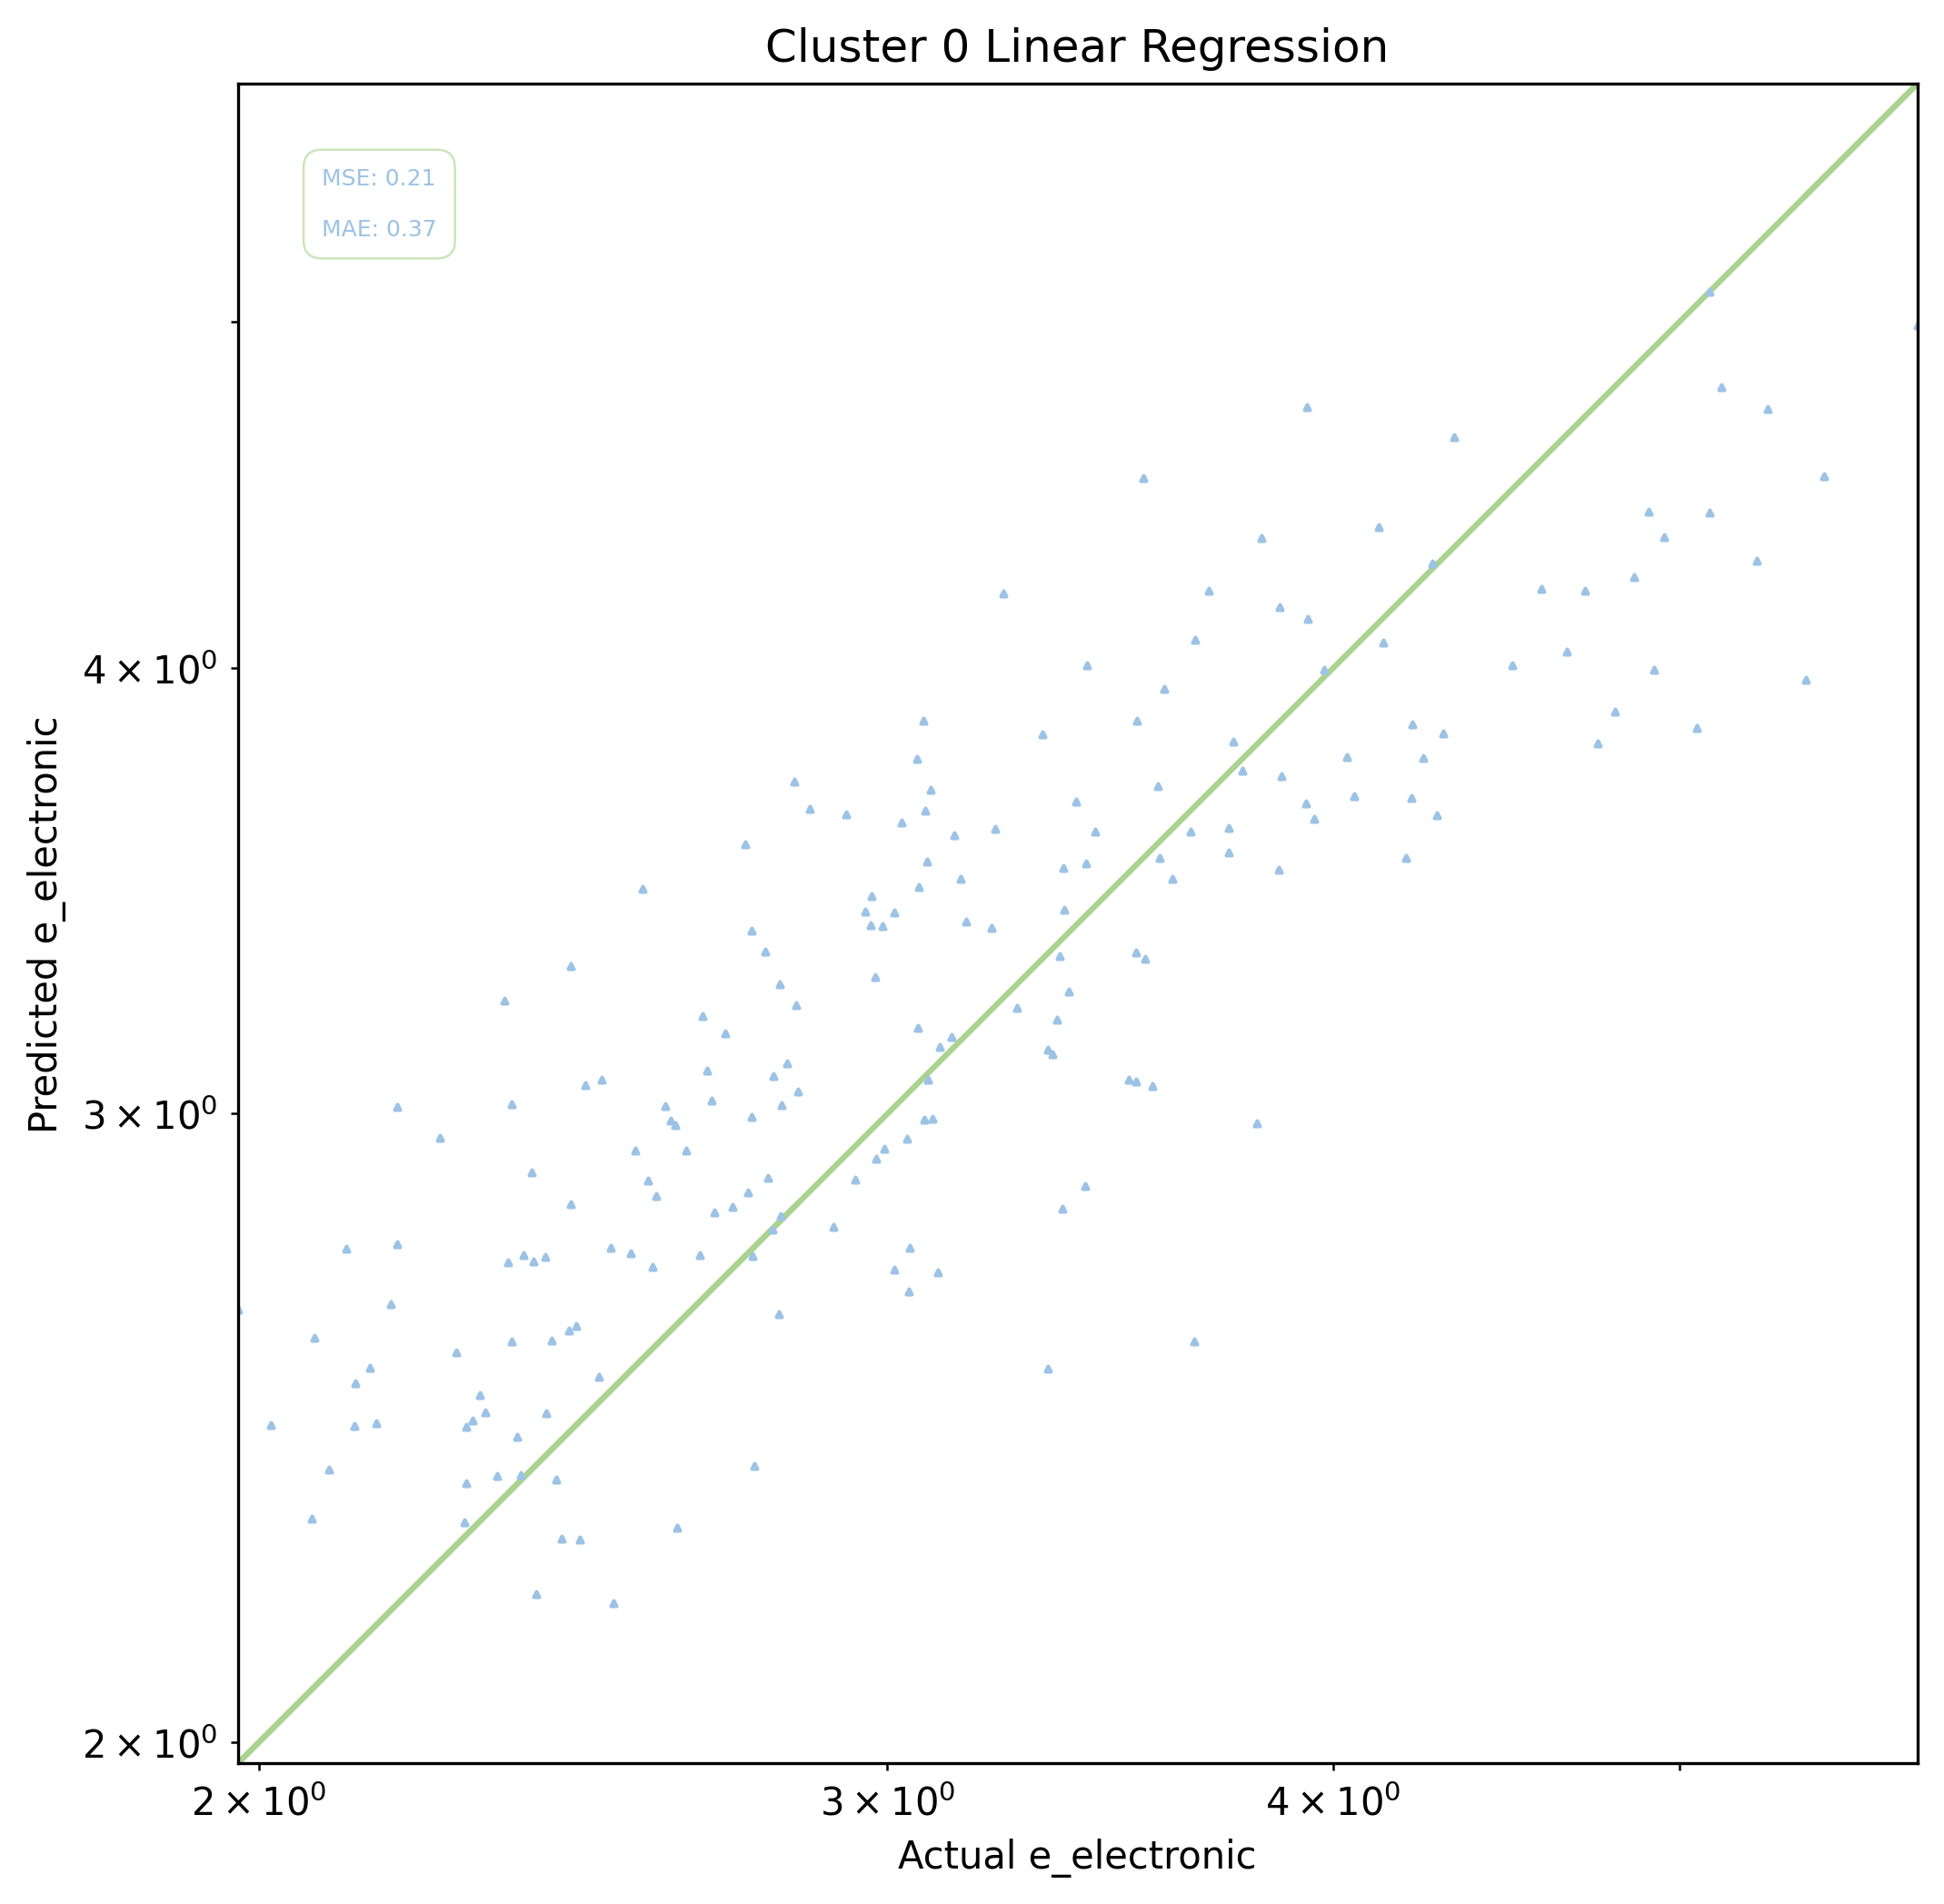

Cluster 1 Linear Regression   Train set size: 302
MSE: 0.04650032431044528, MAE: 0.16948733064450353


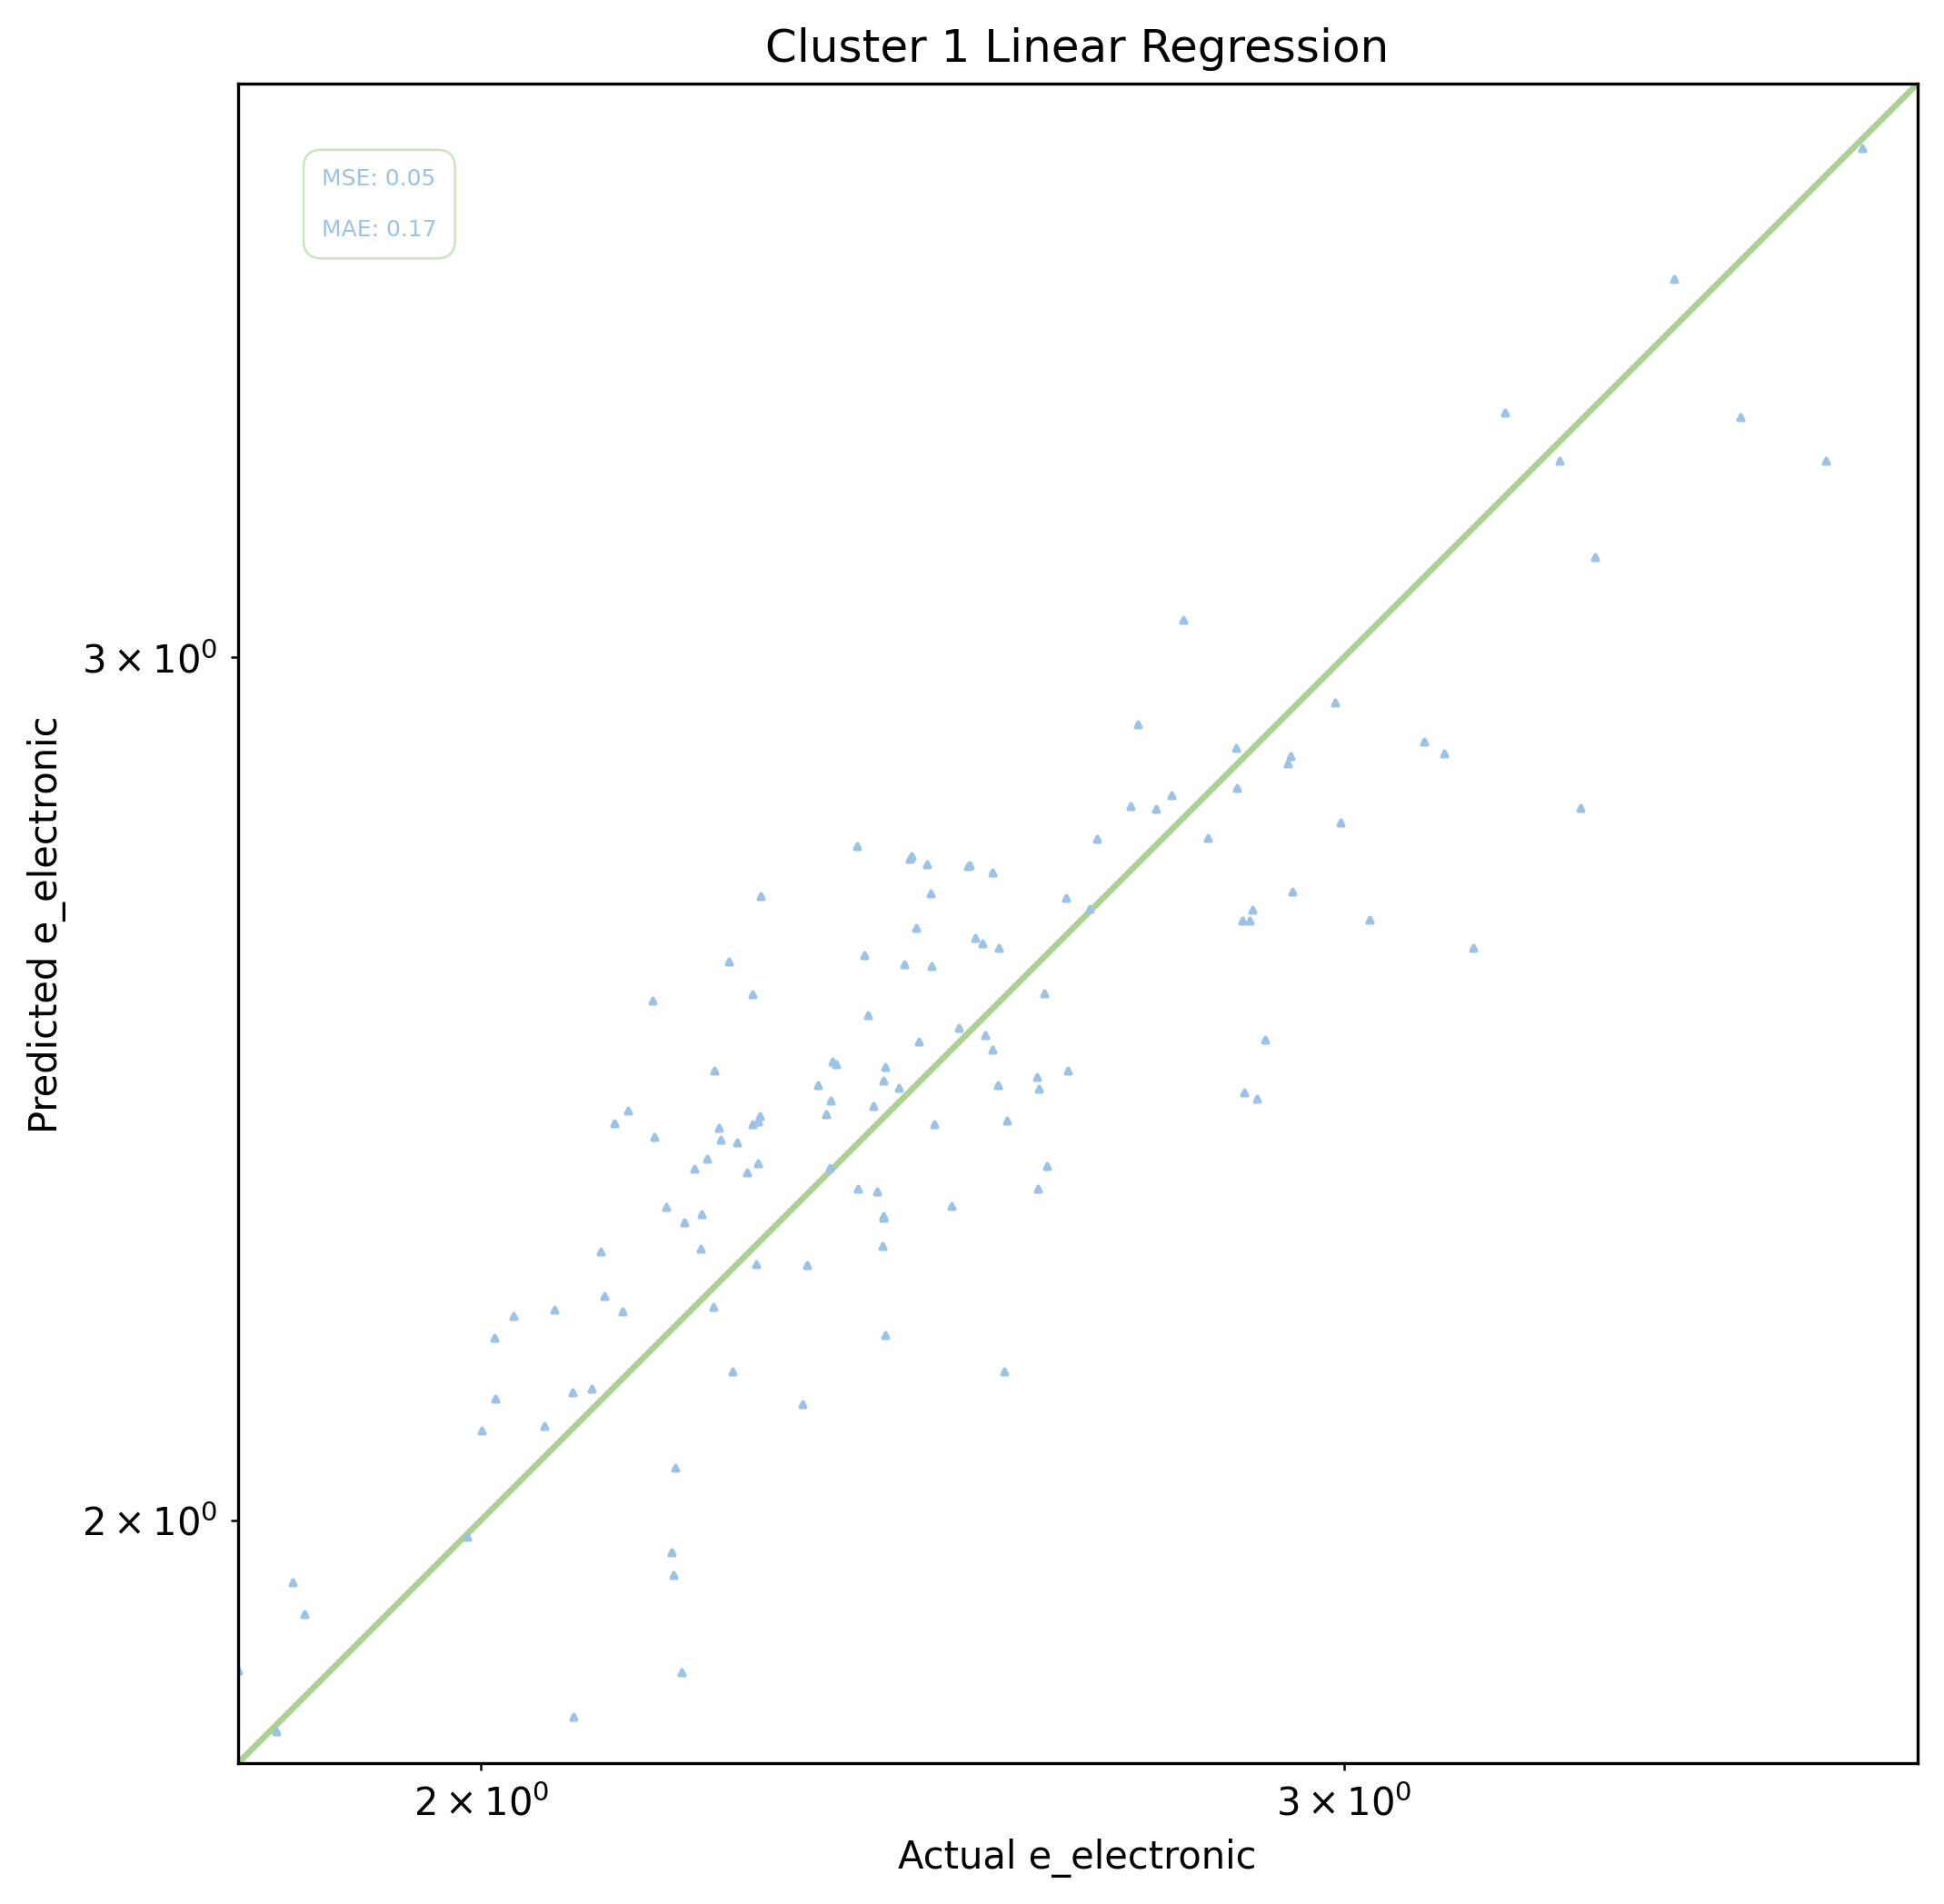

Cluster 2 Linear Regression   Train set size: 521
MSE: 0.7680137374858592, MAE: 0.6173171678986054


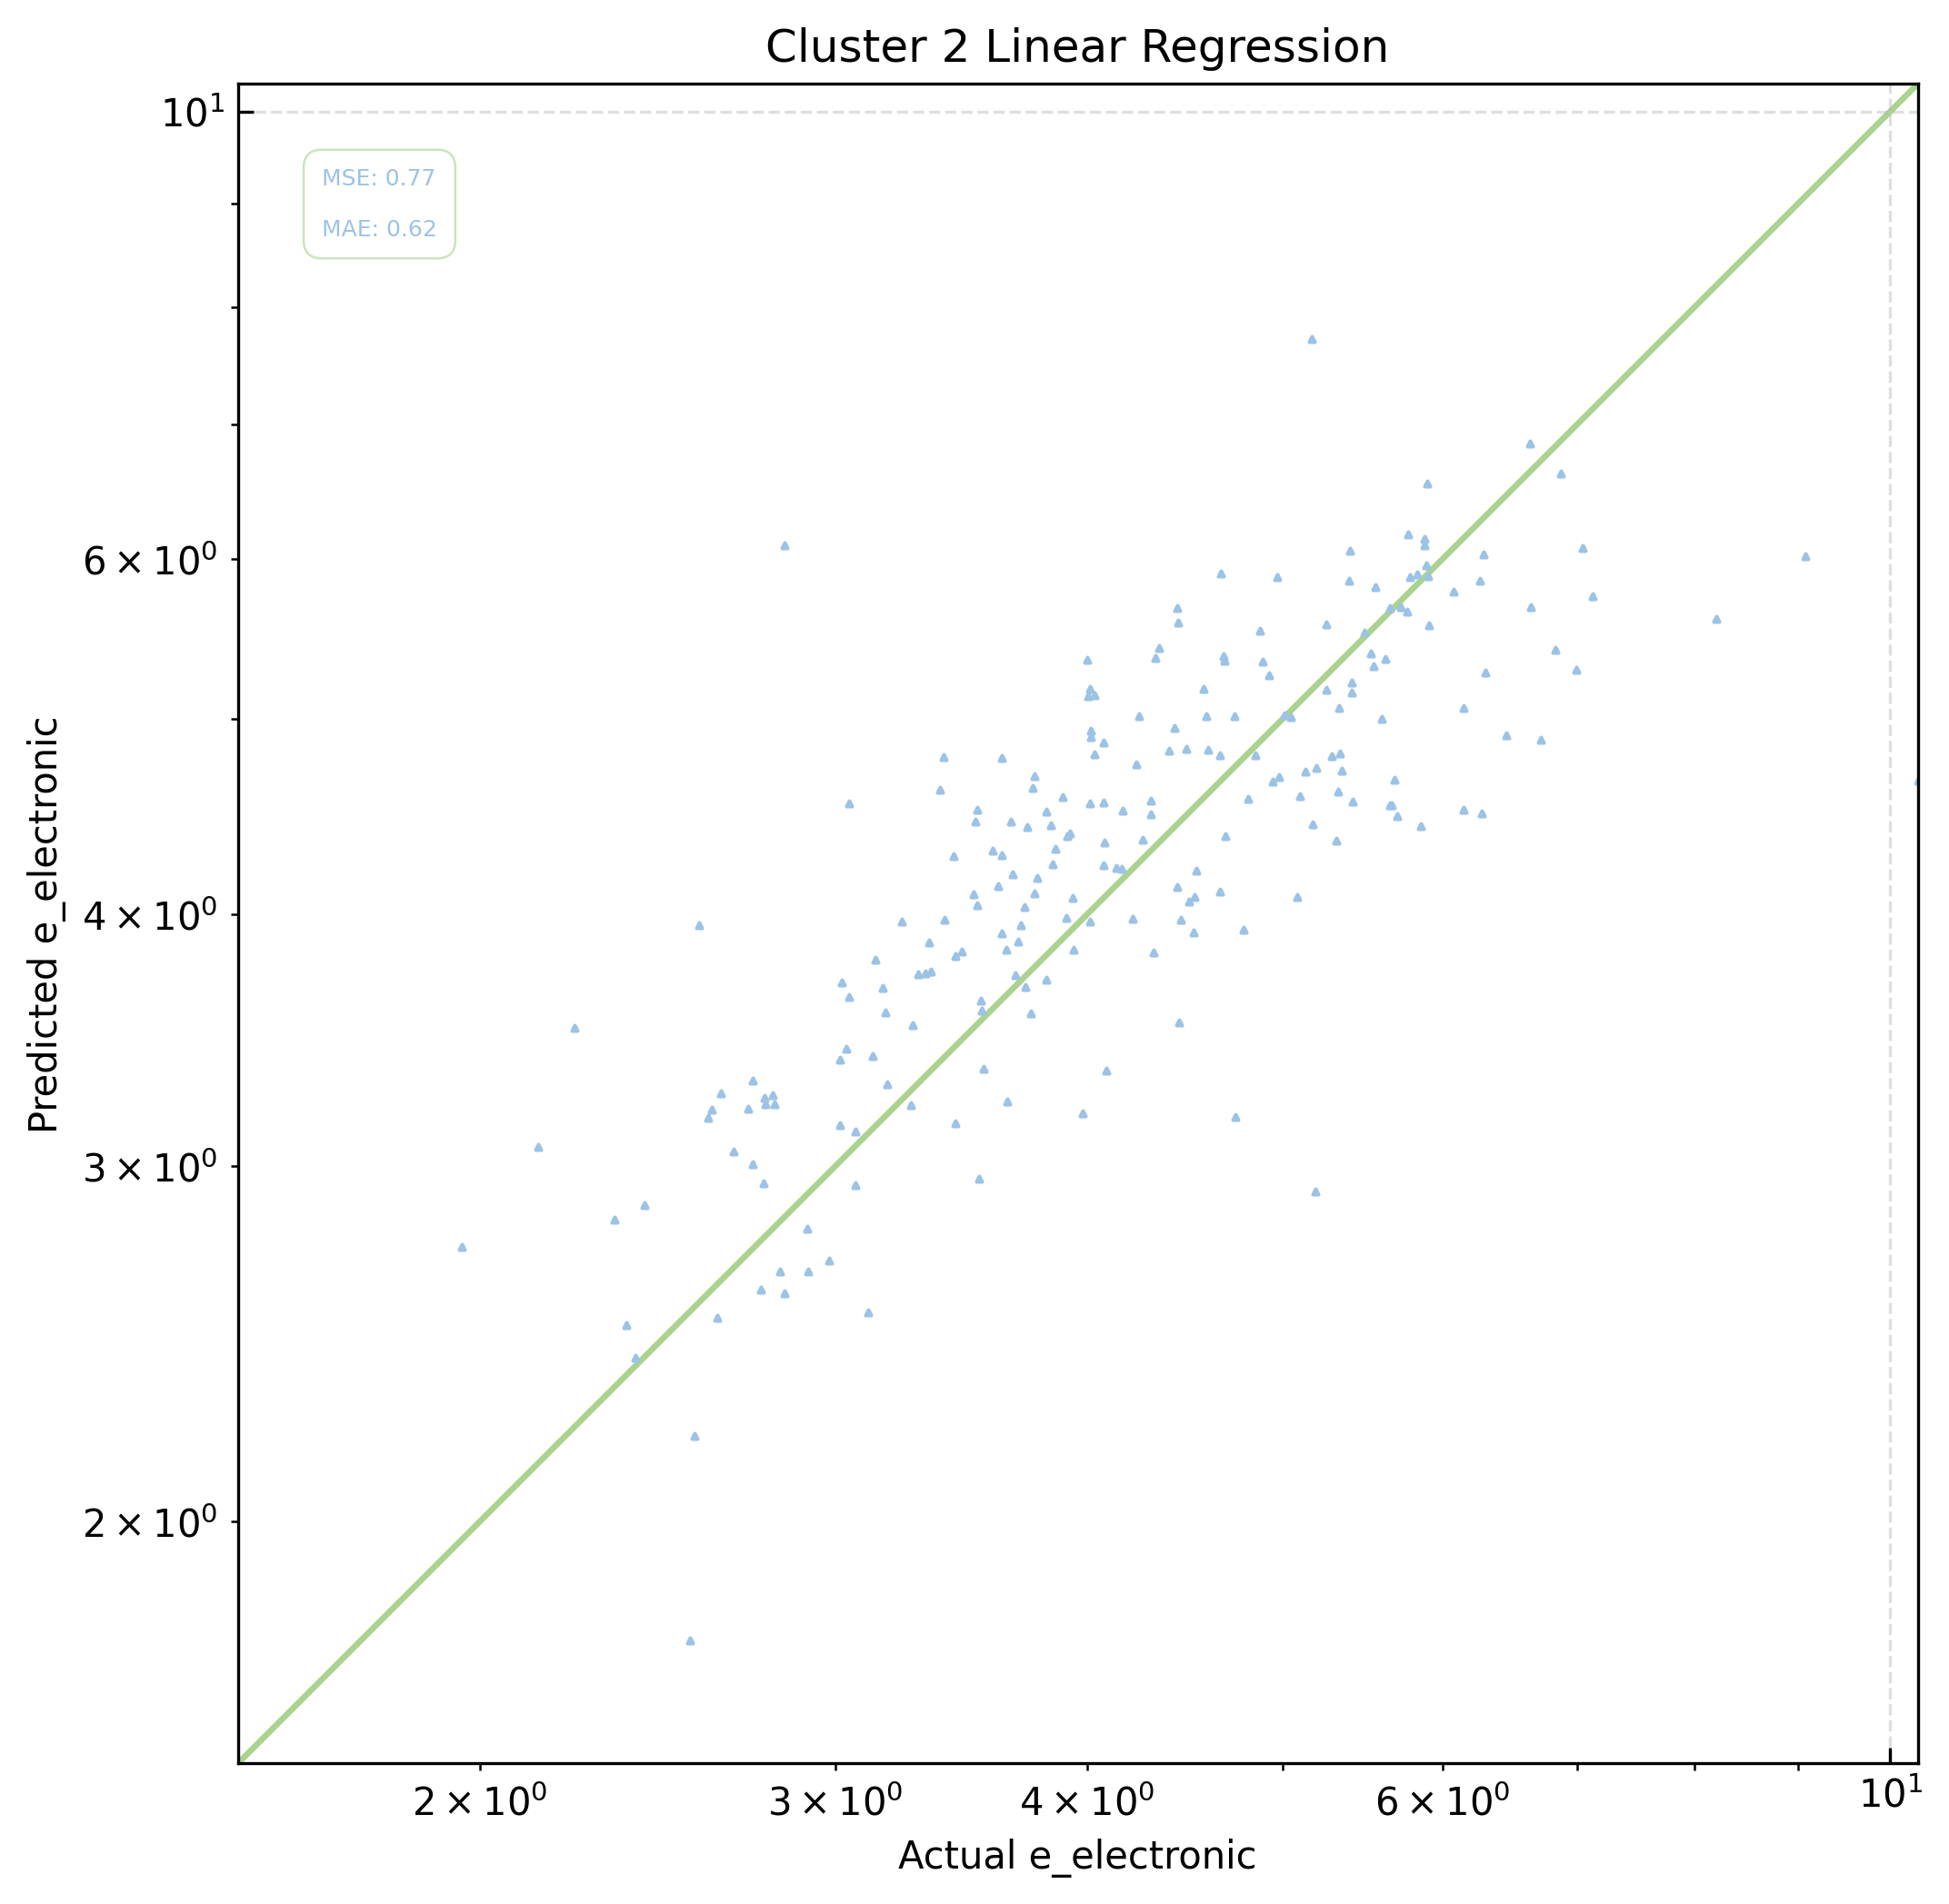

Cluster 3 Linear Regression   Train set size: 523
MSE: 70.69682046173392, MAE: 1.027645803170439


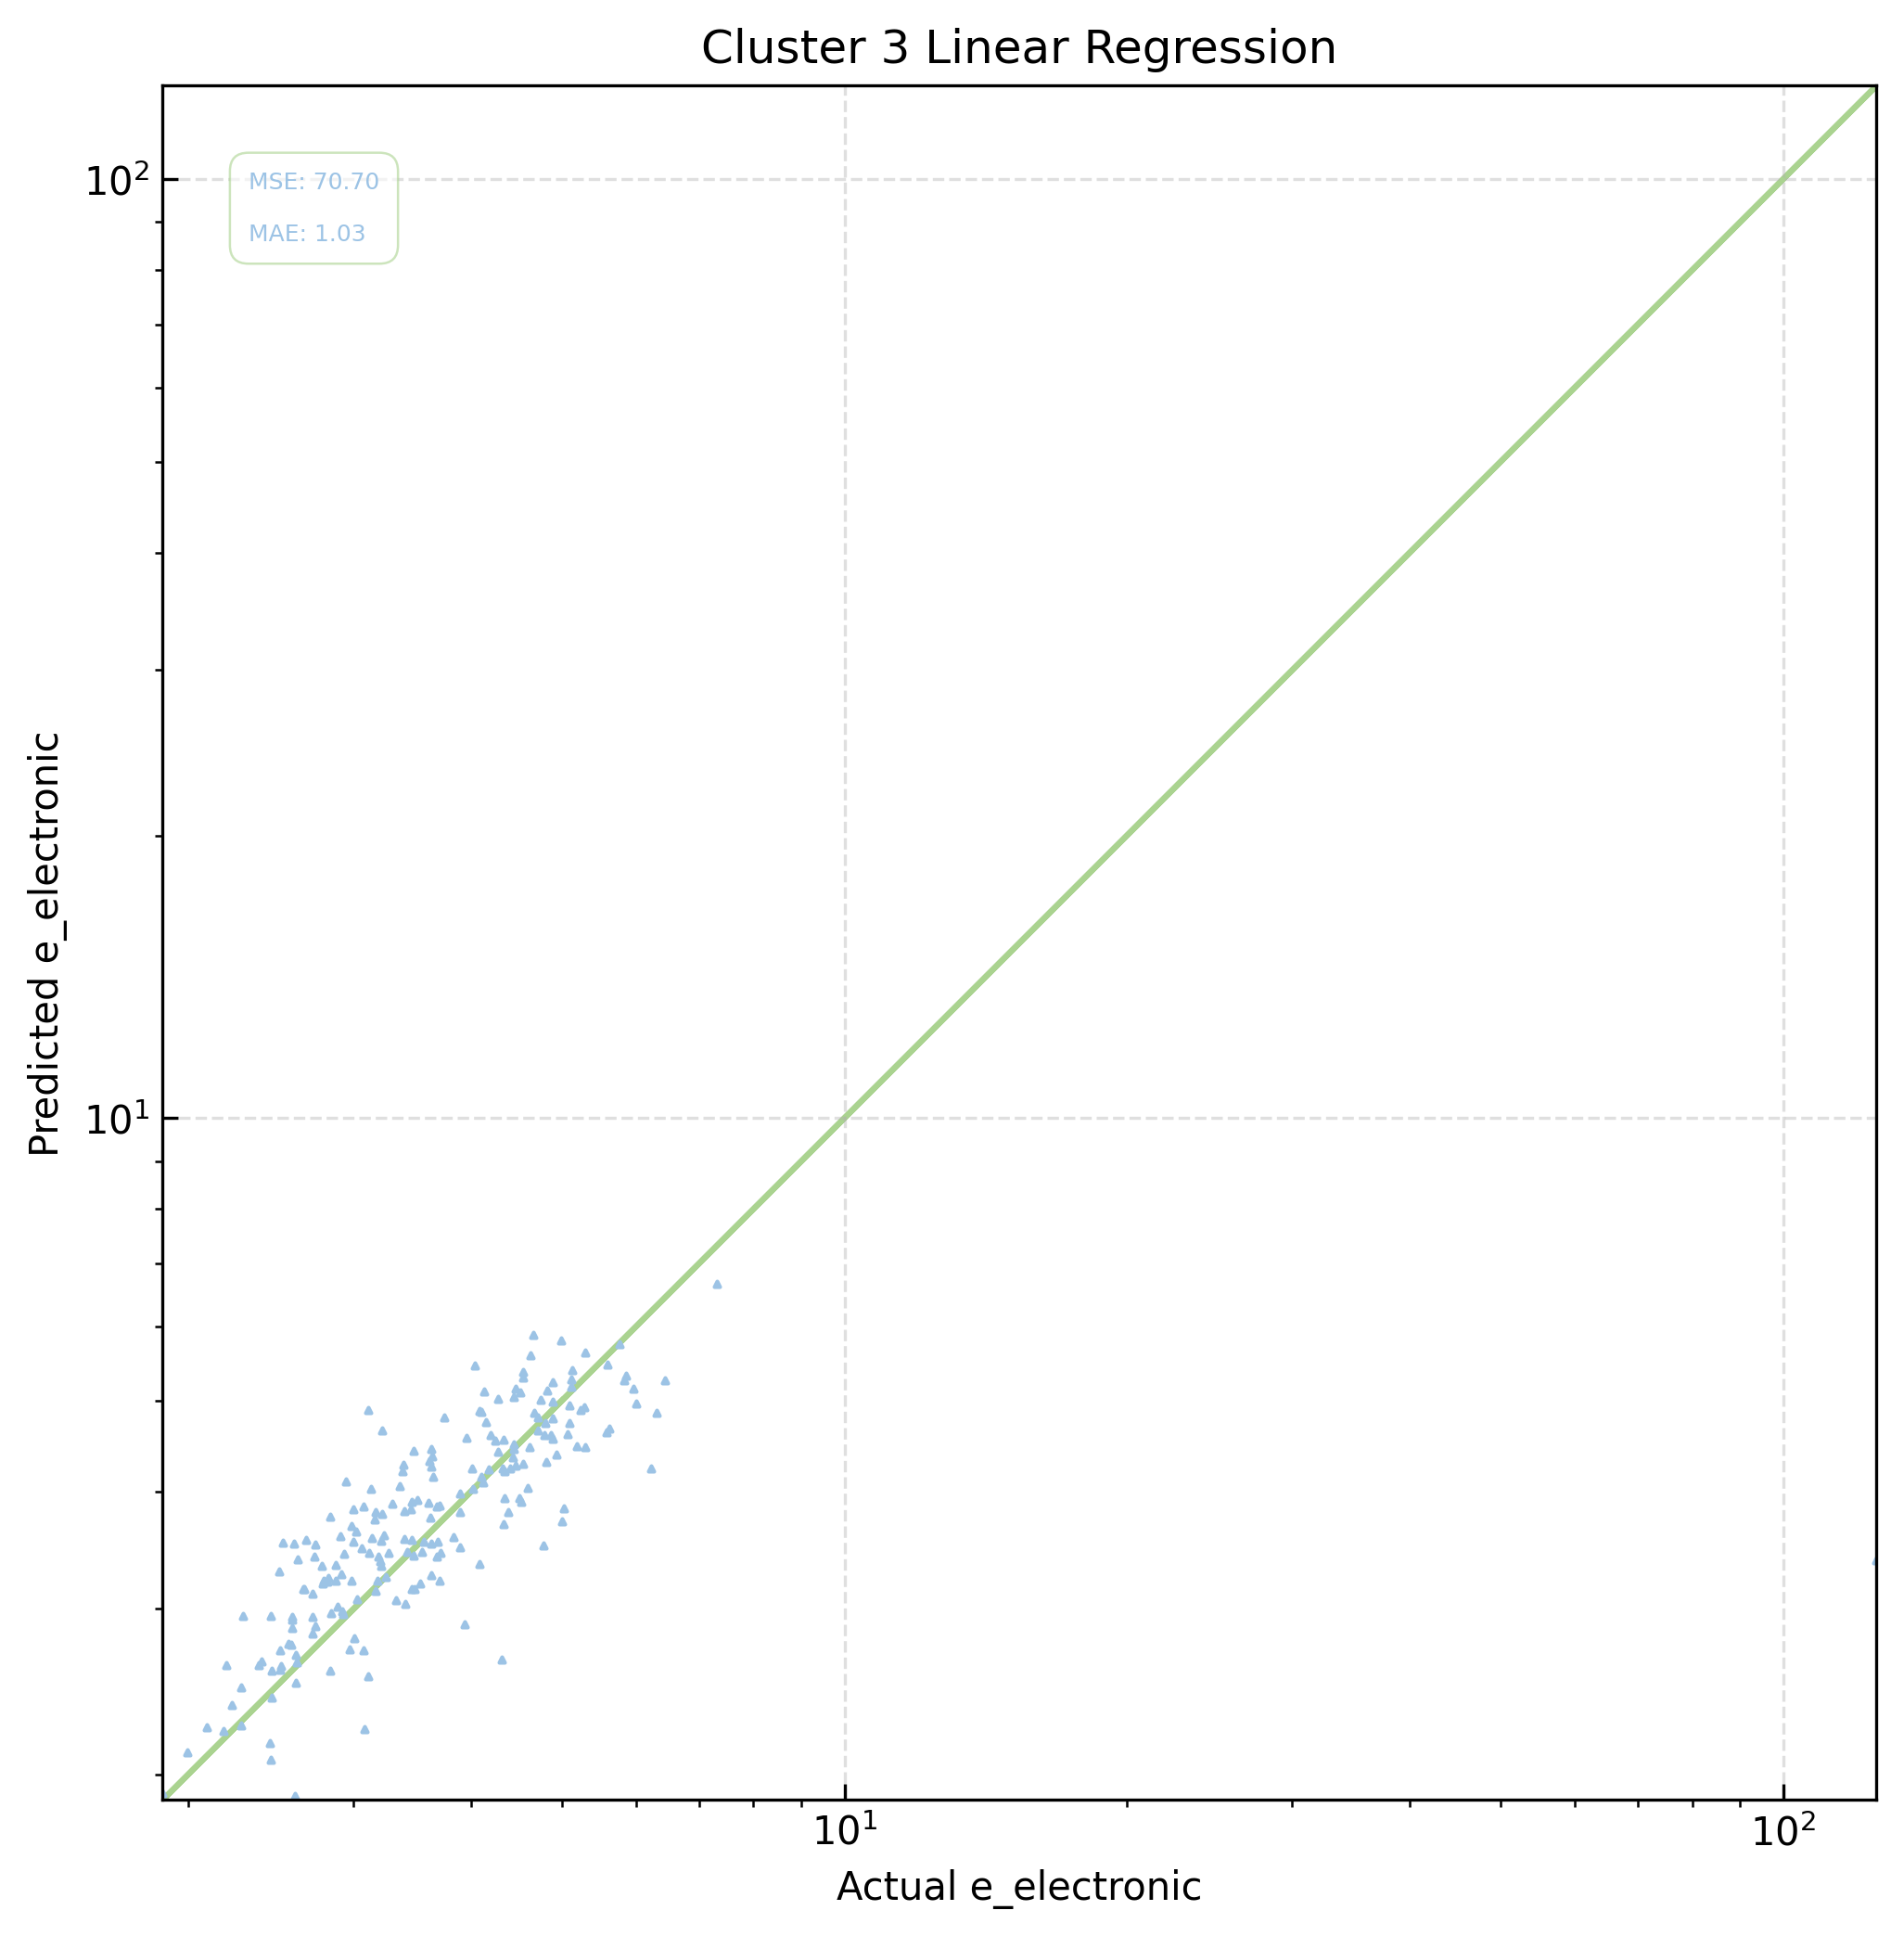

Cluster 4 Linear Regression   Train set size: 615
MSE: 0.7909797024126067, MAE: 0.6898743620515027


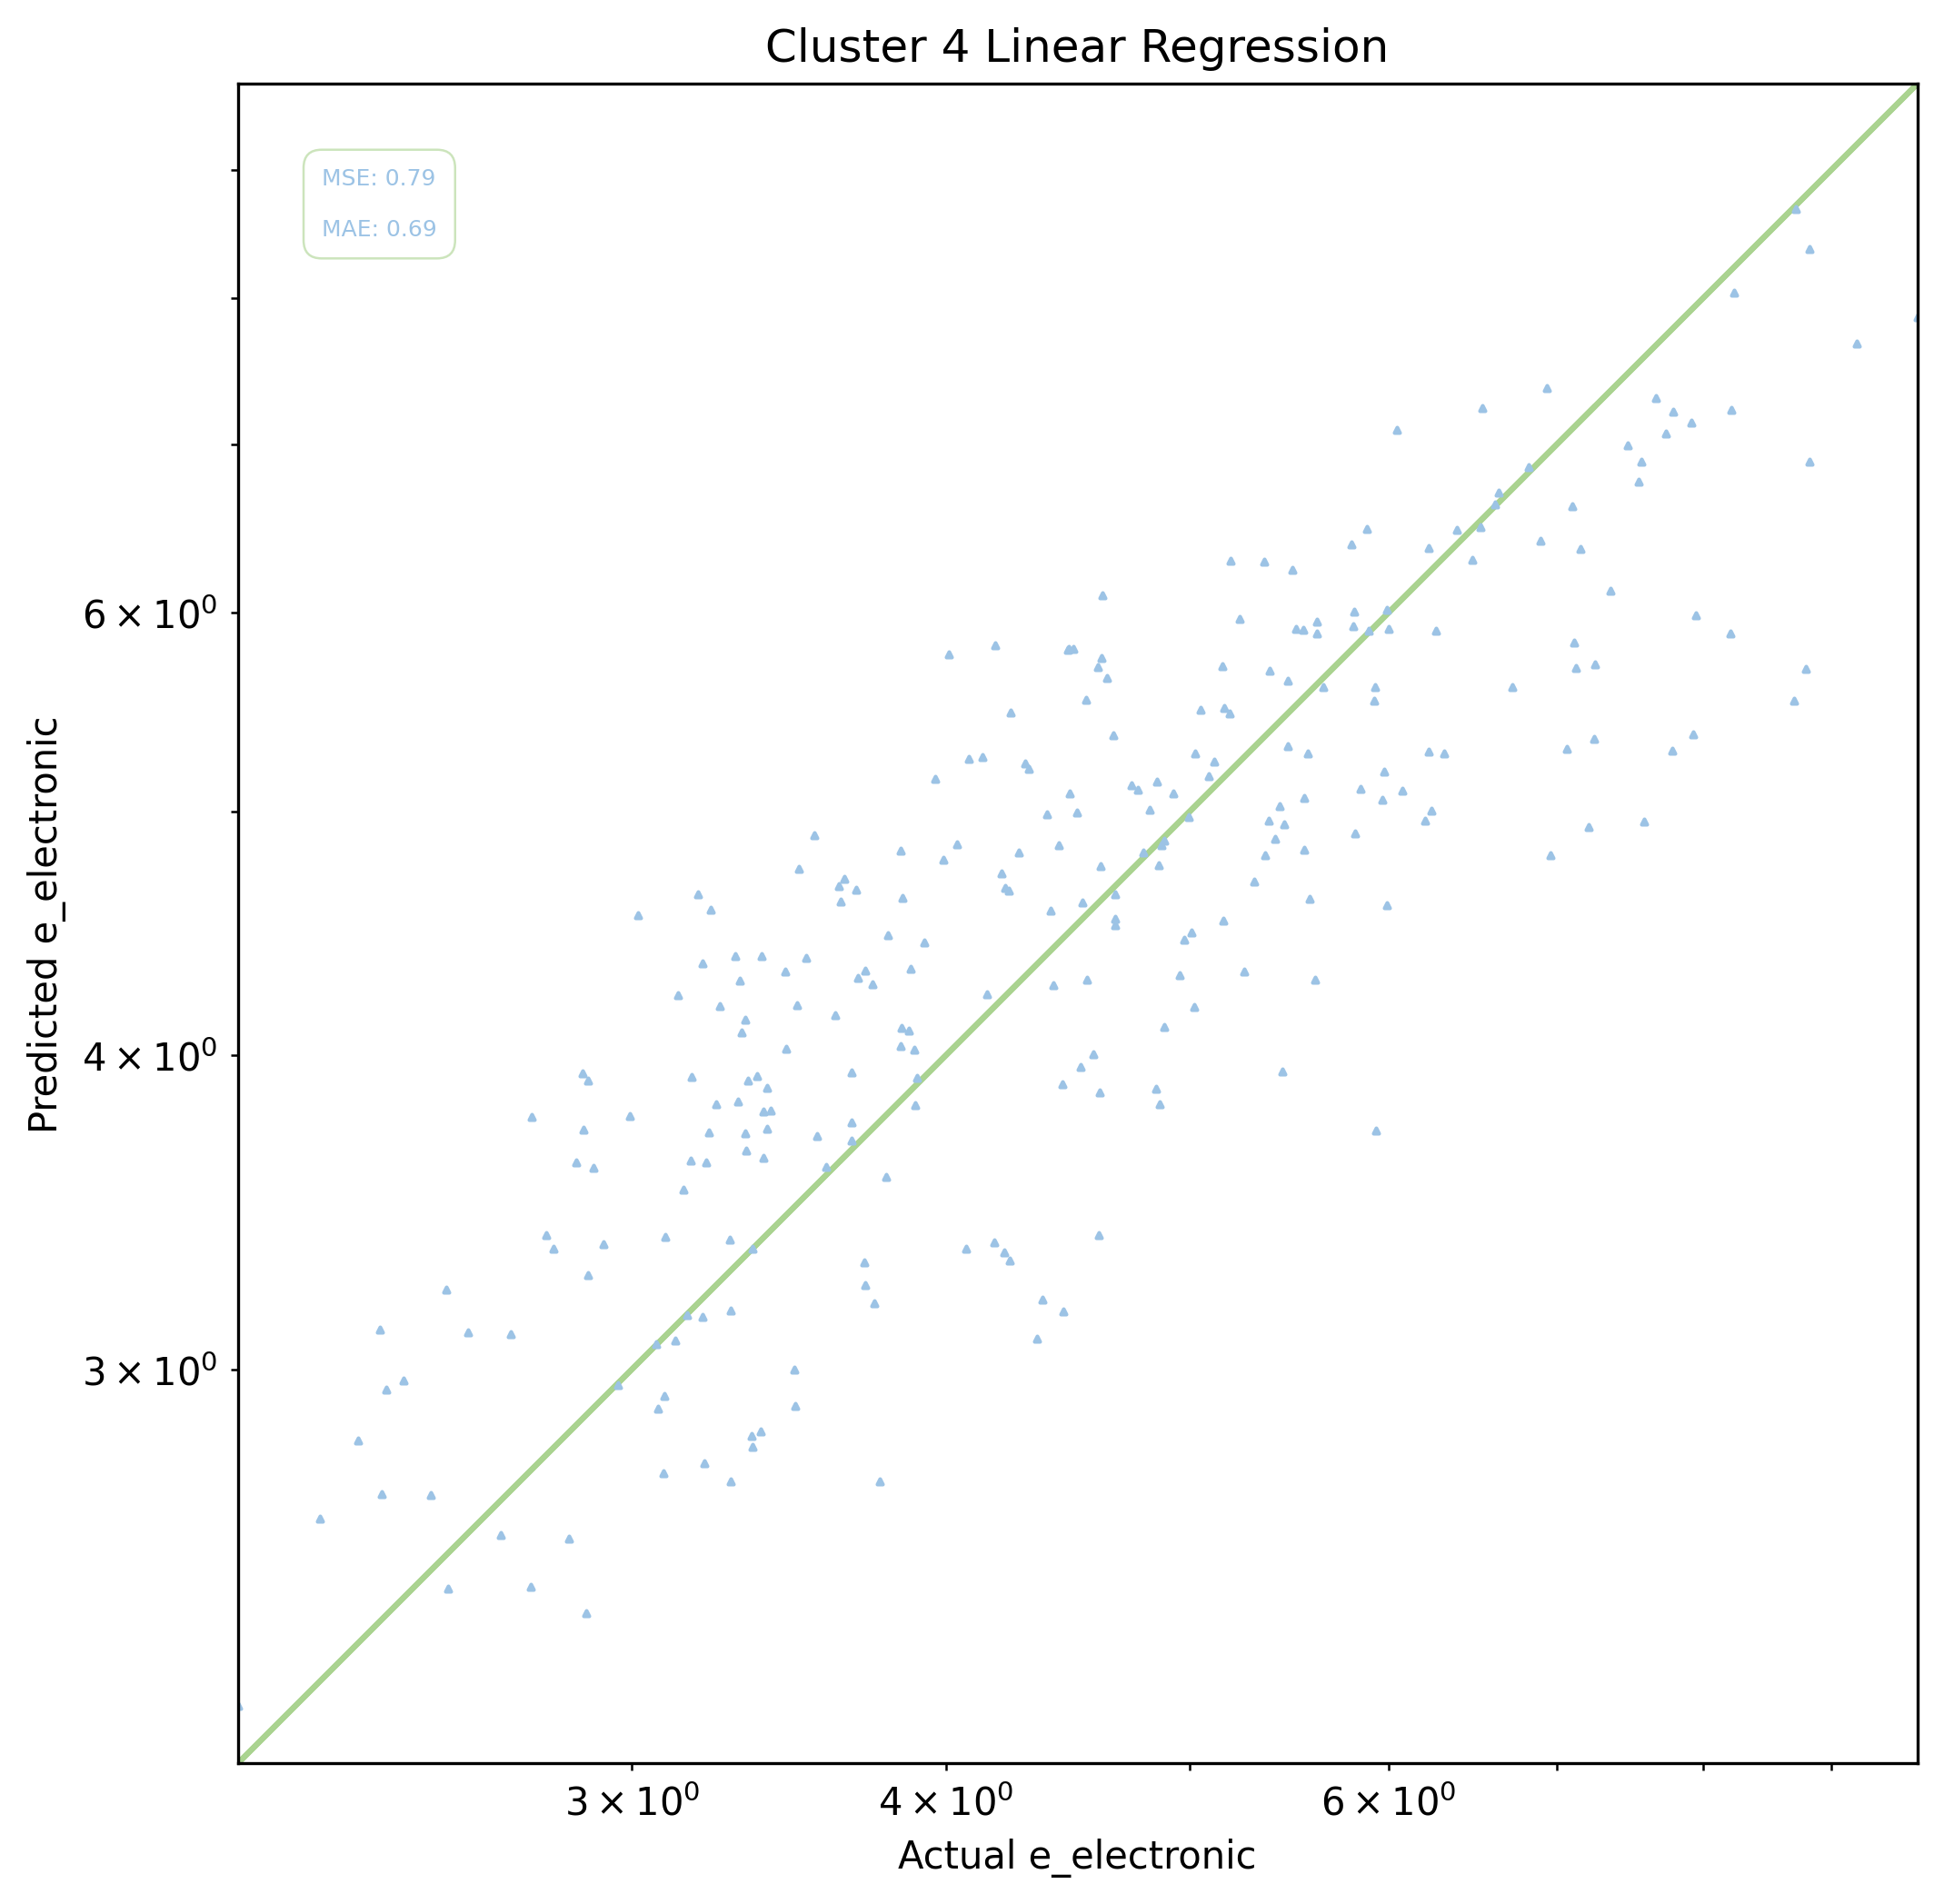

Cluster 5 Linear Regression   Train set size: 111
MSE: 0.02167221845542635, MAE: 0.10228414779027543


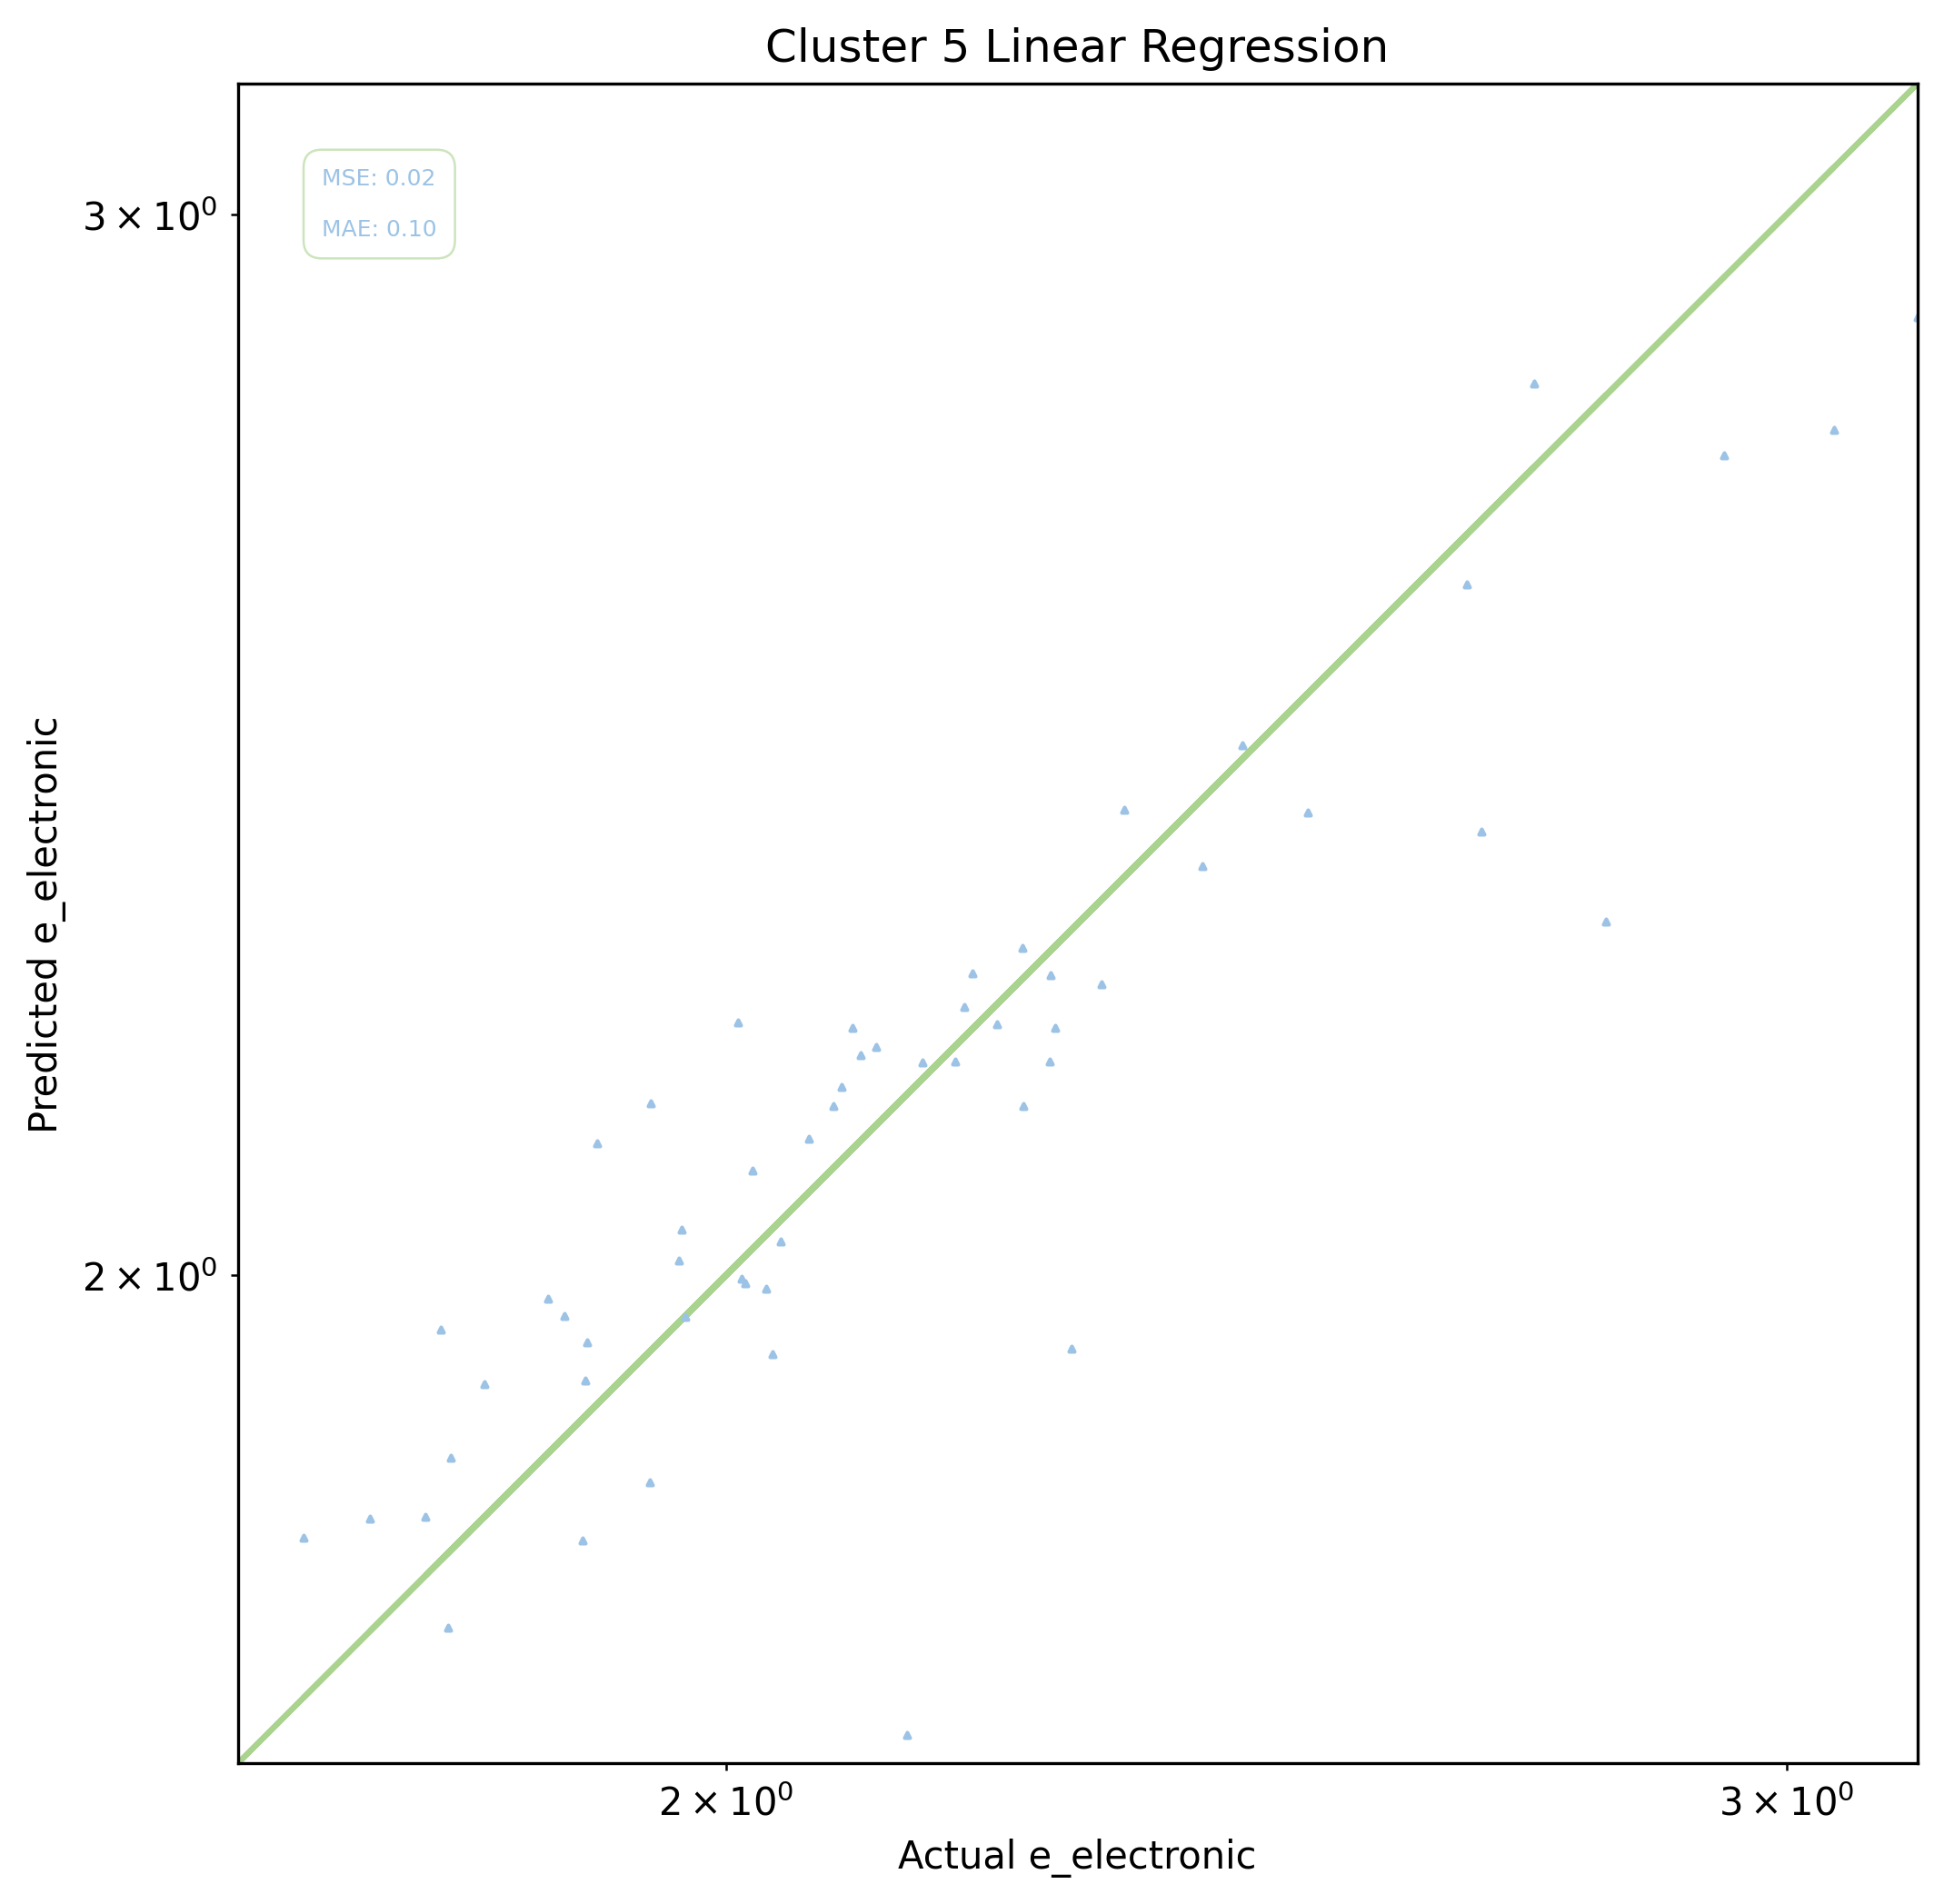

Cluster 6 Linear Regression   Train set size: 755
MSE: 706.8558604184174, MAE: 12.91921722427522


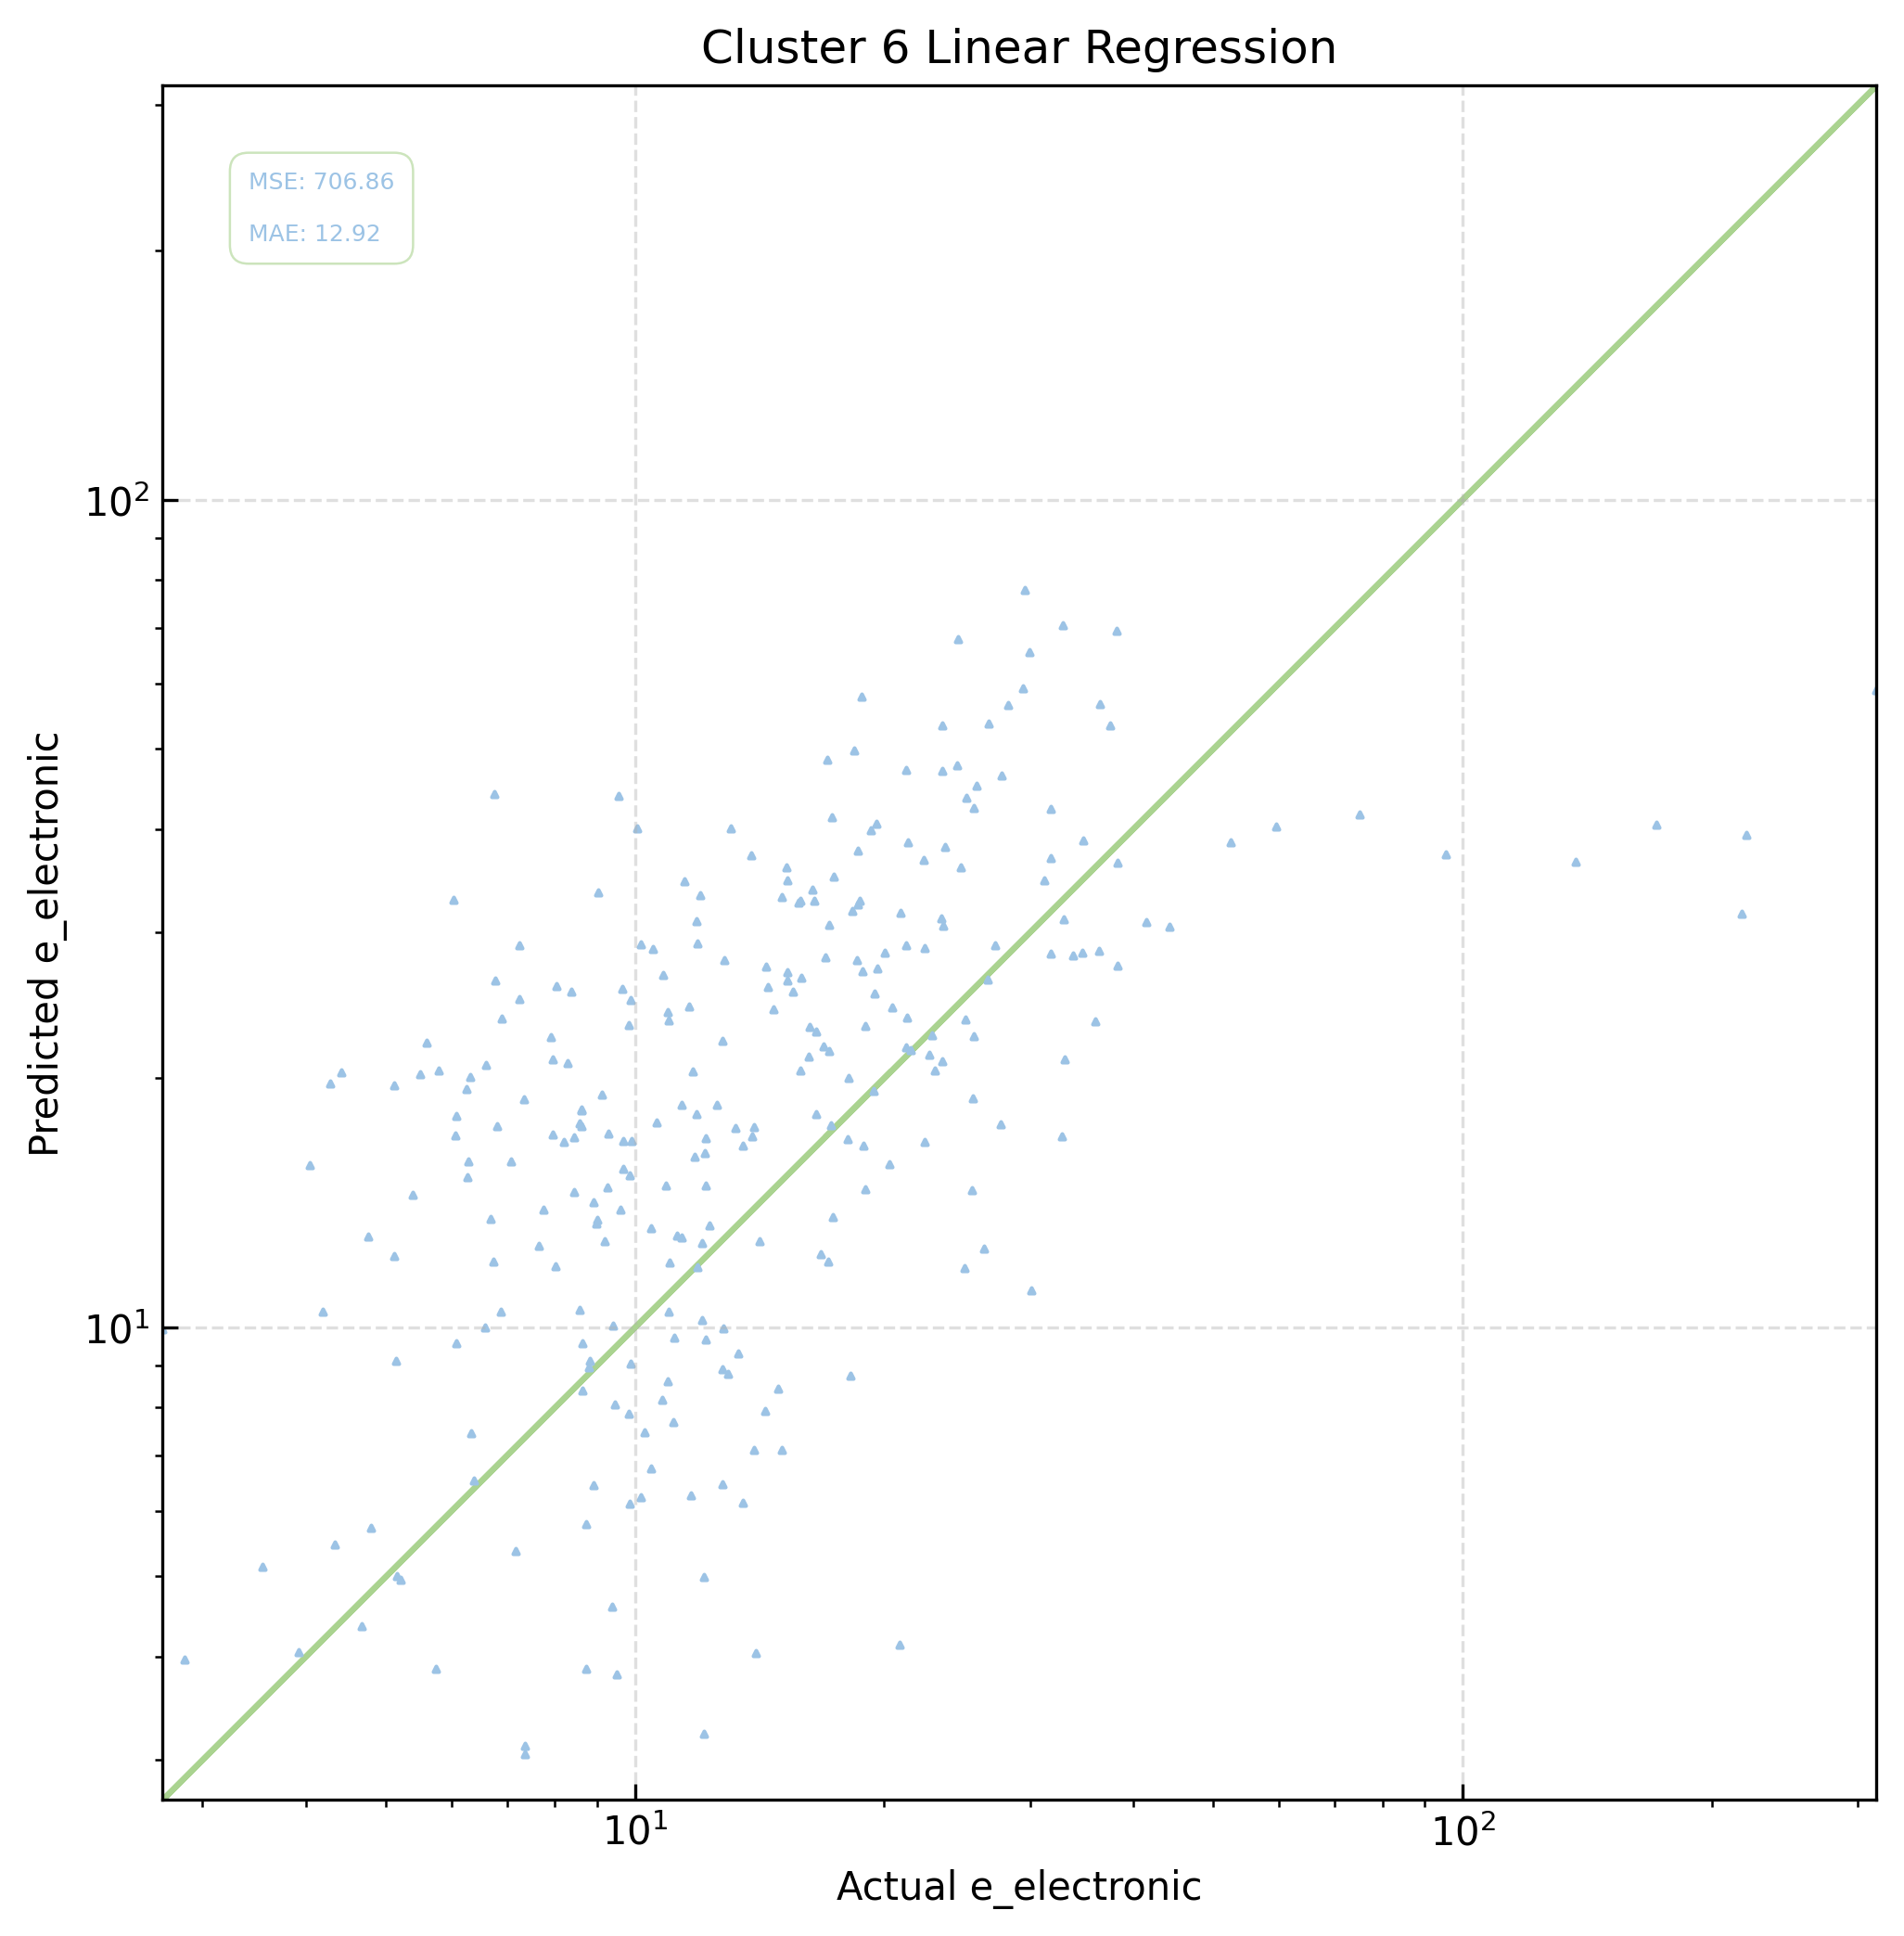

Cluster 7 Linear Regression   Train set size: 160
MSE: 0.045947616554787254, MAE: 0.15914404487498032


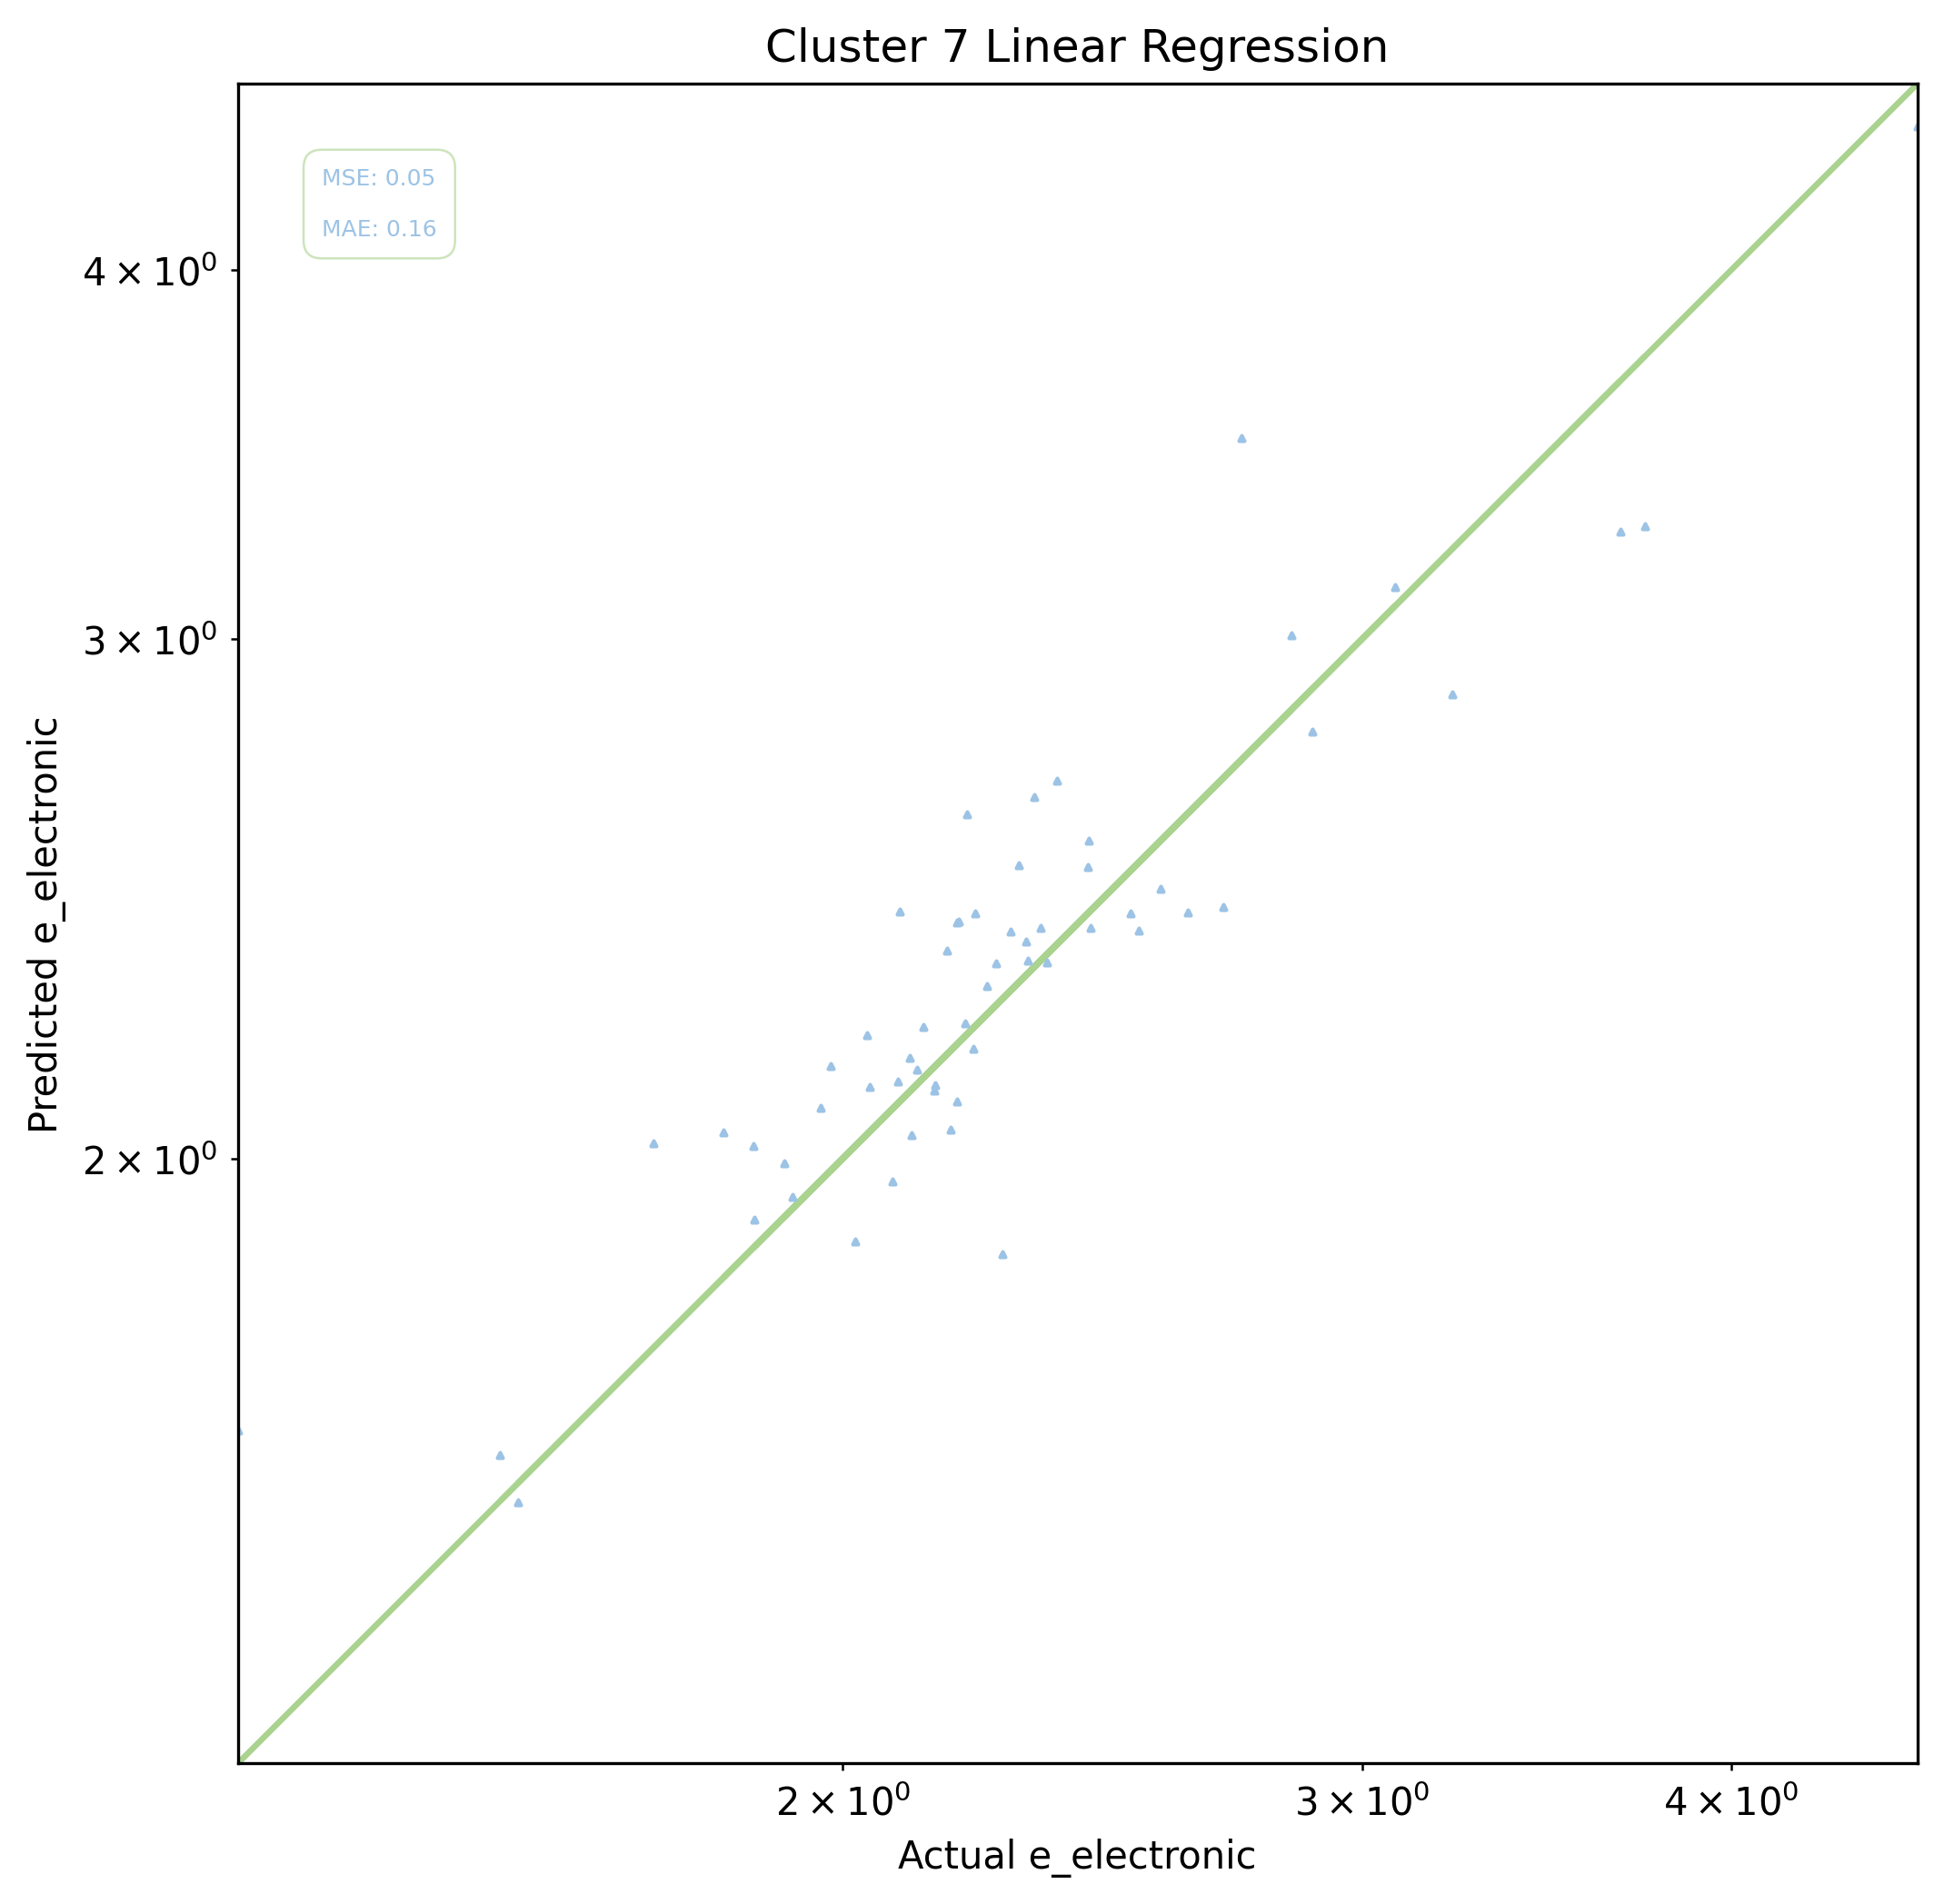

Cluster 8 Linear Regression   Train set size: 462
MSE: 0.13686535390334226, MAE: 0.301791726221931


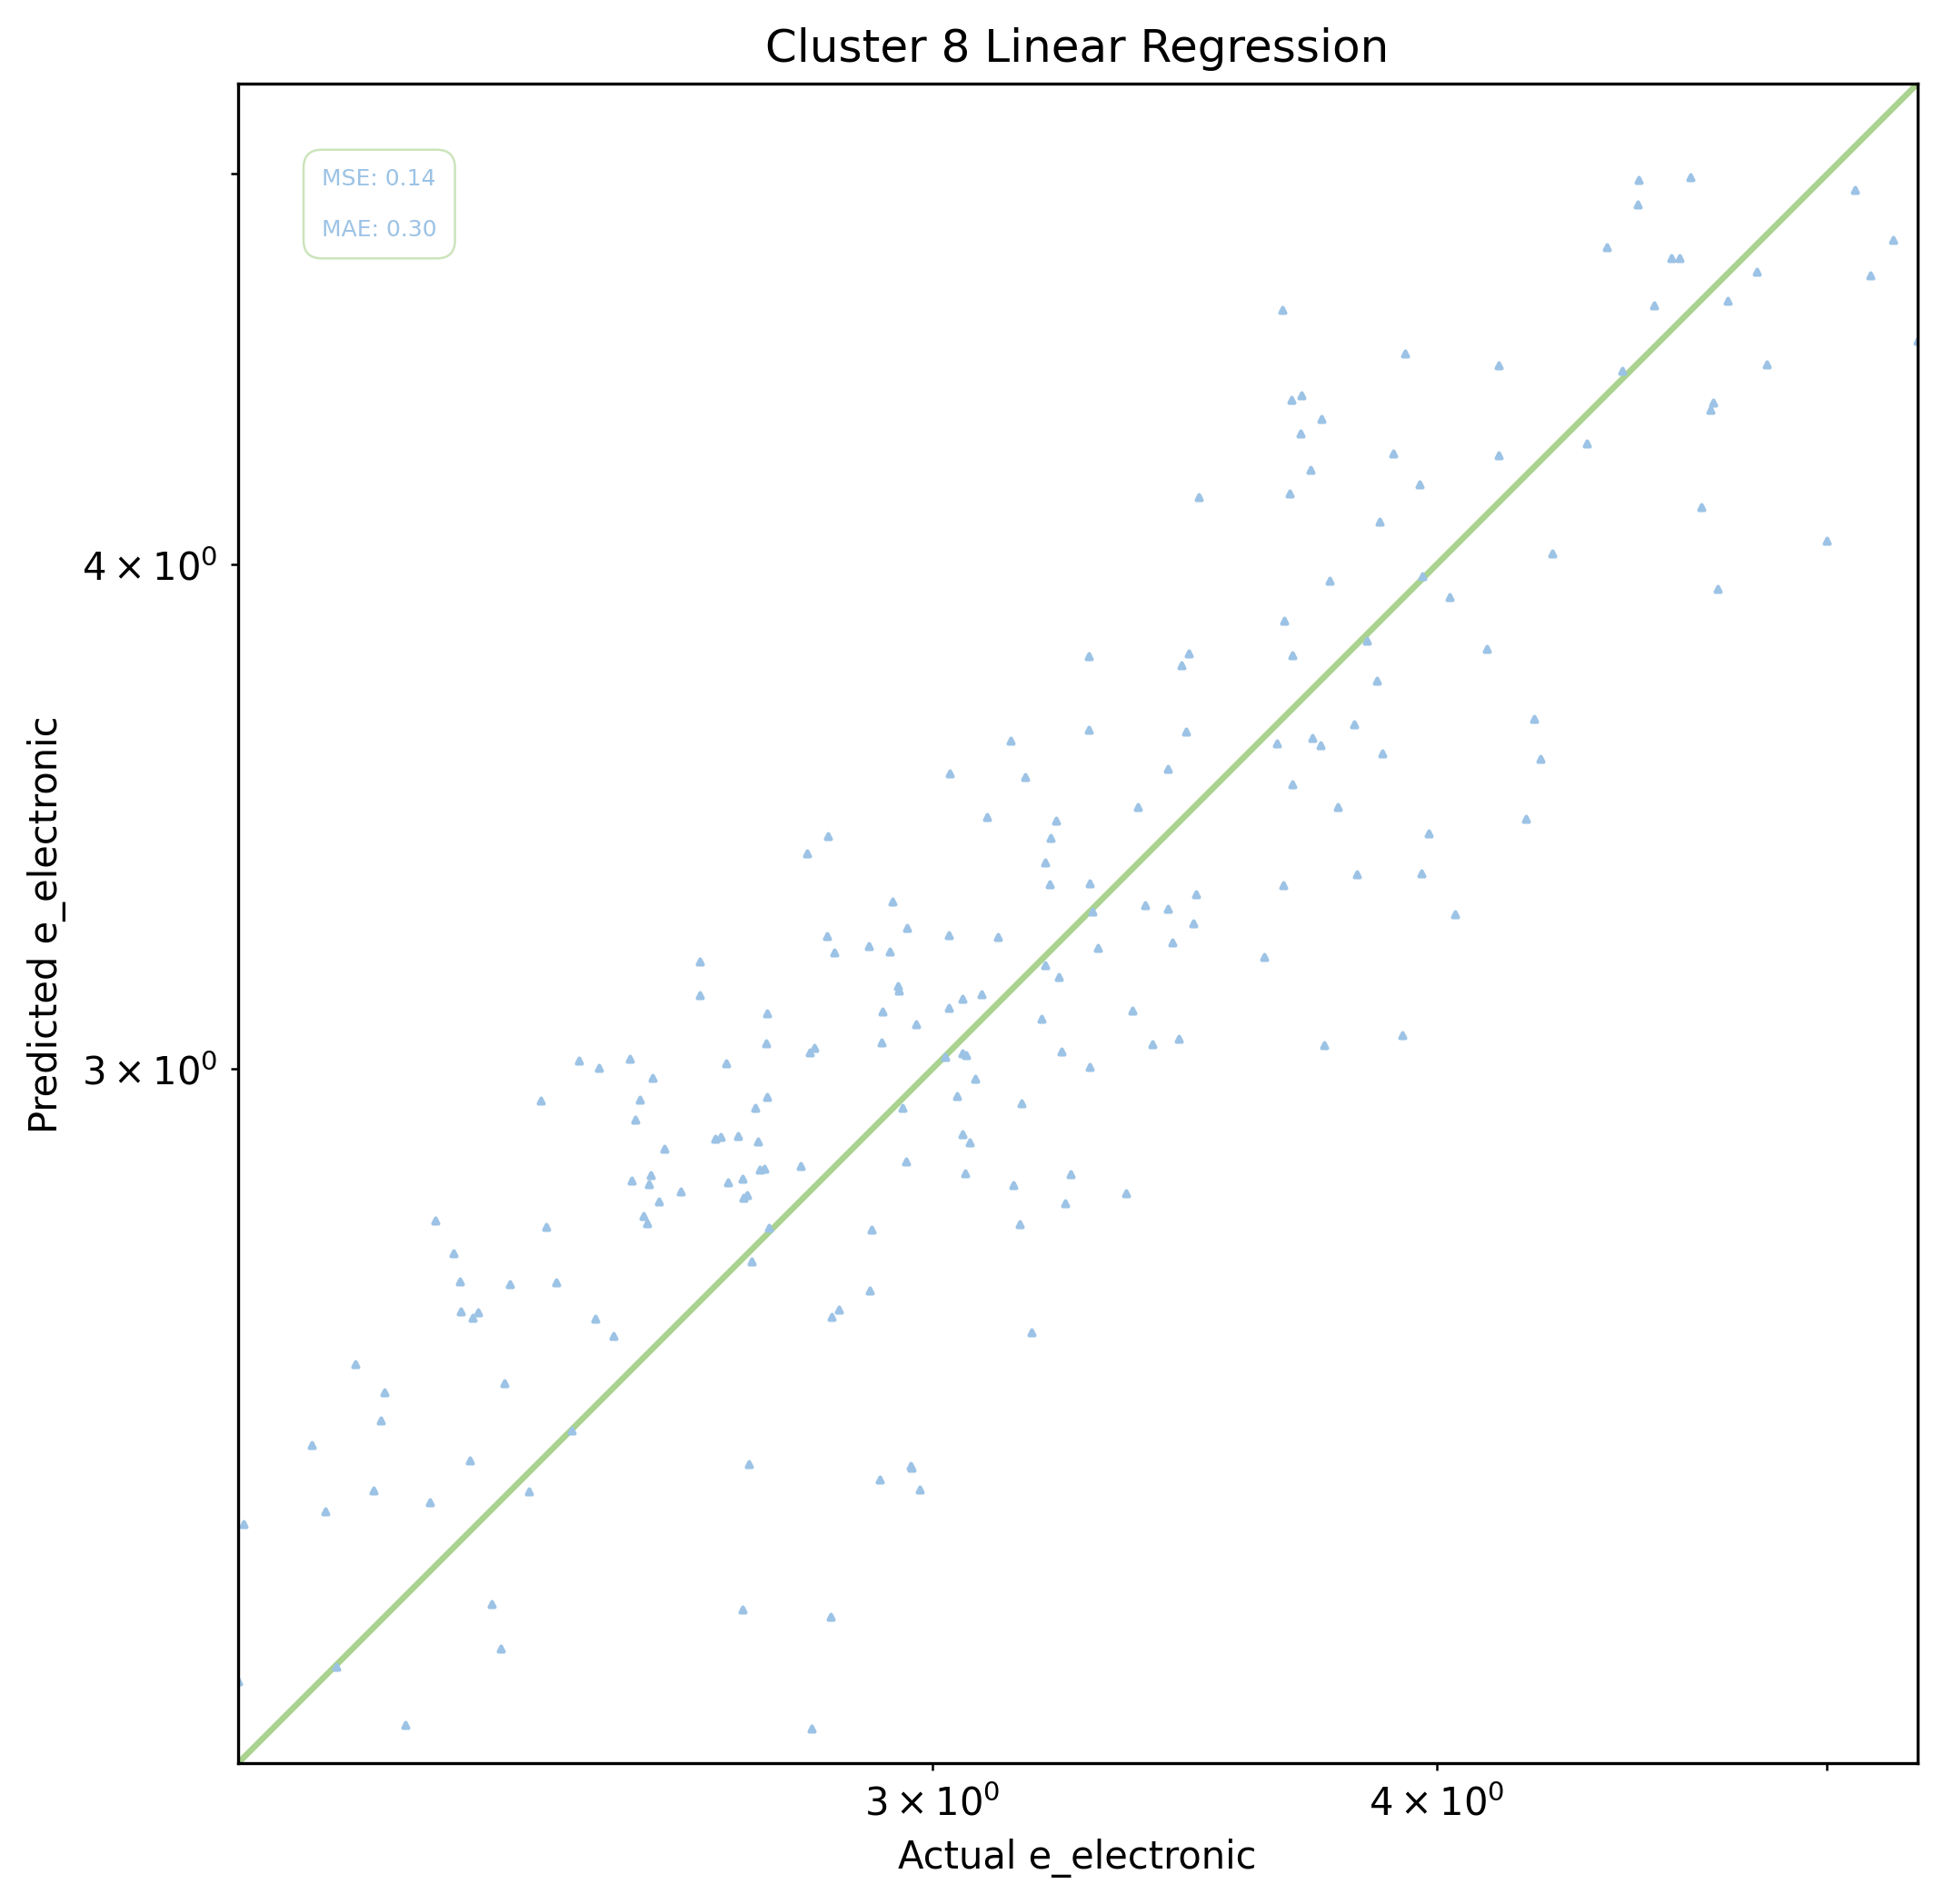

Cluster 9 Linear Regression   Train set size: 497
MSE: 30.392684932505162, MAE: 2.2575998288787944


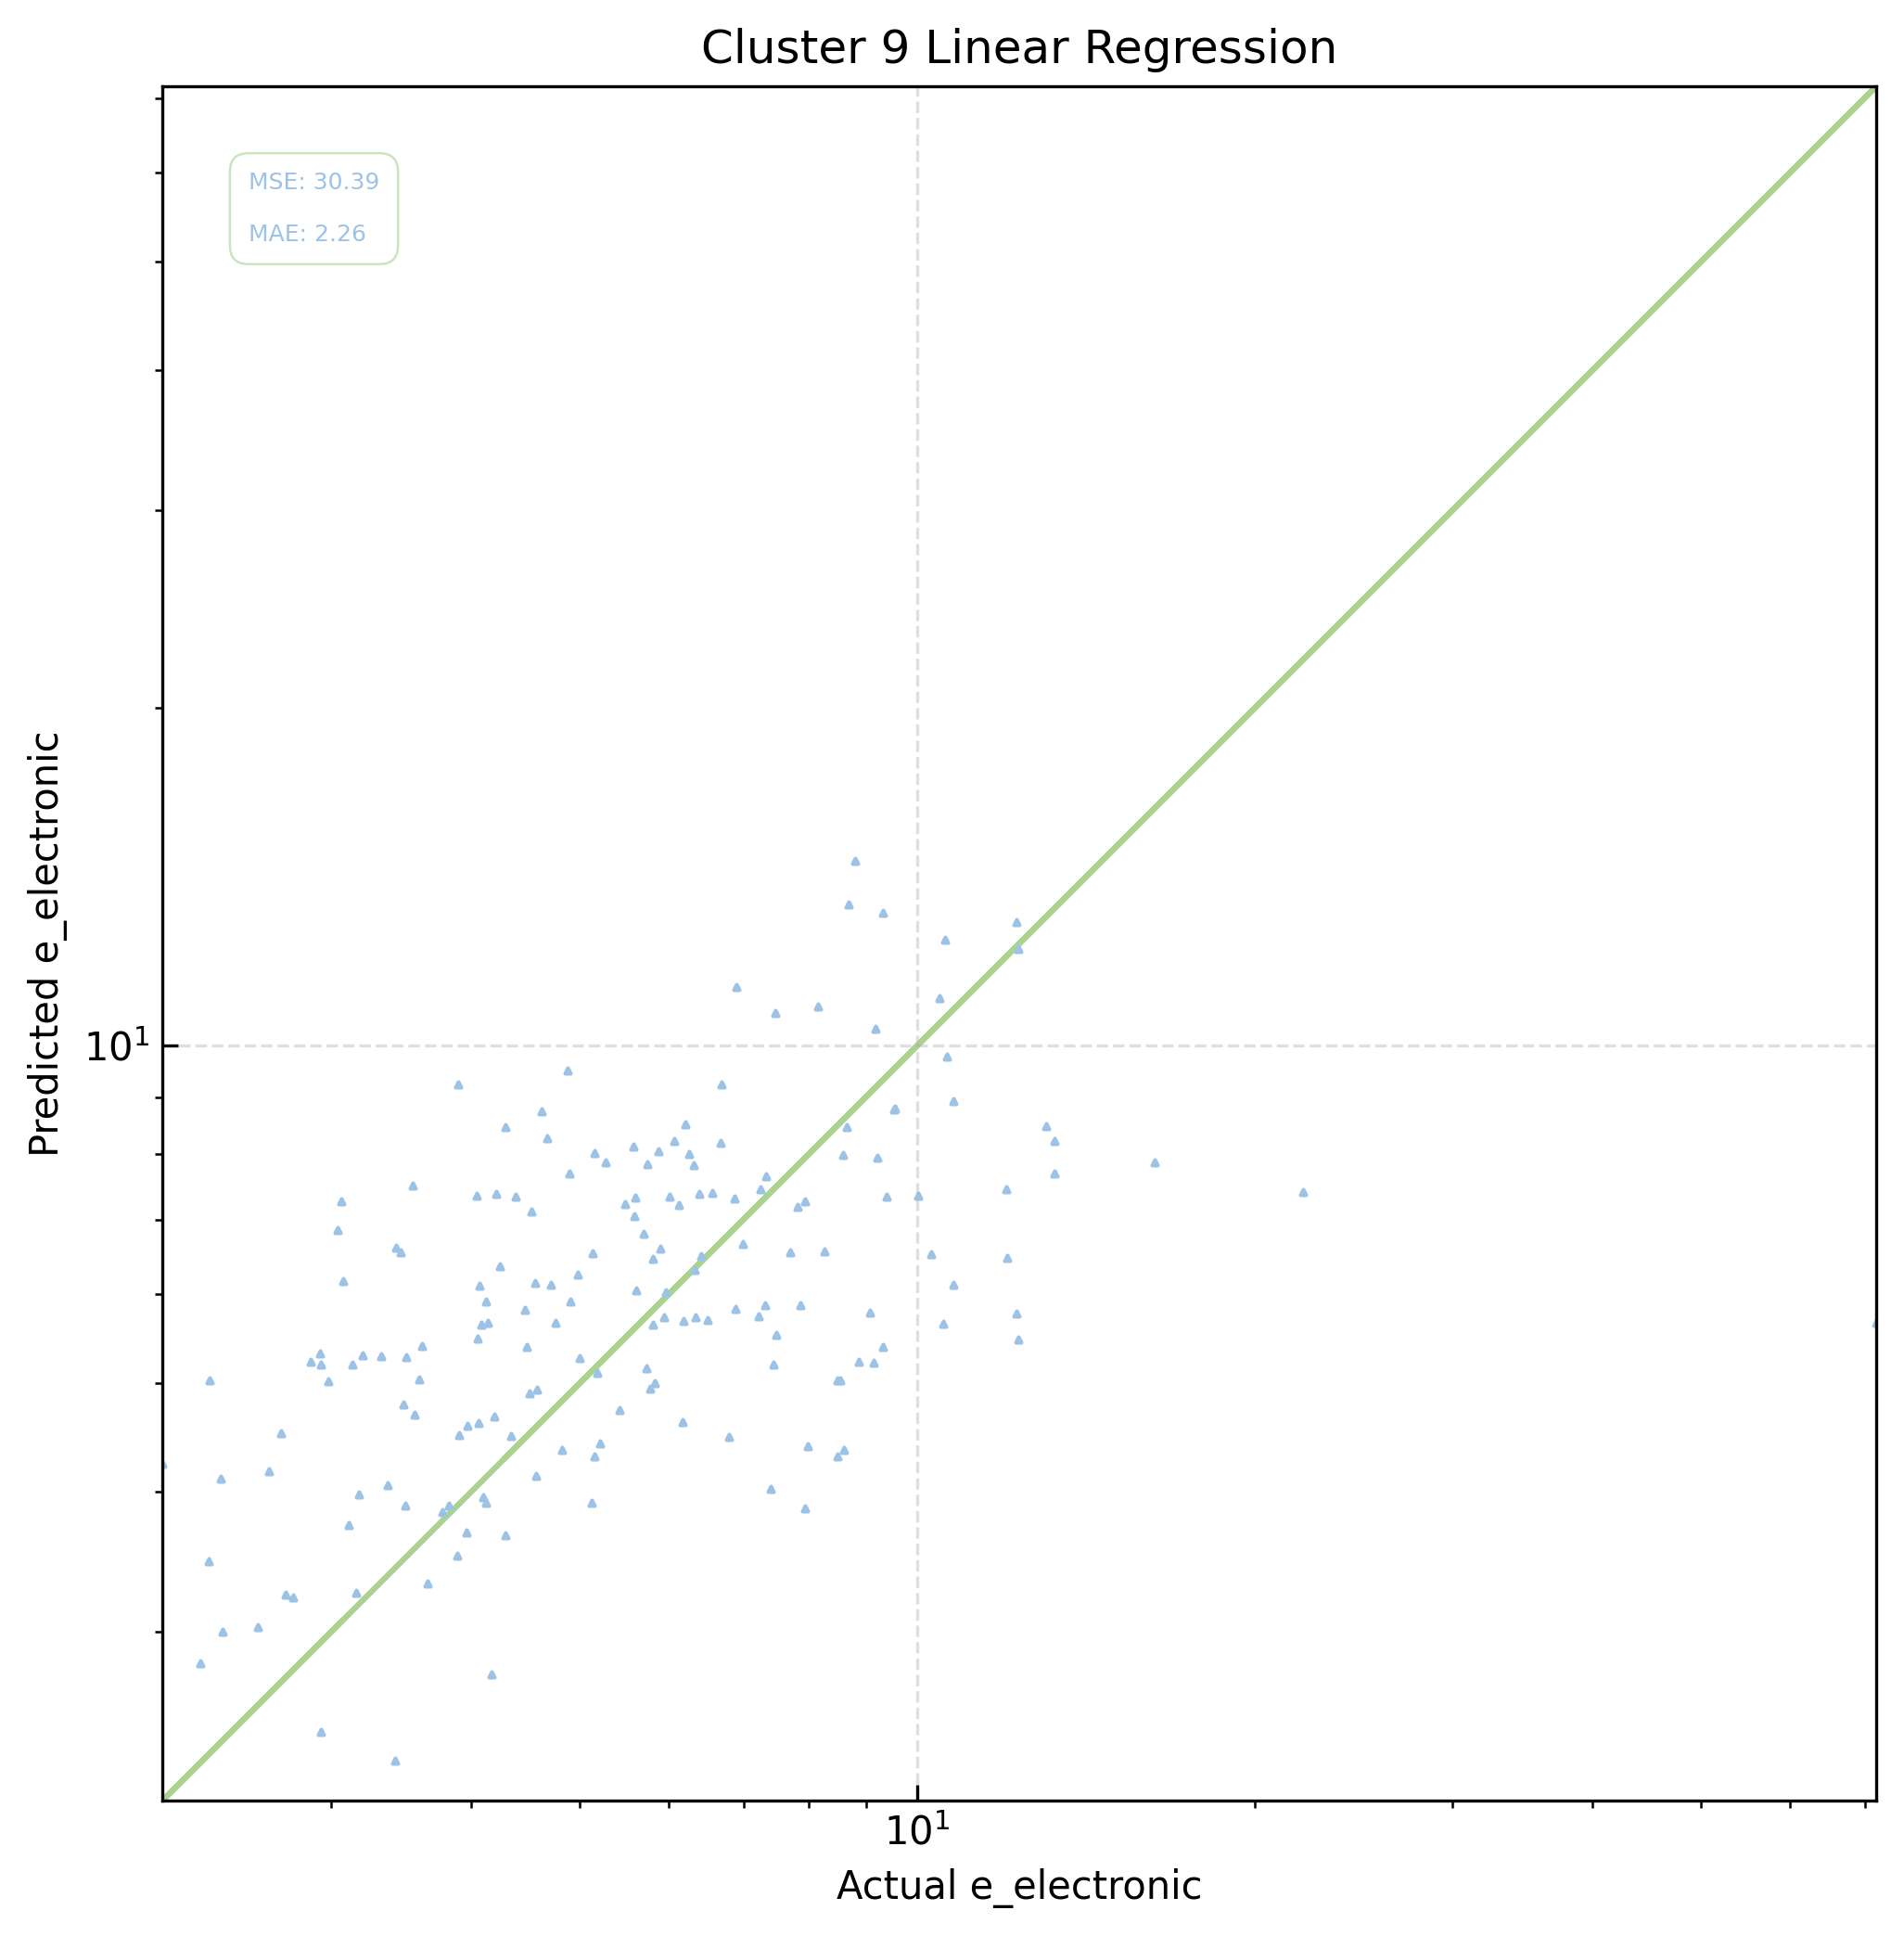

Cluster 10 Linear Regression   Train set size: 766
MSE: 4.377778038204051, MAE: 1.3572604021388548


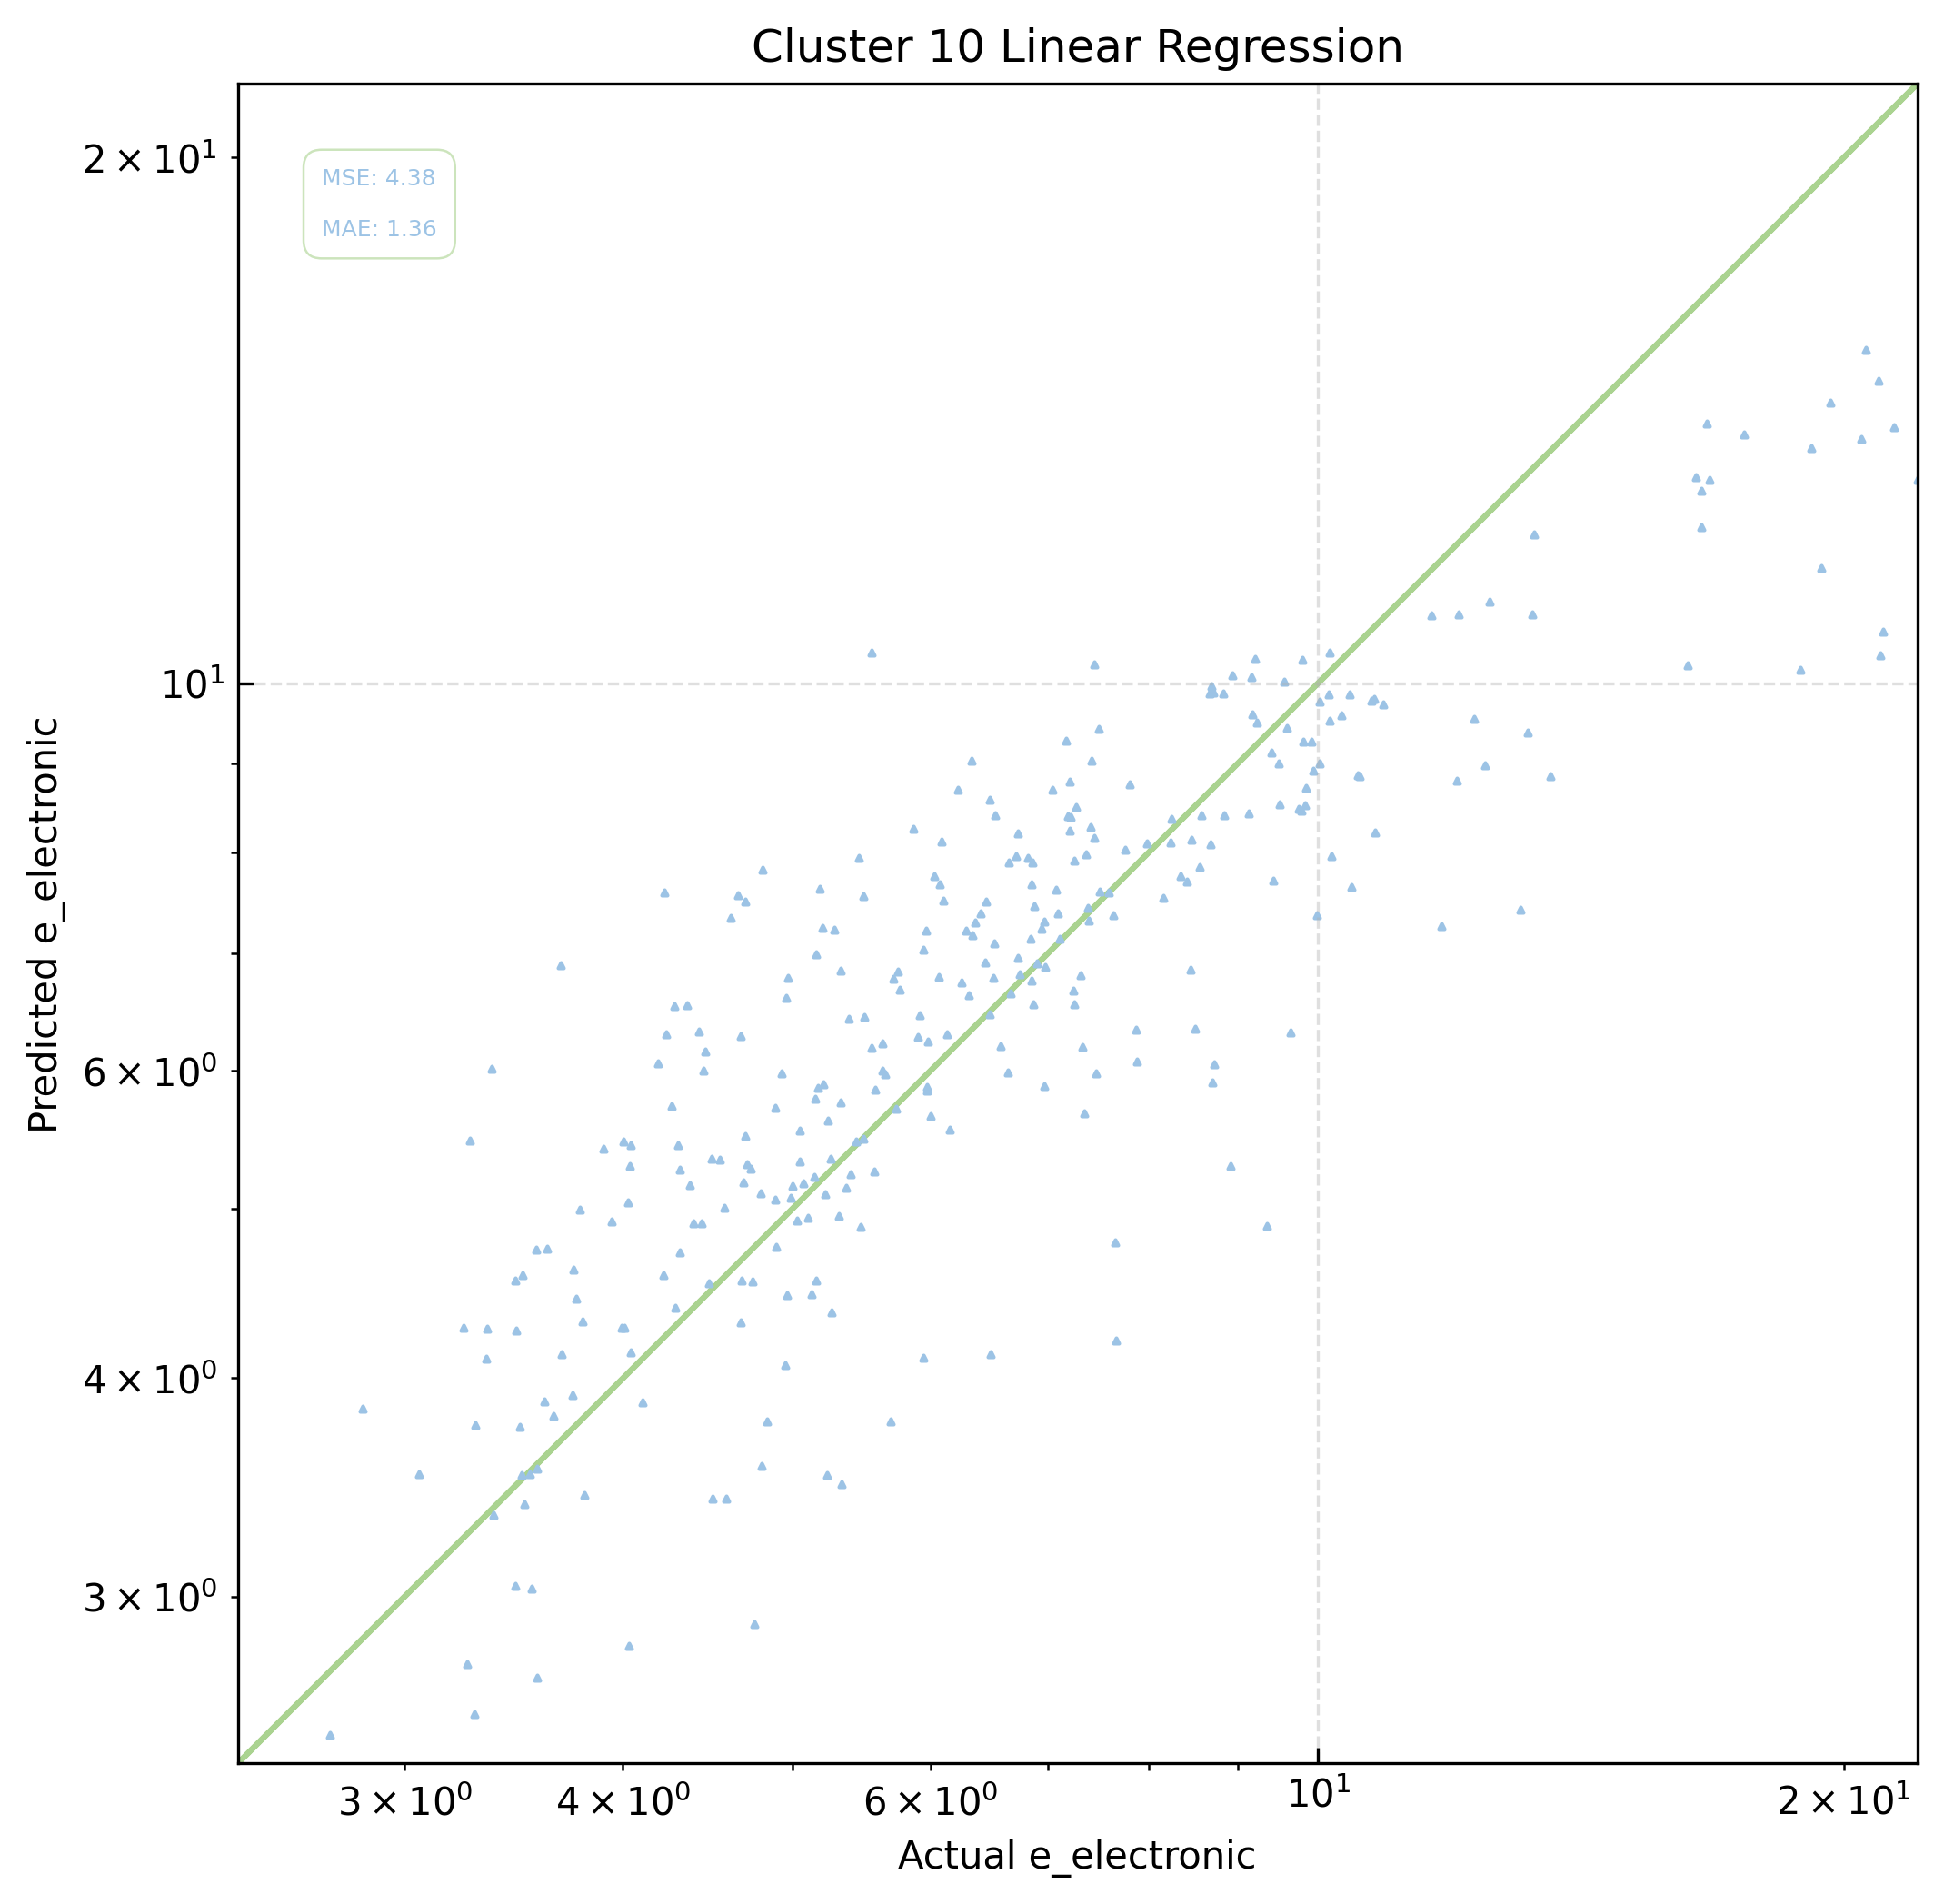

In [321]:
lr_models = []
y_test_all = []
y_pred_all = []

for cluster in range(CLUSTER_NUMS):
    # only train the X_train size great than MIN_TRAIN_SIZE
    if train_clusters[cluster].shape[0] < MIN_TRAIN_SIZE:
        continue

    print(f'Cluster {cluster} Linear Regression   Train set size: {train_clusters[cluster].shape[0]}')

    lr, y_test, y_pred = linear_regression(cluster)
    lr_models.append(lr)
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred)

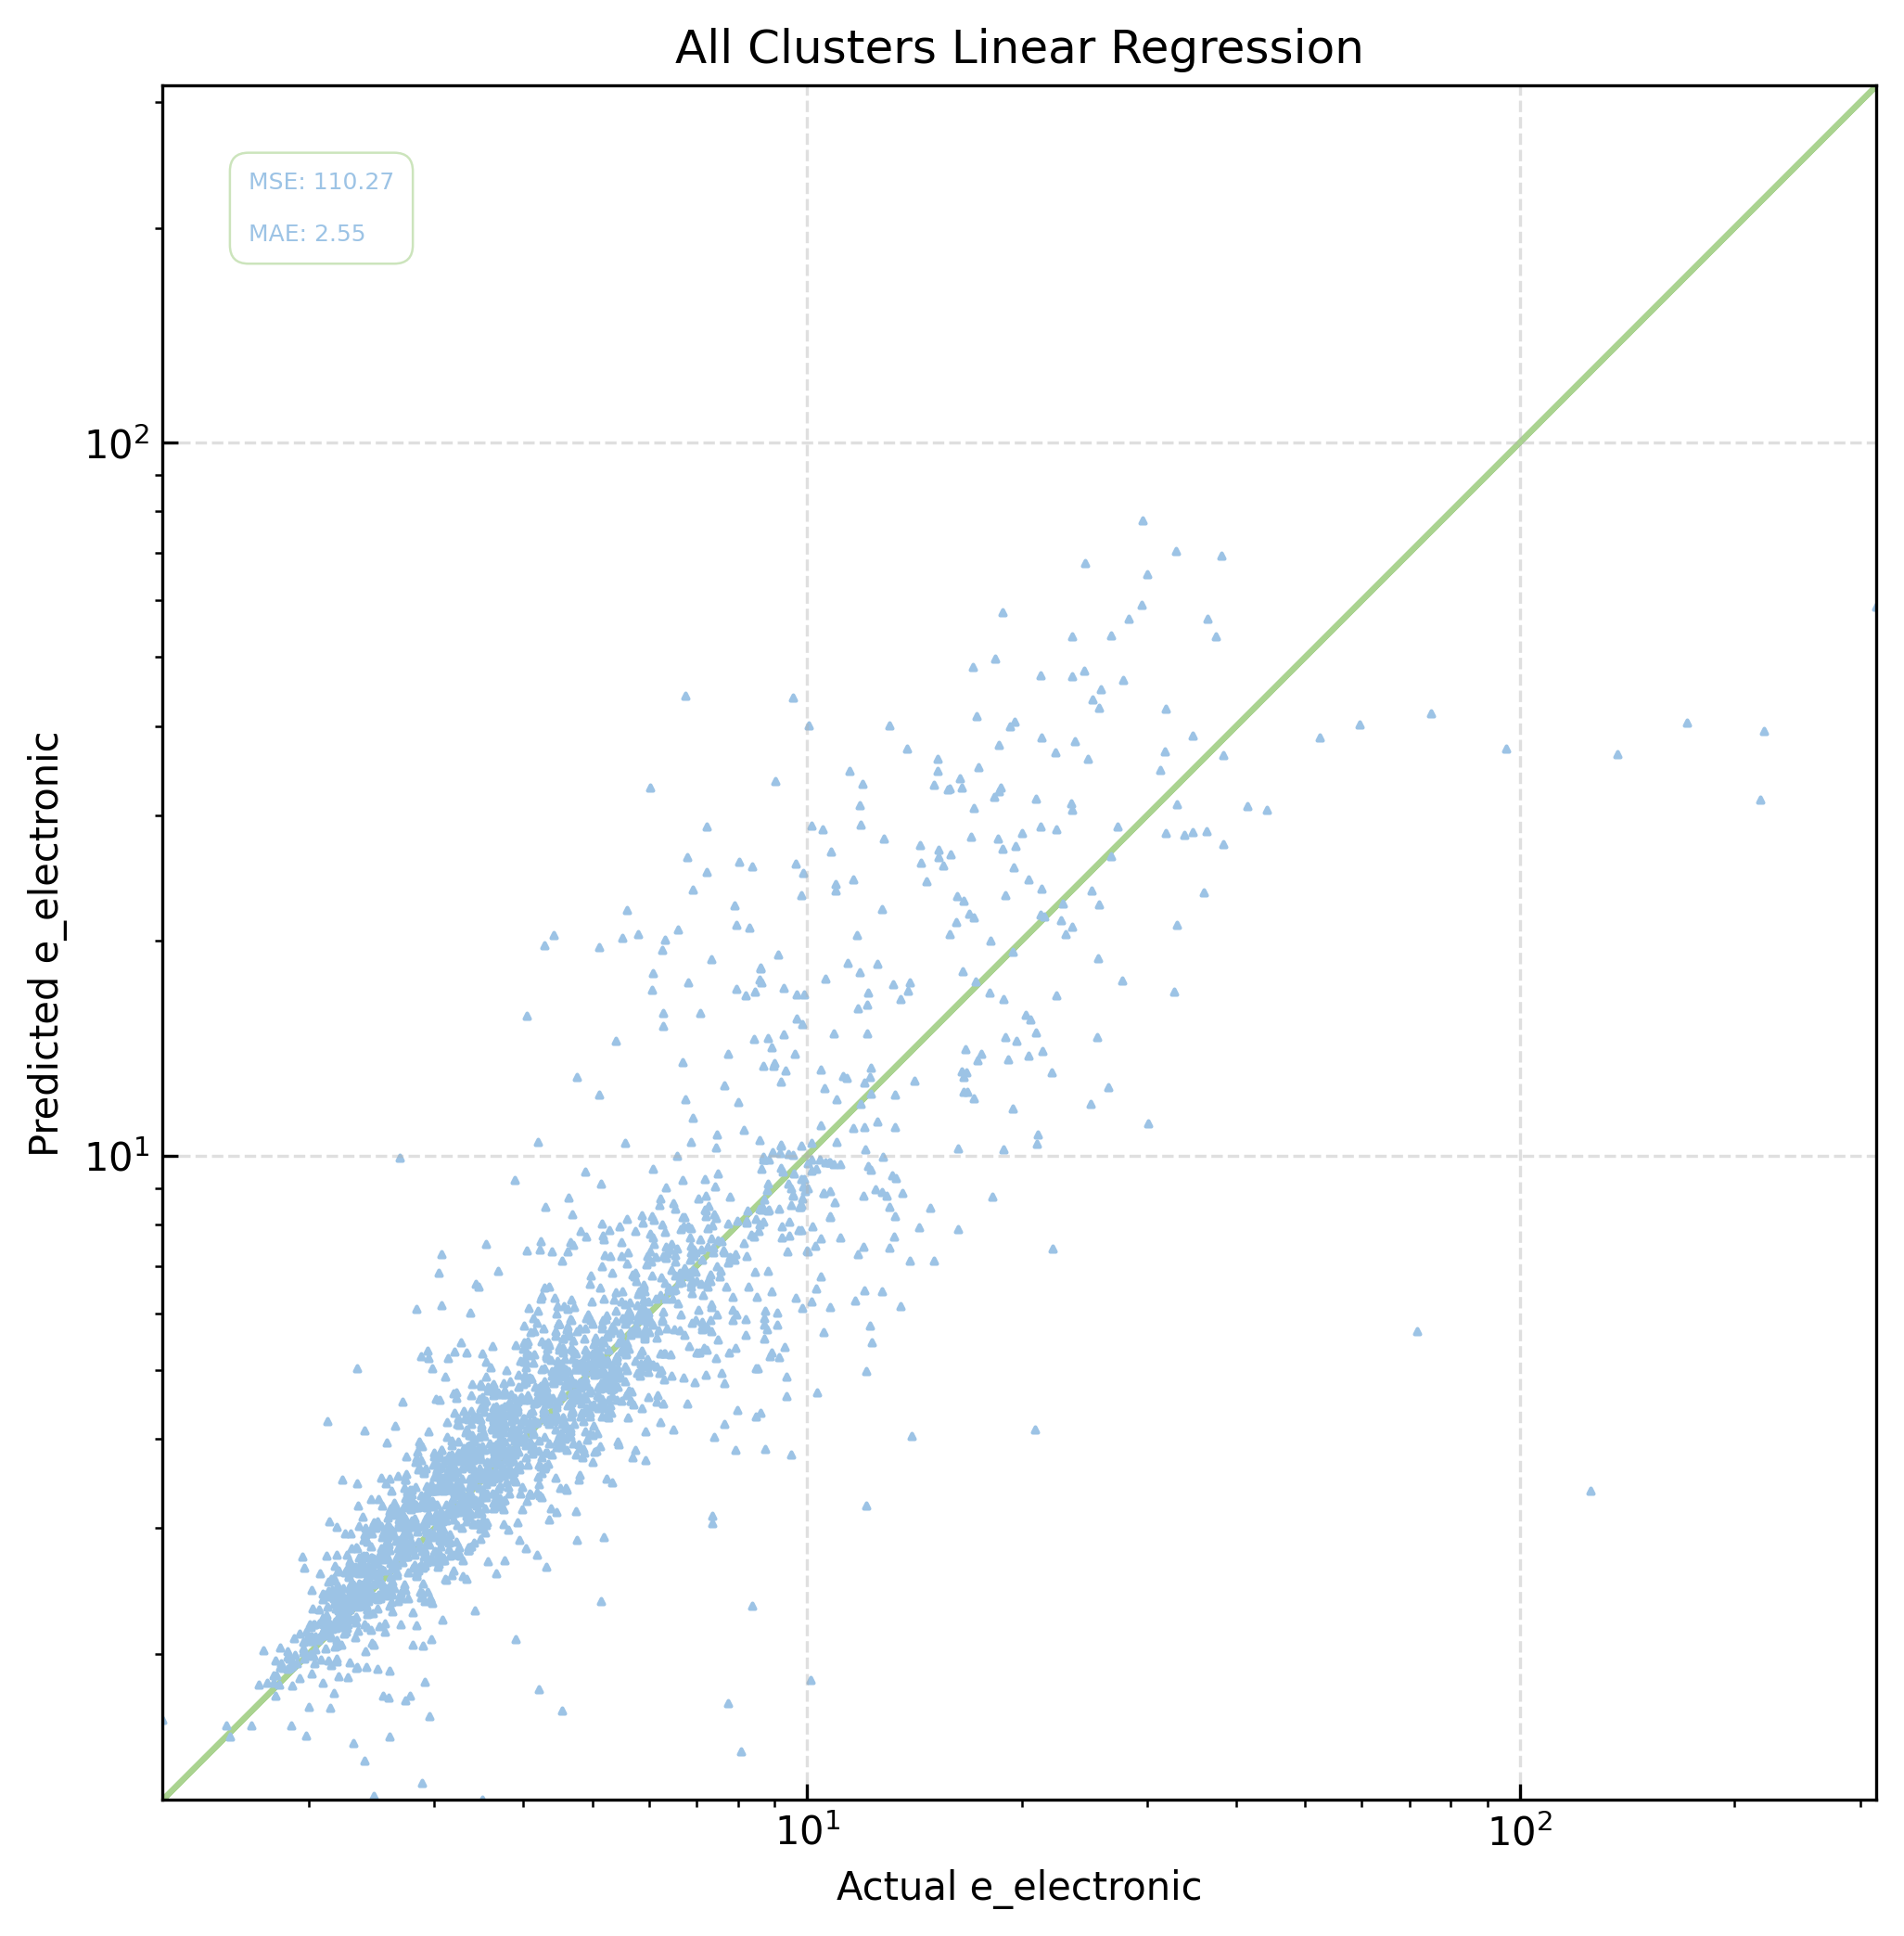

In [322]:
# draw the parity plot of all clusters
mse, mae = mean_squared_error(y_test_all, y_pred_all), mean_absolute_error(y_test_all, y_pred_all)
parity_plot(mse, mae, y_test_all, y_pred_all, y_name=TARGET, title='All Clusters Linear Regression', fig_path=FIG_PATH)


#### Decision Tree Model


In [338]:
from sklearn.tree import DecisionTreeRegressor, plot_tree       # ML model

best_depths = []

def decision_tree(cluster):
    X_train, y_train, X_test, y_test = get_train_test_set(cluster)
    # do cross validation to get the best depth
    max_scores=-1e5
    best_depth = 0
    for depth in range(10, 18):
        dt = DecisionTreeRegressor(max_depth=depth,random_state=RANDOM_STATE)      # decision tree constructor
        scores, _ = model_cross_train(dt, X_train, y_train)                              
        if scores.mean() > max_scores:
            max_scores = scores.mean()
            best_depth = depth
    print(f'Cluster {cluster} Decision Tree   Best Depth: {best_depth}')
    best_depths.append(best_depth)
    
    dt = DecisionTreeRegressor(max_depth=best_depth, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    # test
    mse, mae, y_pred = model_test(dt, X_test, y_test)
    plot_scores(mse, mae, y_test, y_pred, title=f'Cluster {cluster} Decision Tree', fig_path=FIG_PATH)
    return dt, y_test, y_pred

Cluster 0 Decision Tree   Best Depth: 17
MSE: 0.4537024064336501, MAE: 0.43035061408419956


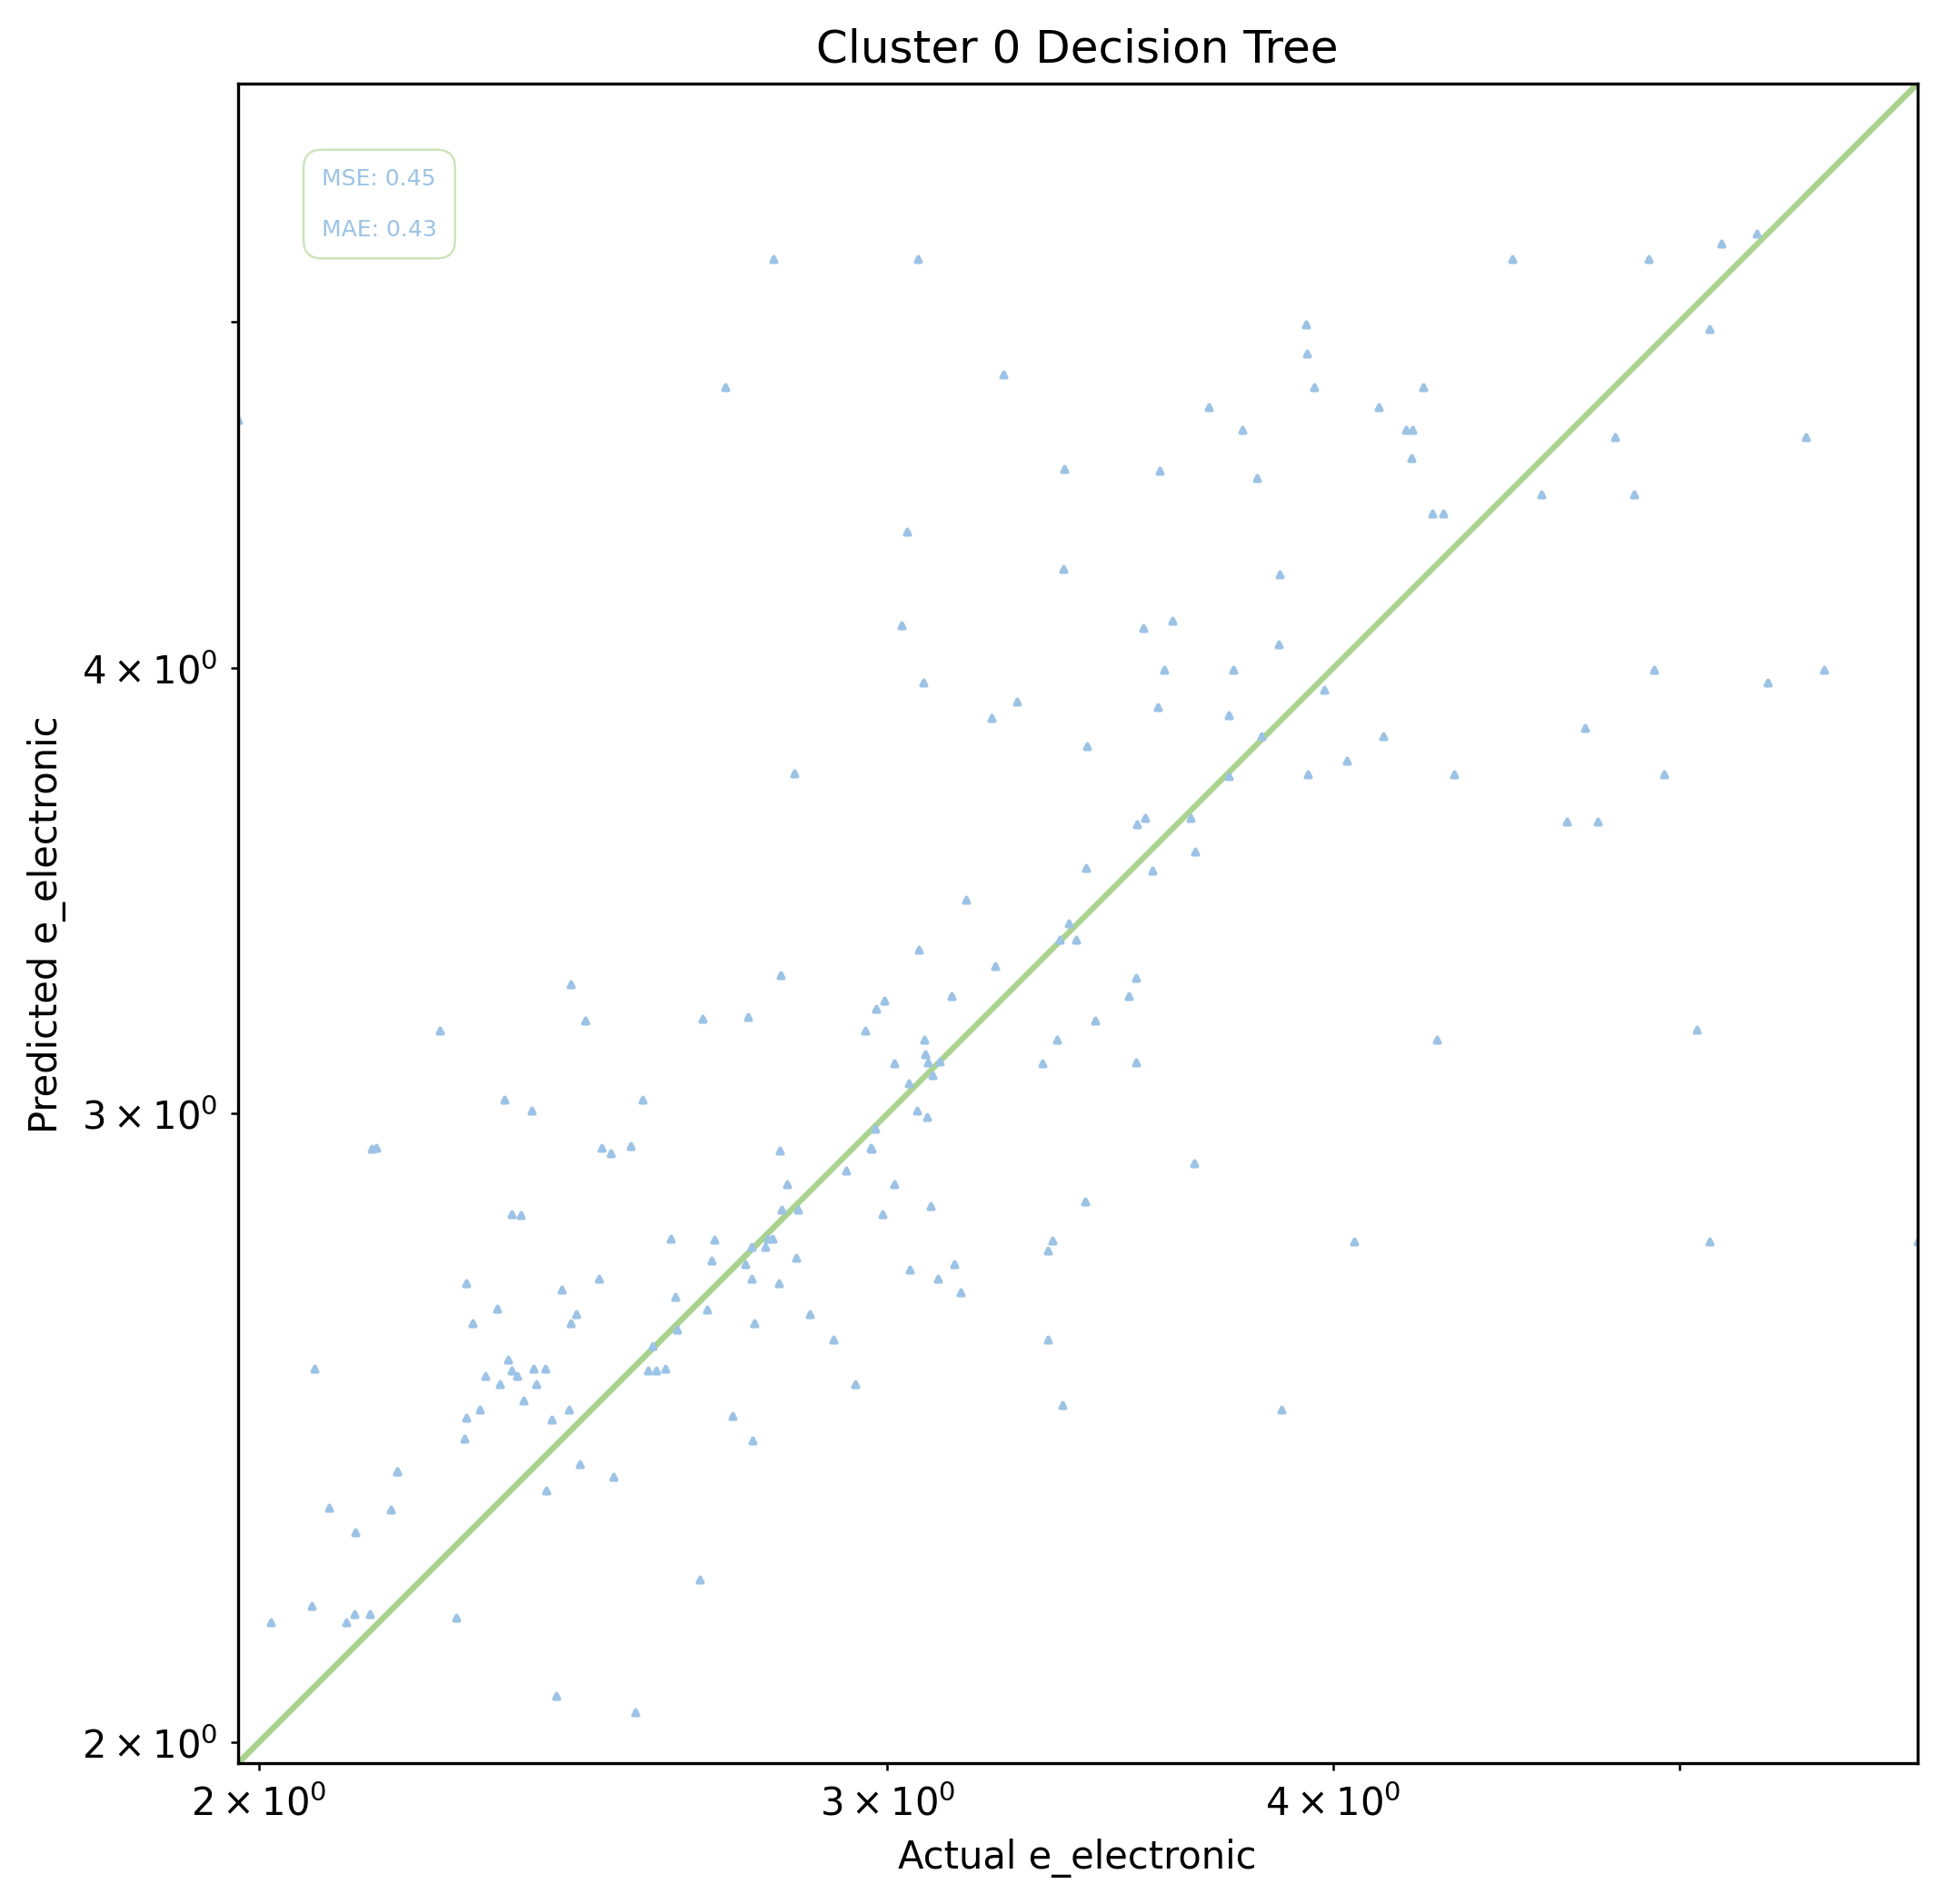

Cluster 1 Decision Tree   Best Depth: 17
MSE: 0.07733649397125067, MAE: 0.18827310886644466


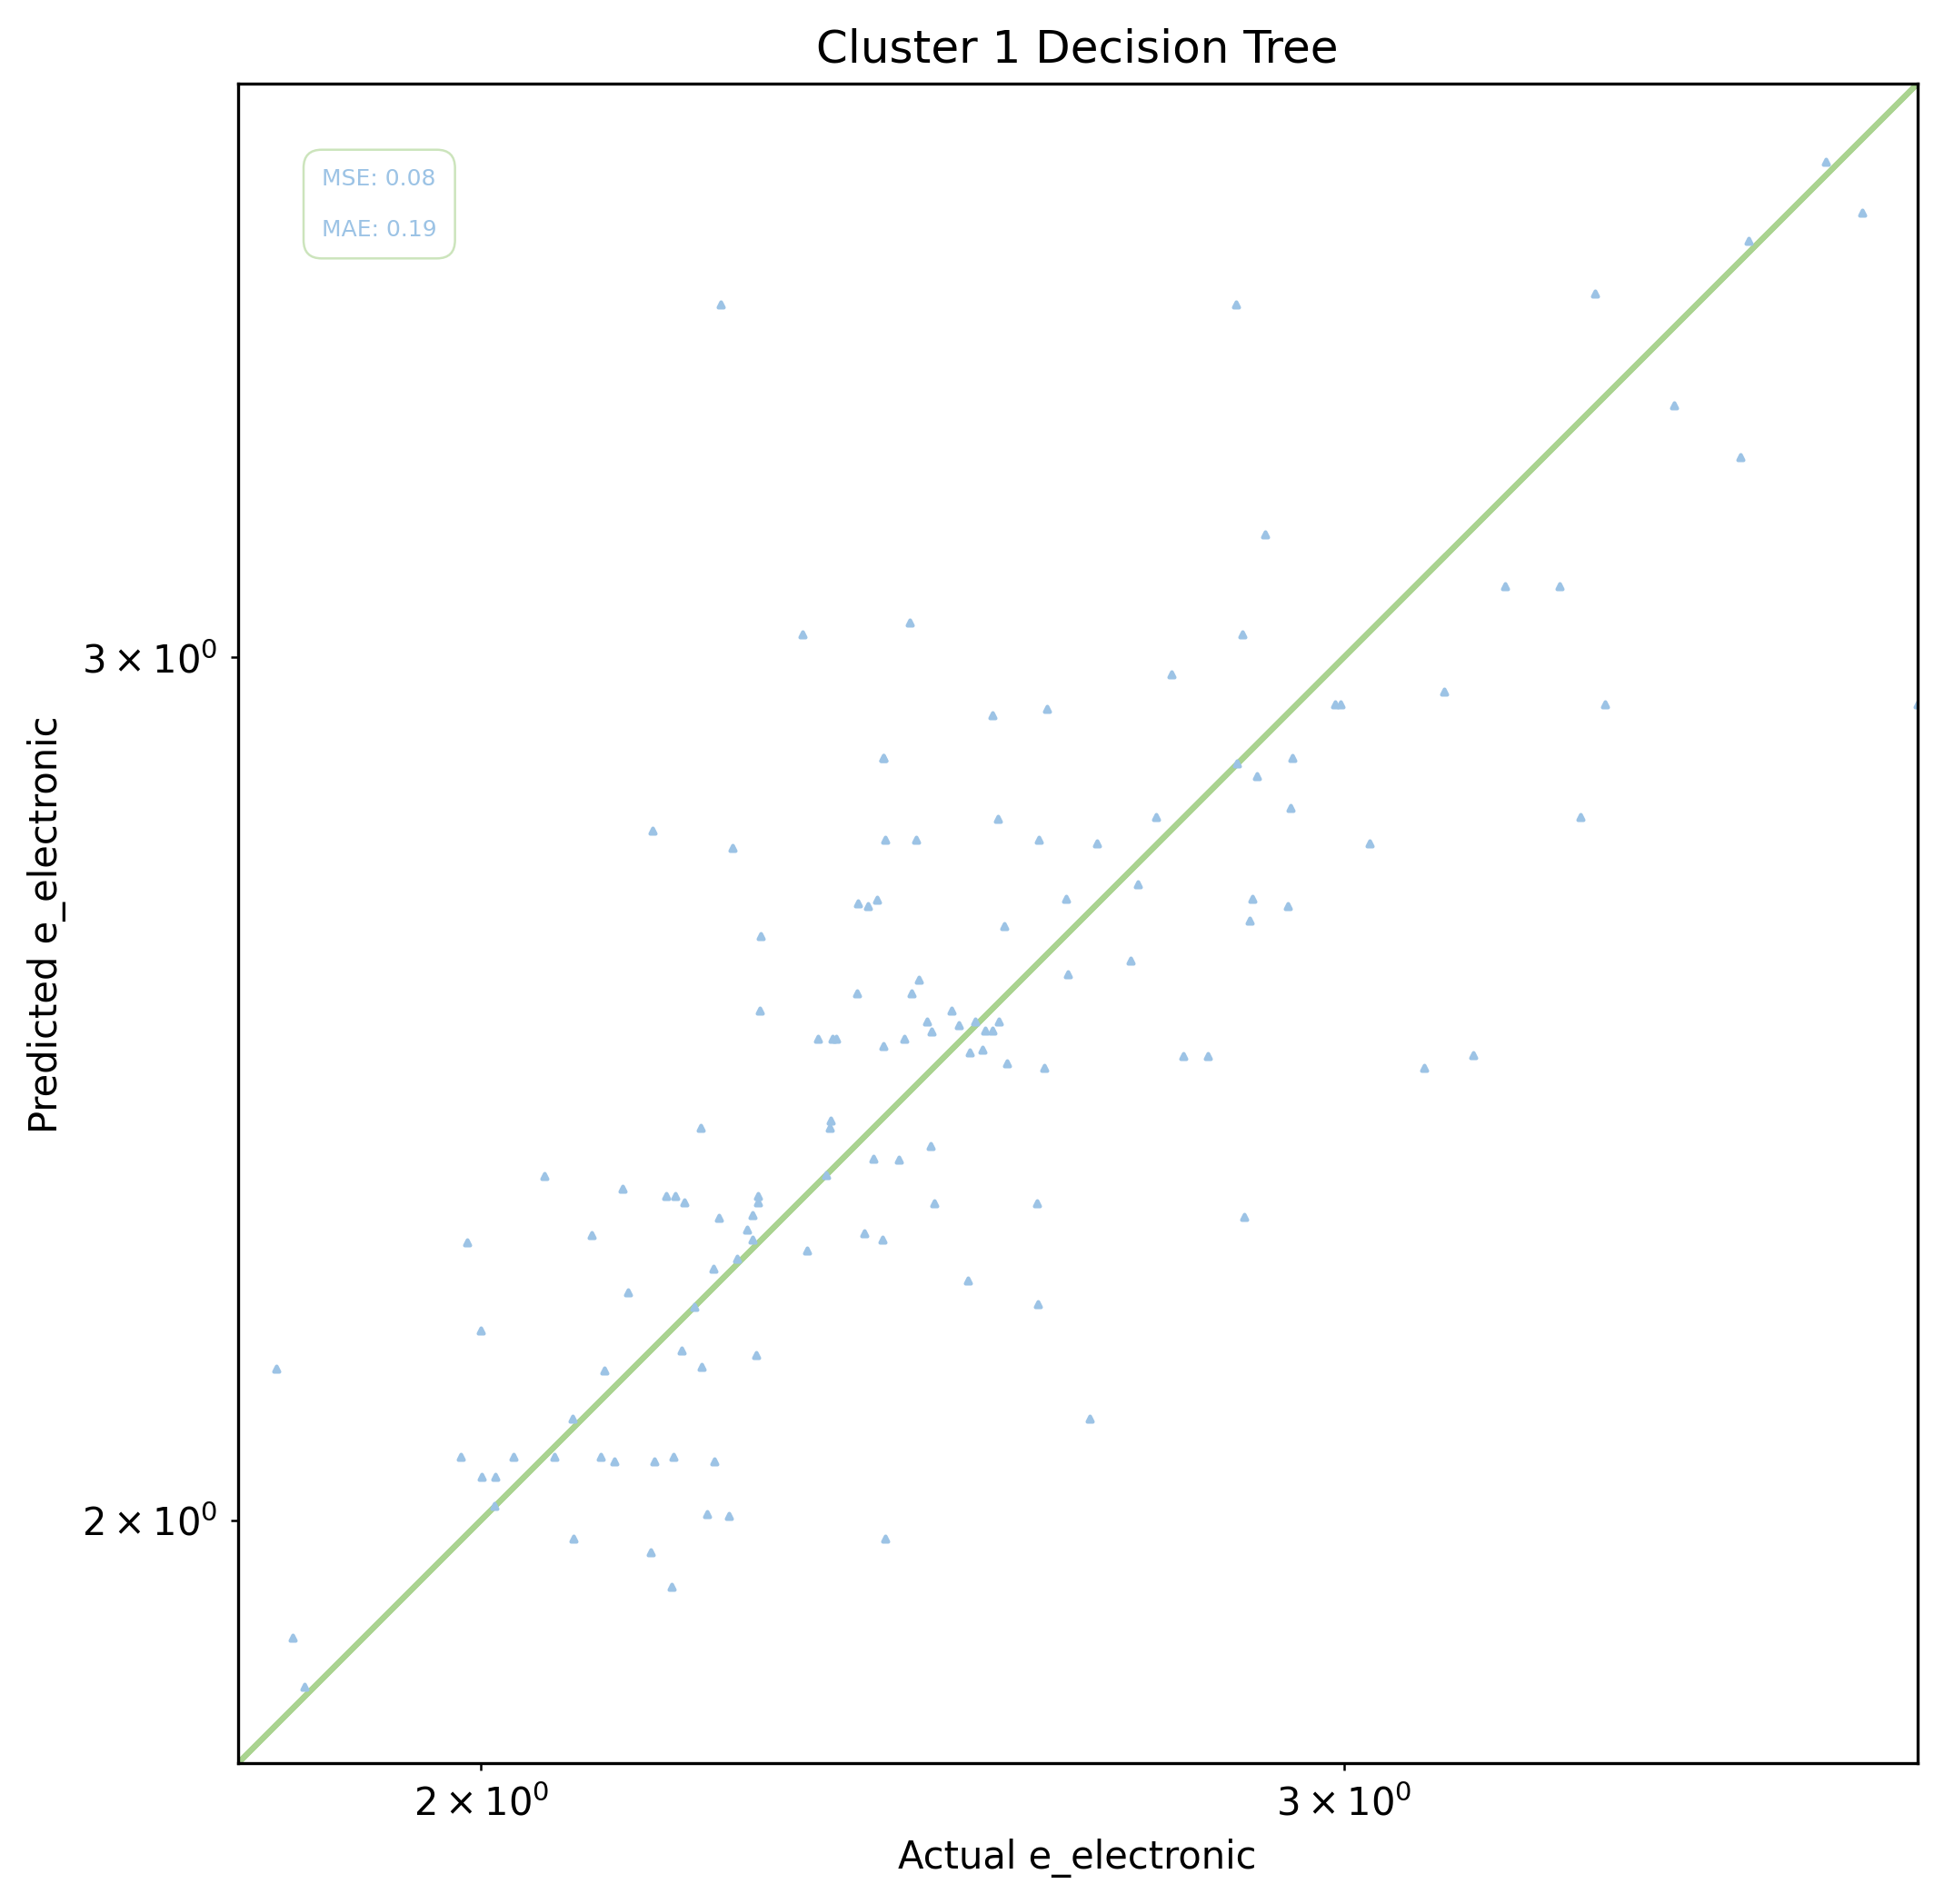

Cluster 2 Decision Tree   Best Depth: 16
MSE: 0.9122500946664005, MAE: 0.6594059384329385


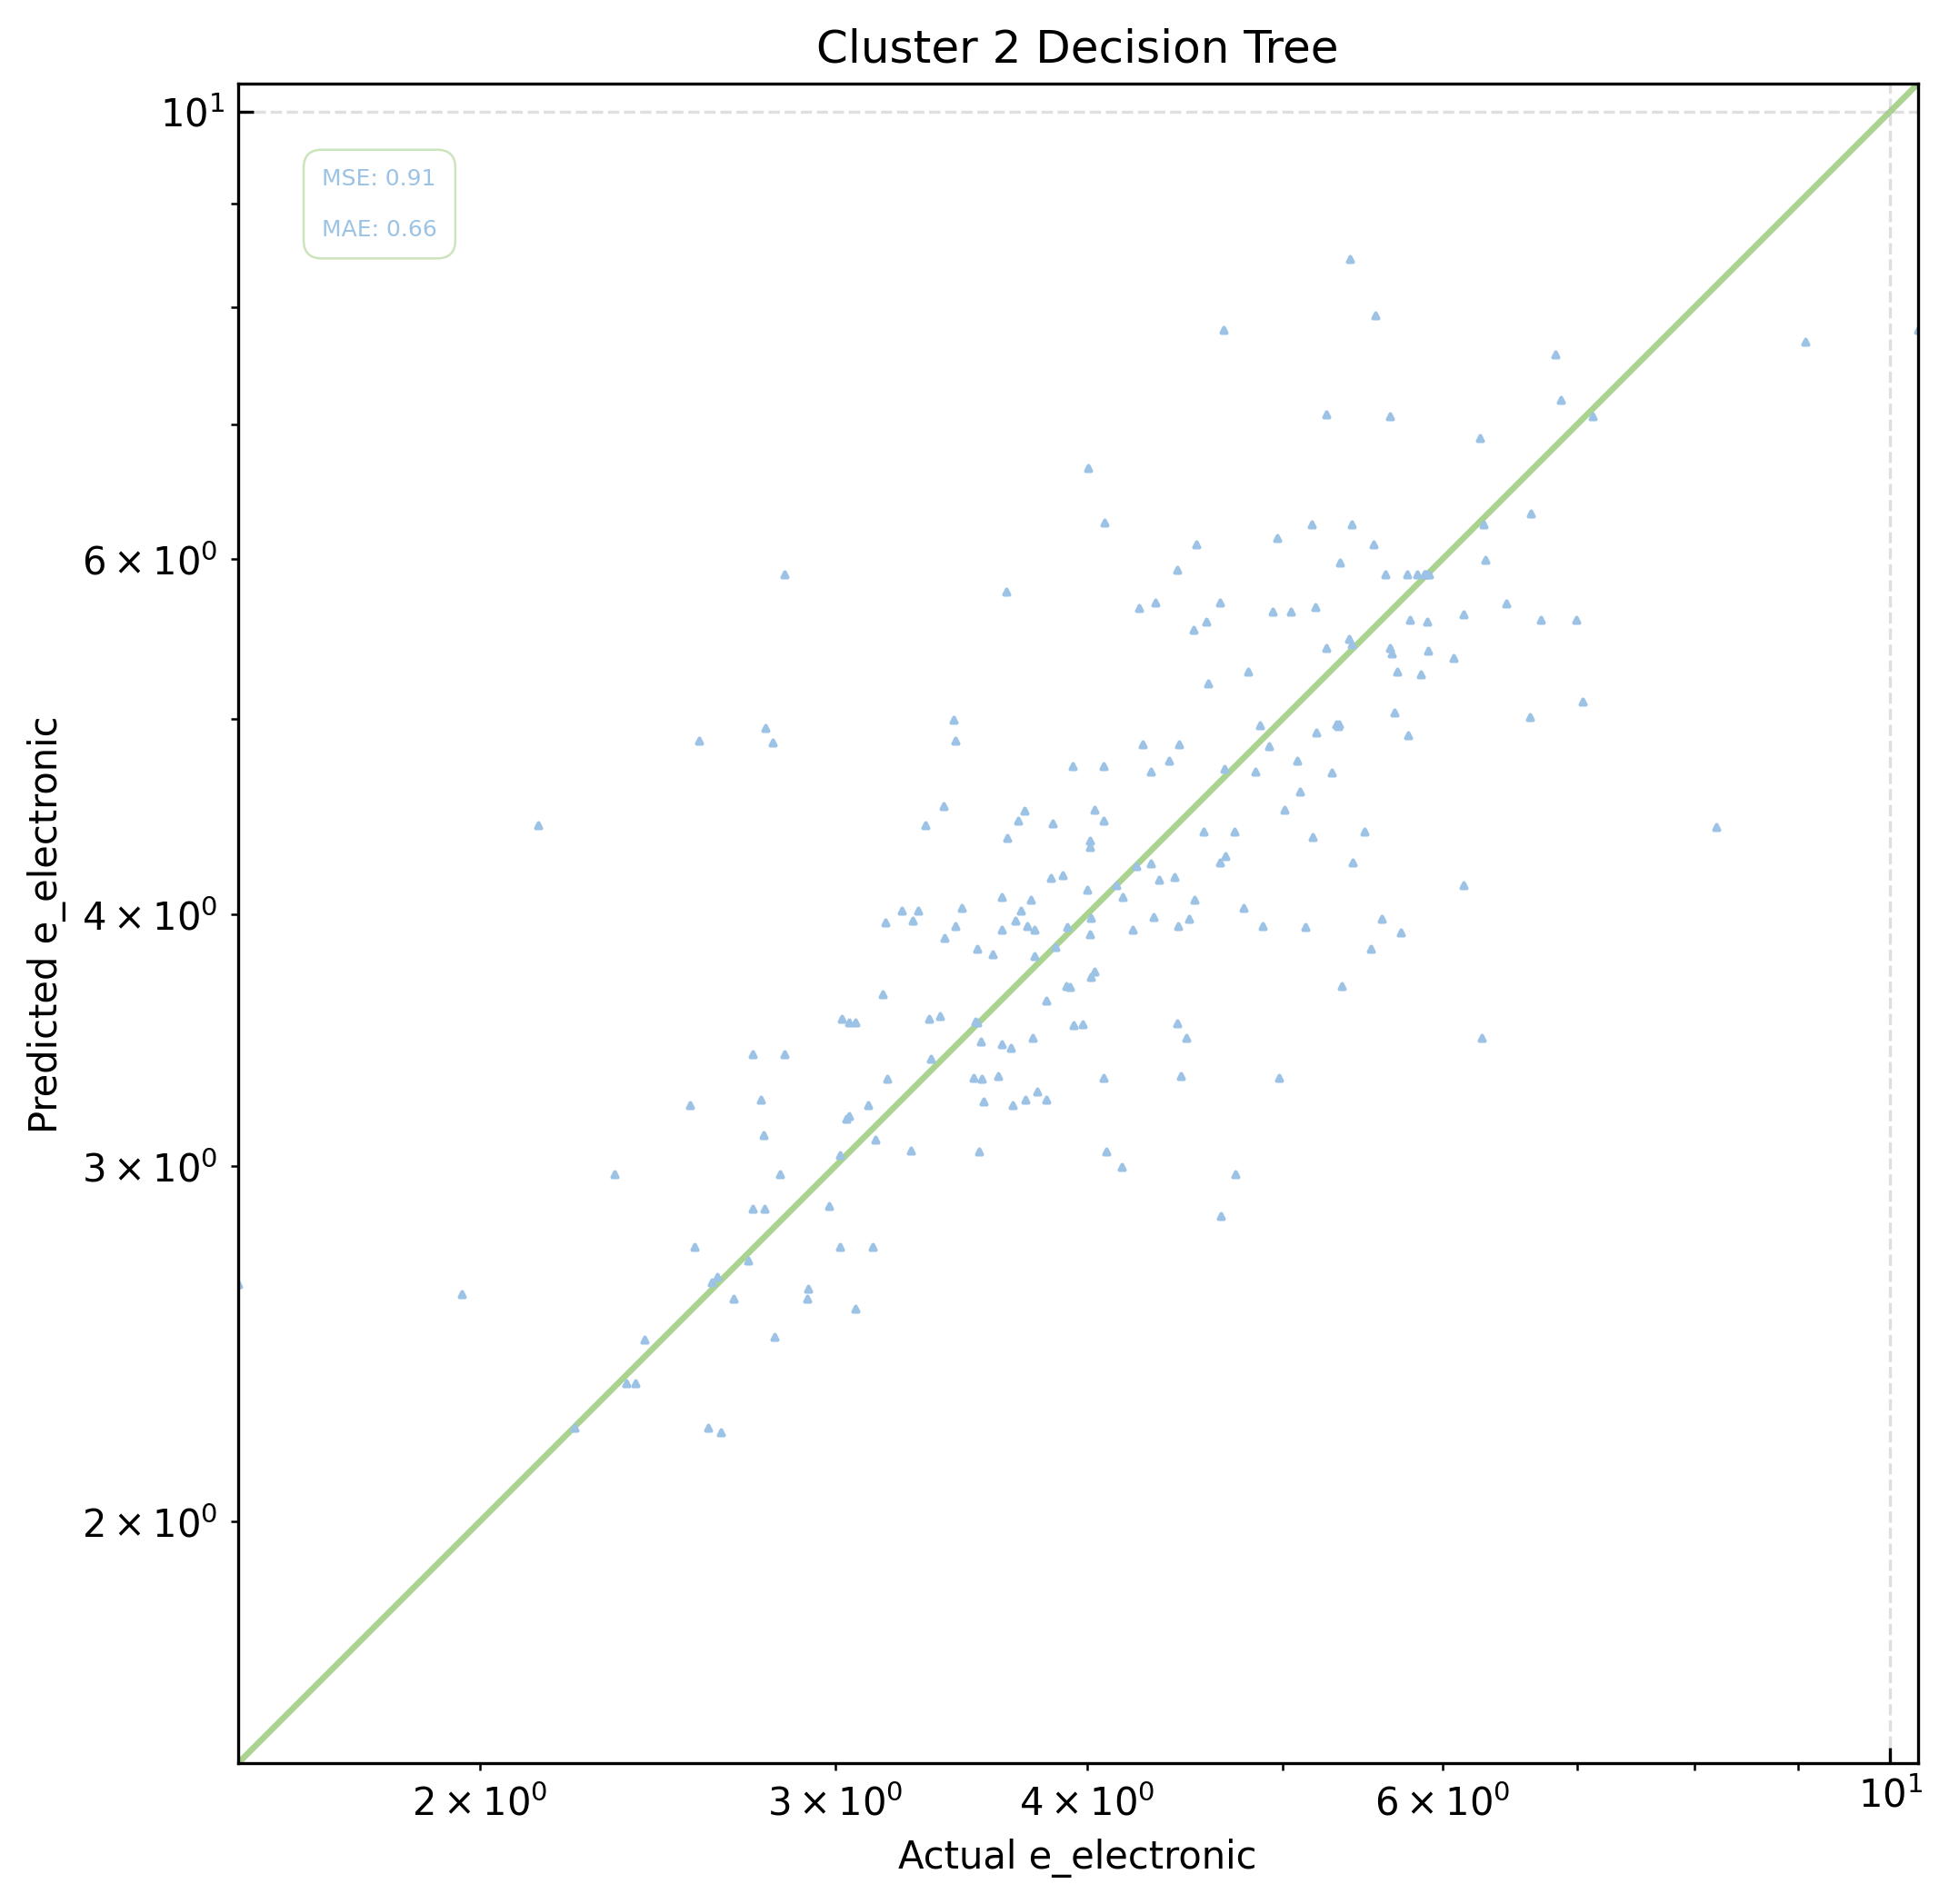

Cluster 3 Decision Tree   Best Depth: 14
MSE: 70.80715890511415, MAE: 1.0276338475805225


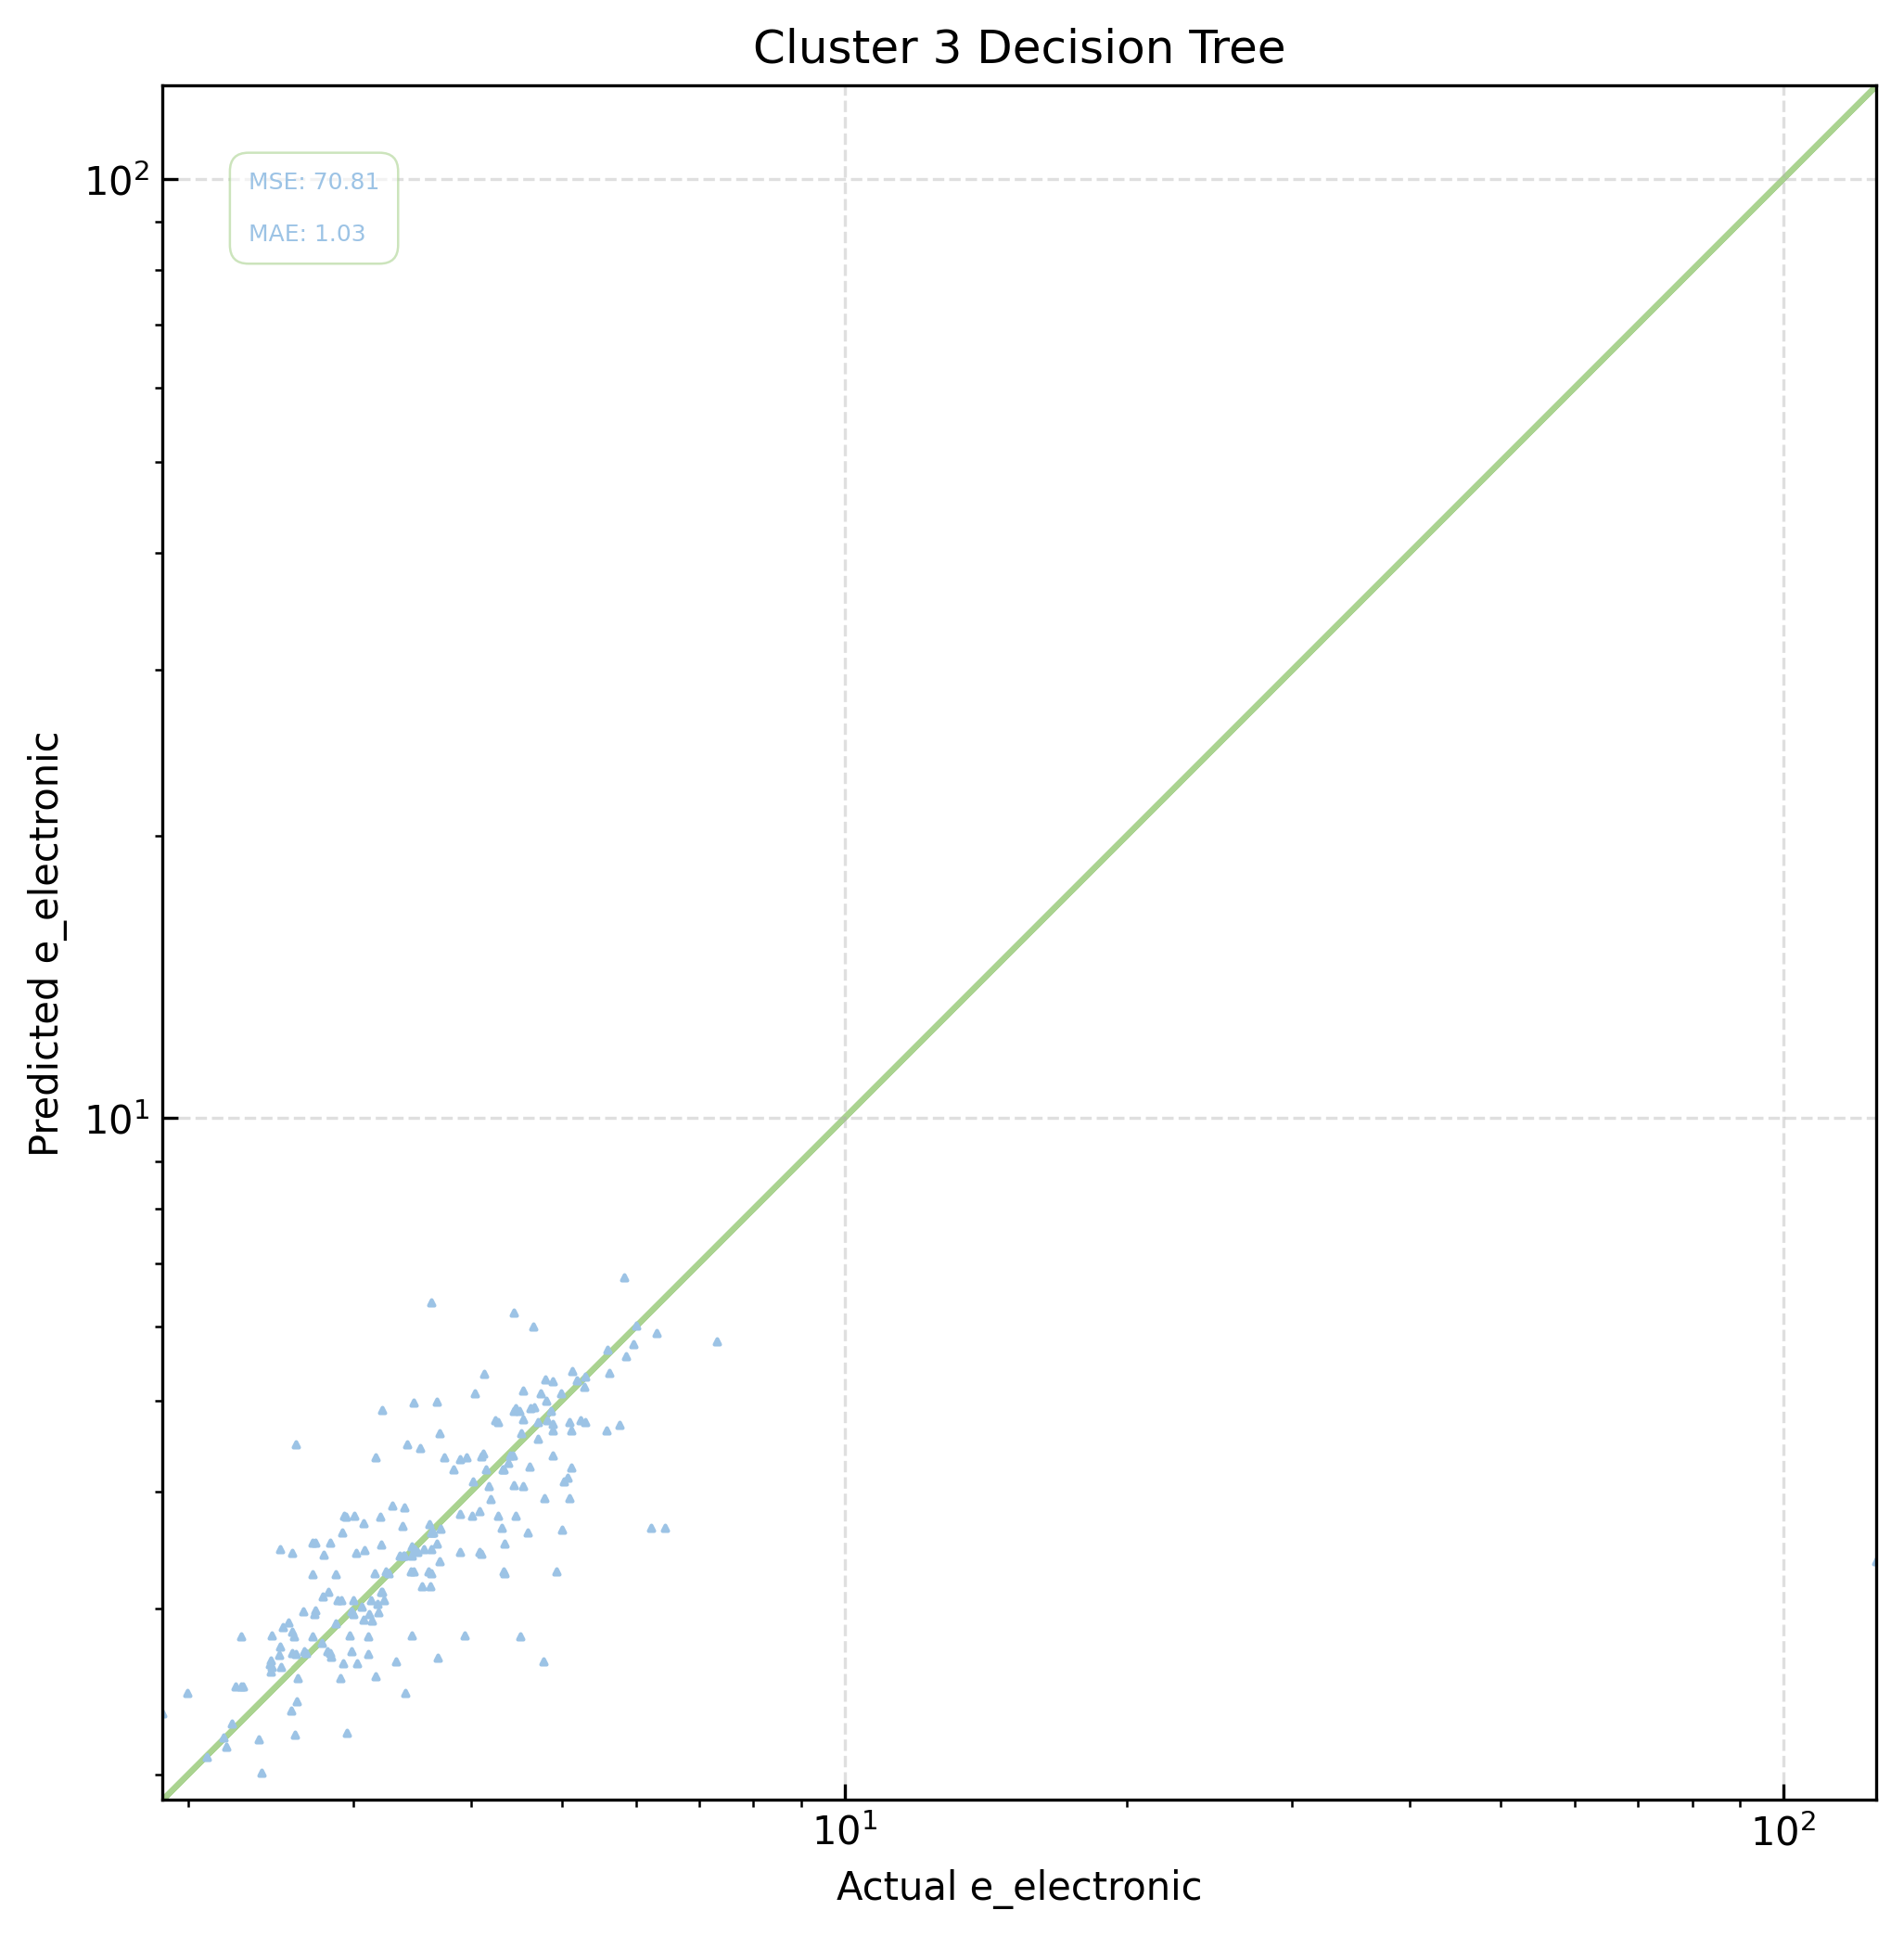

Cluster 4 Decision Tree   Best Depth: 11
MSE: 1.2599180860262884, MAE: 0.7737368738550938


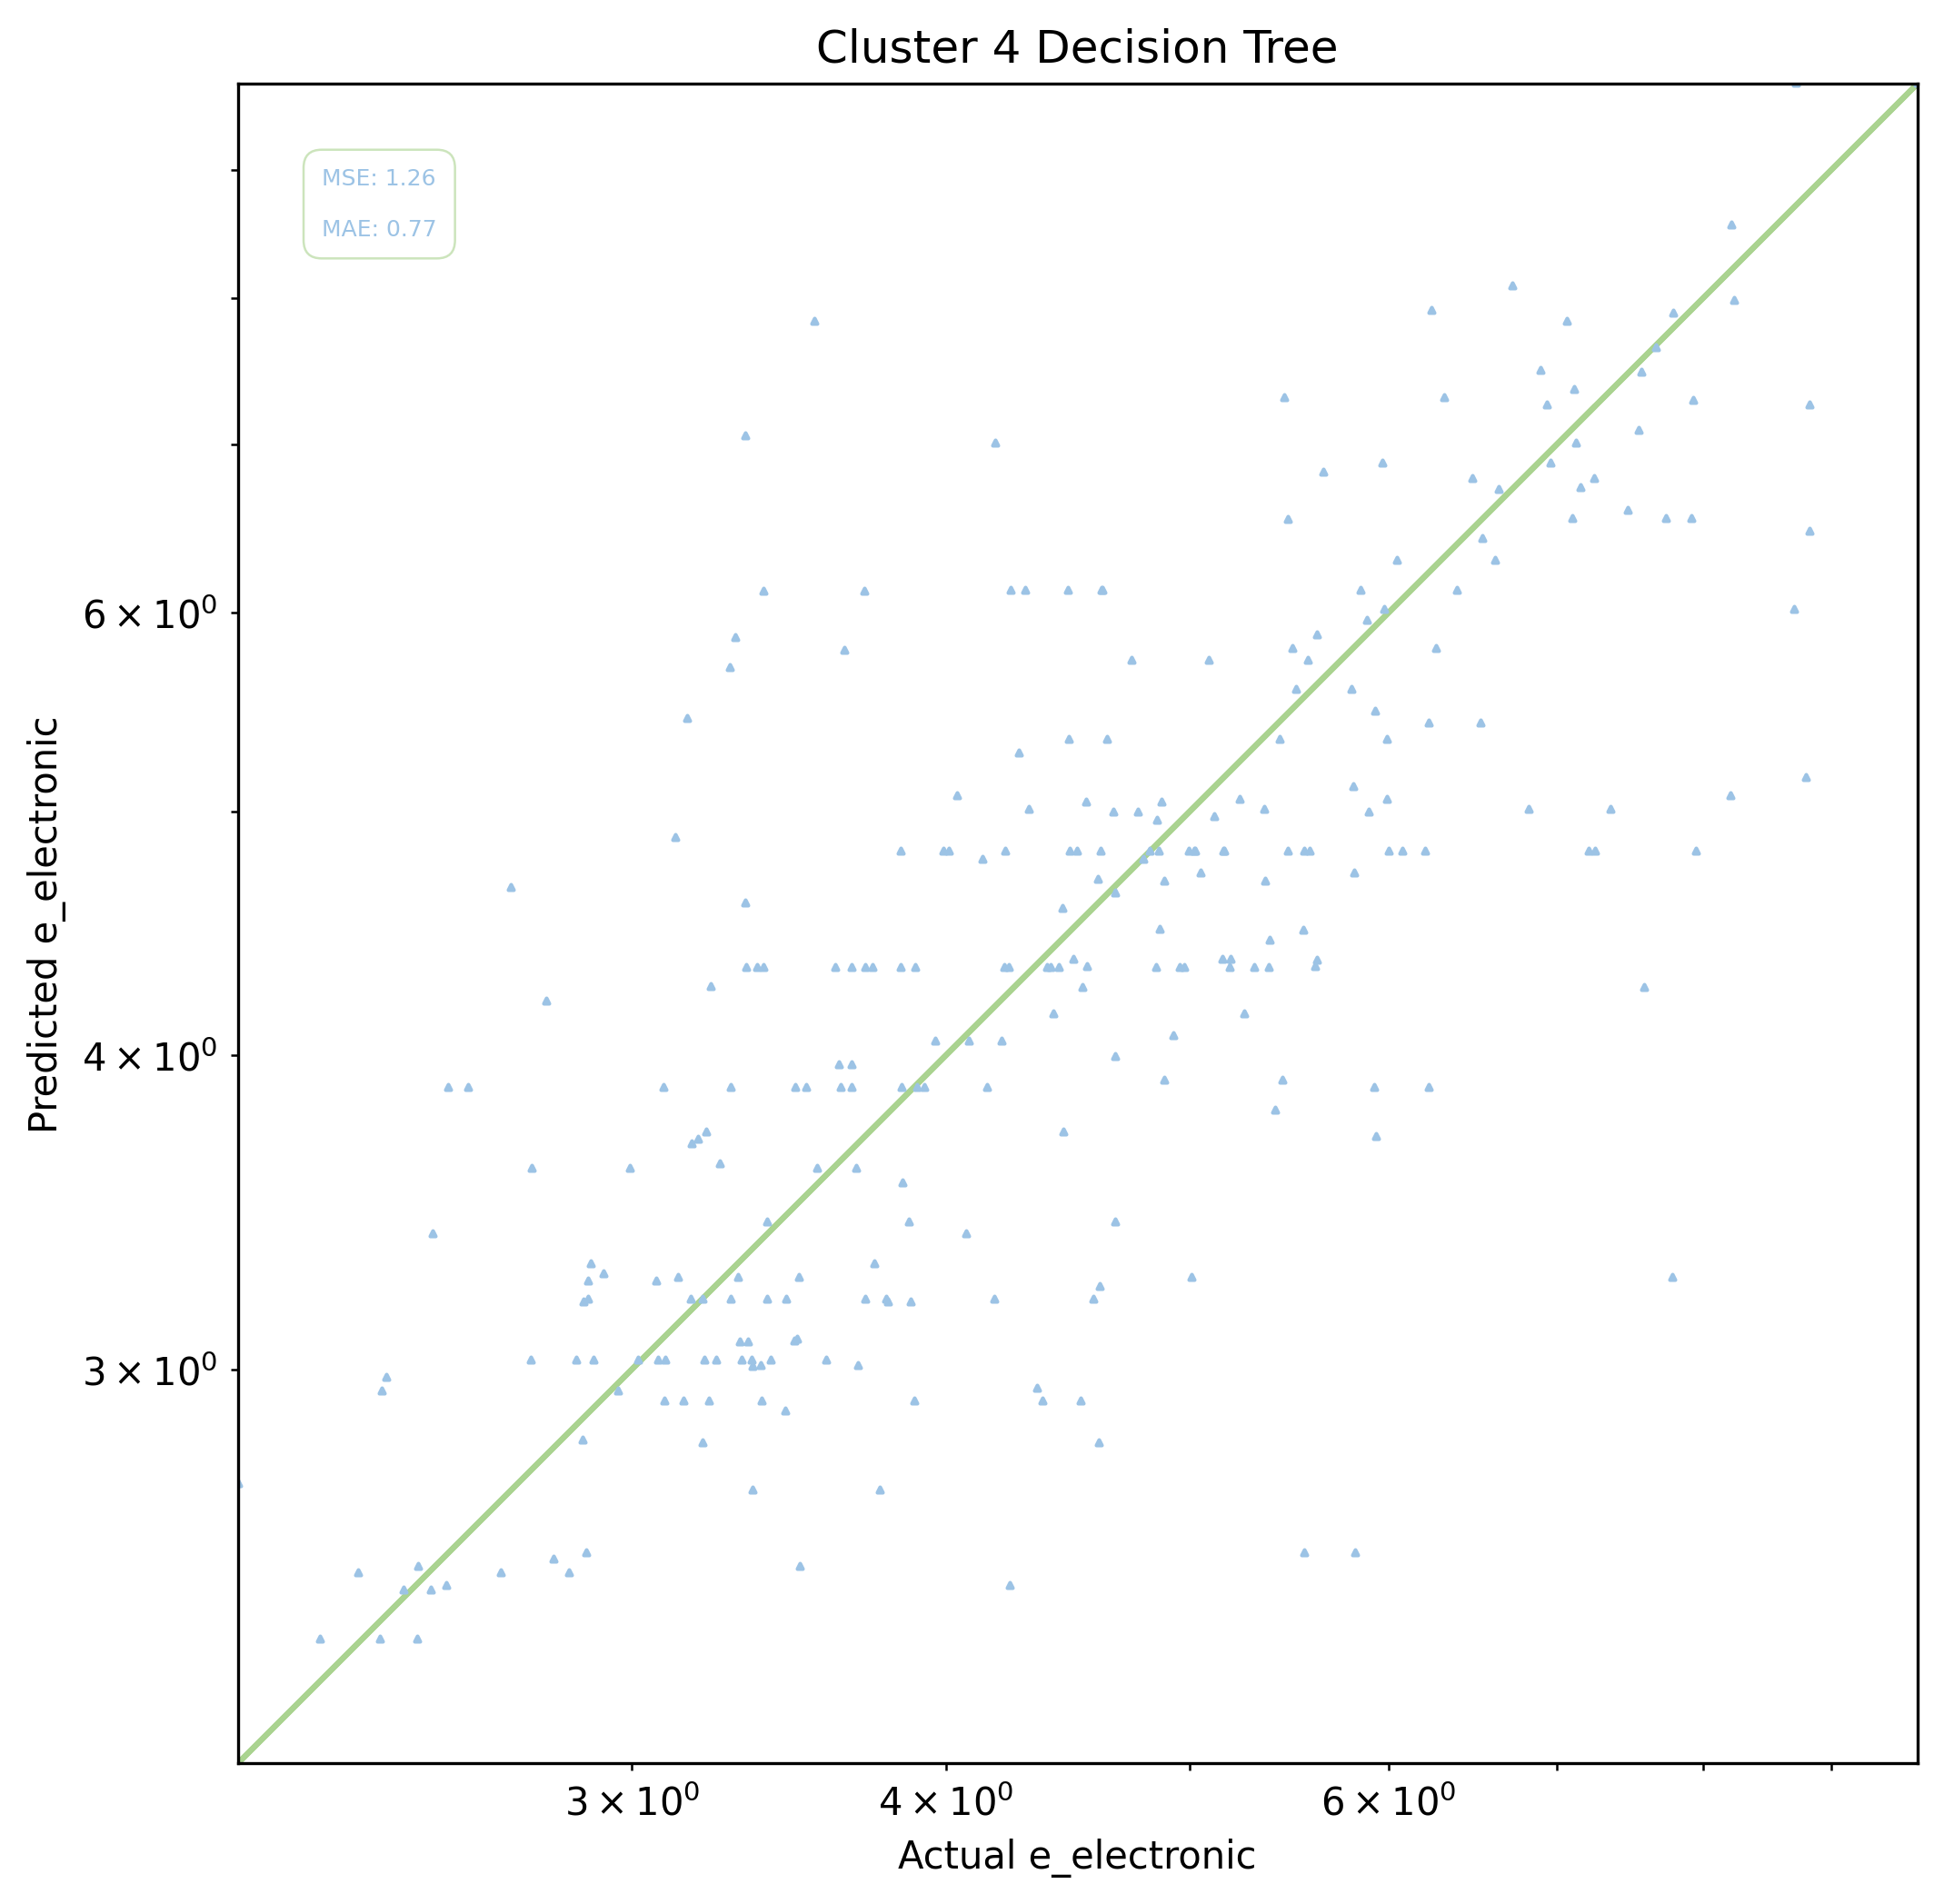

Cluster 5 Decision Tree   Best Depth: 11
MSE: 0.03357043295618383, MAE: 0.1323298594350893


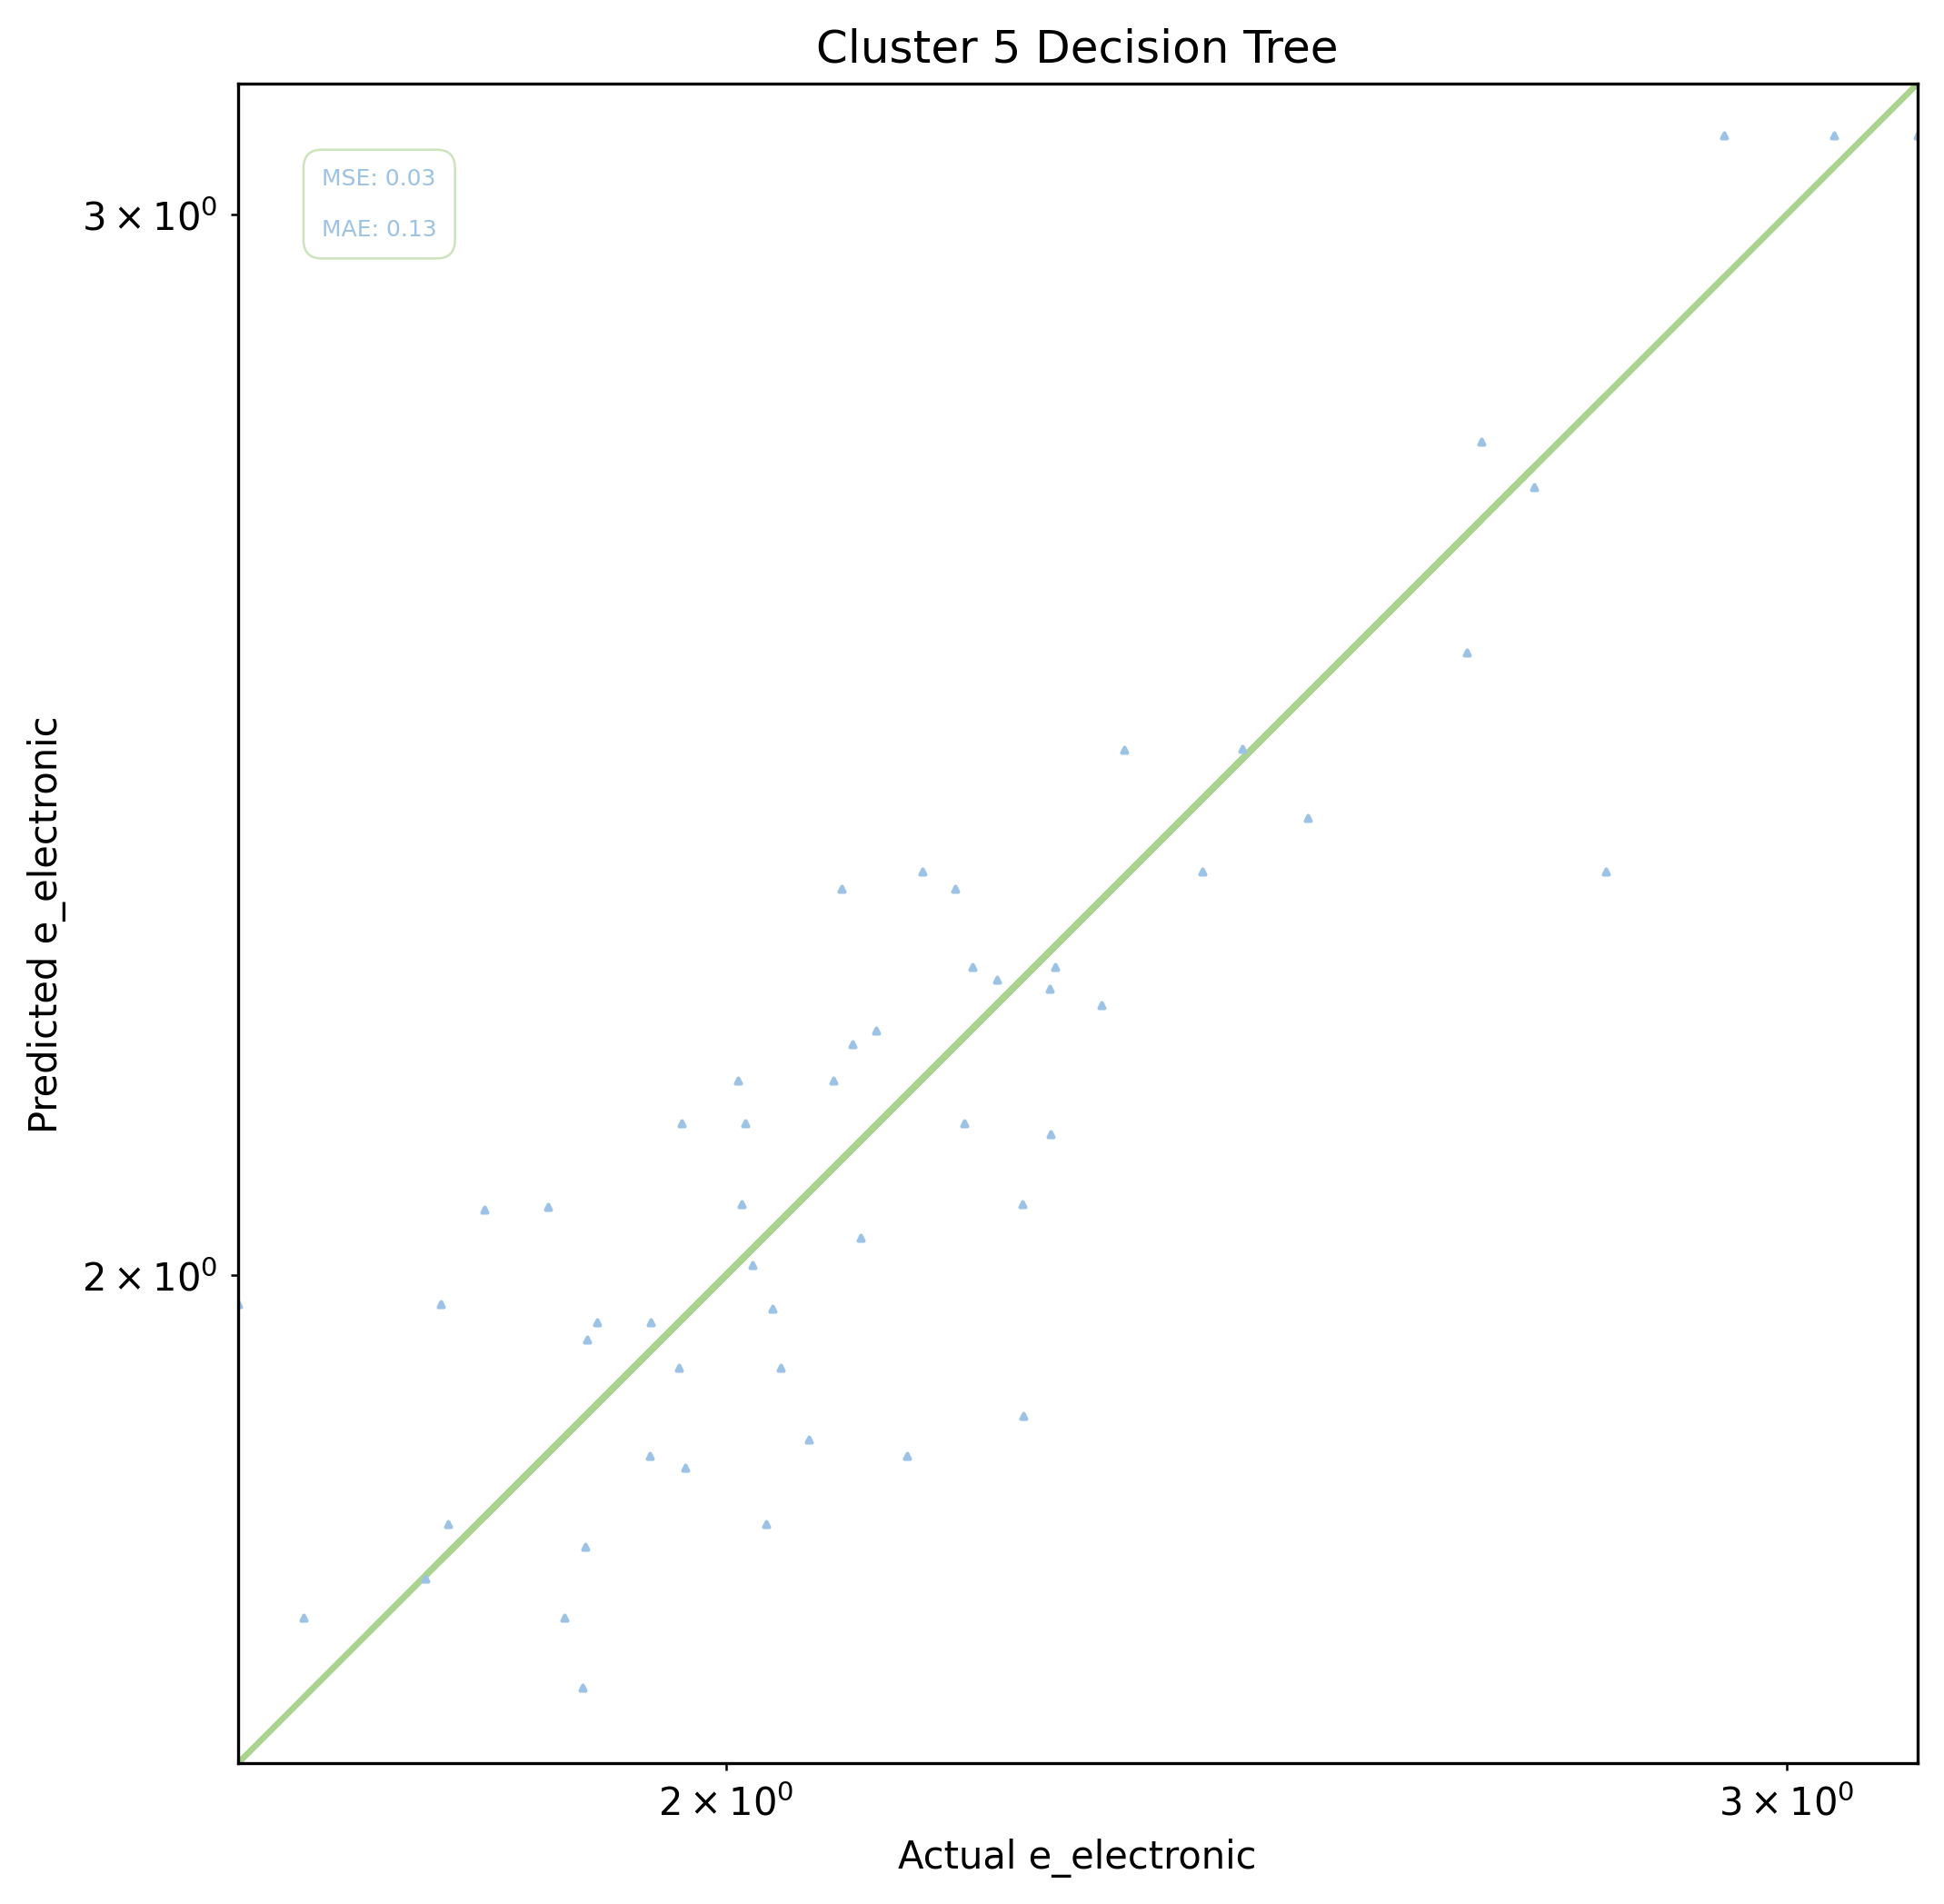

Cluster 6 Decision Tree   Best Depth: 11
MSE: 1125.8239252919138, MAE: 10.636540107320435


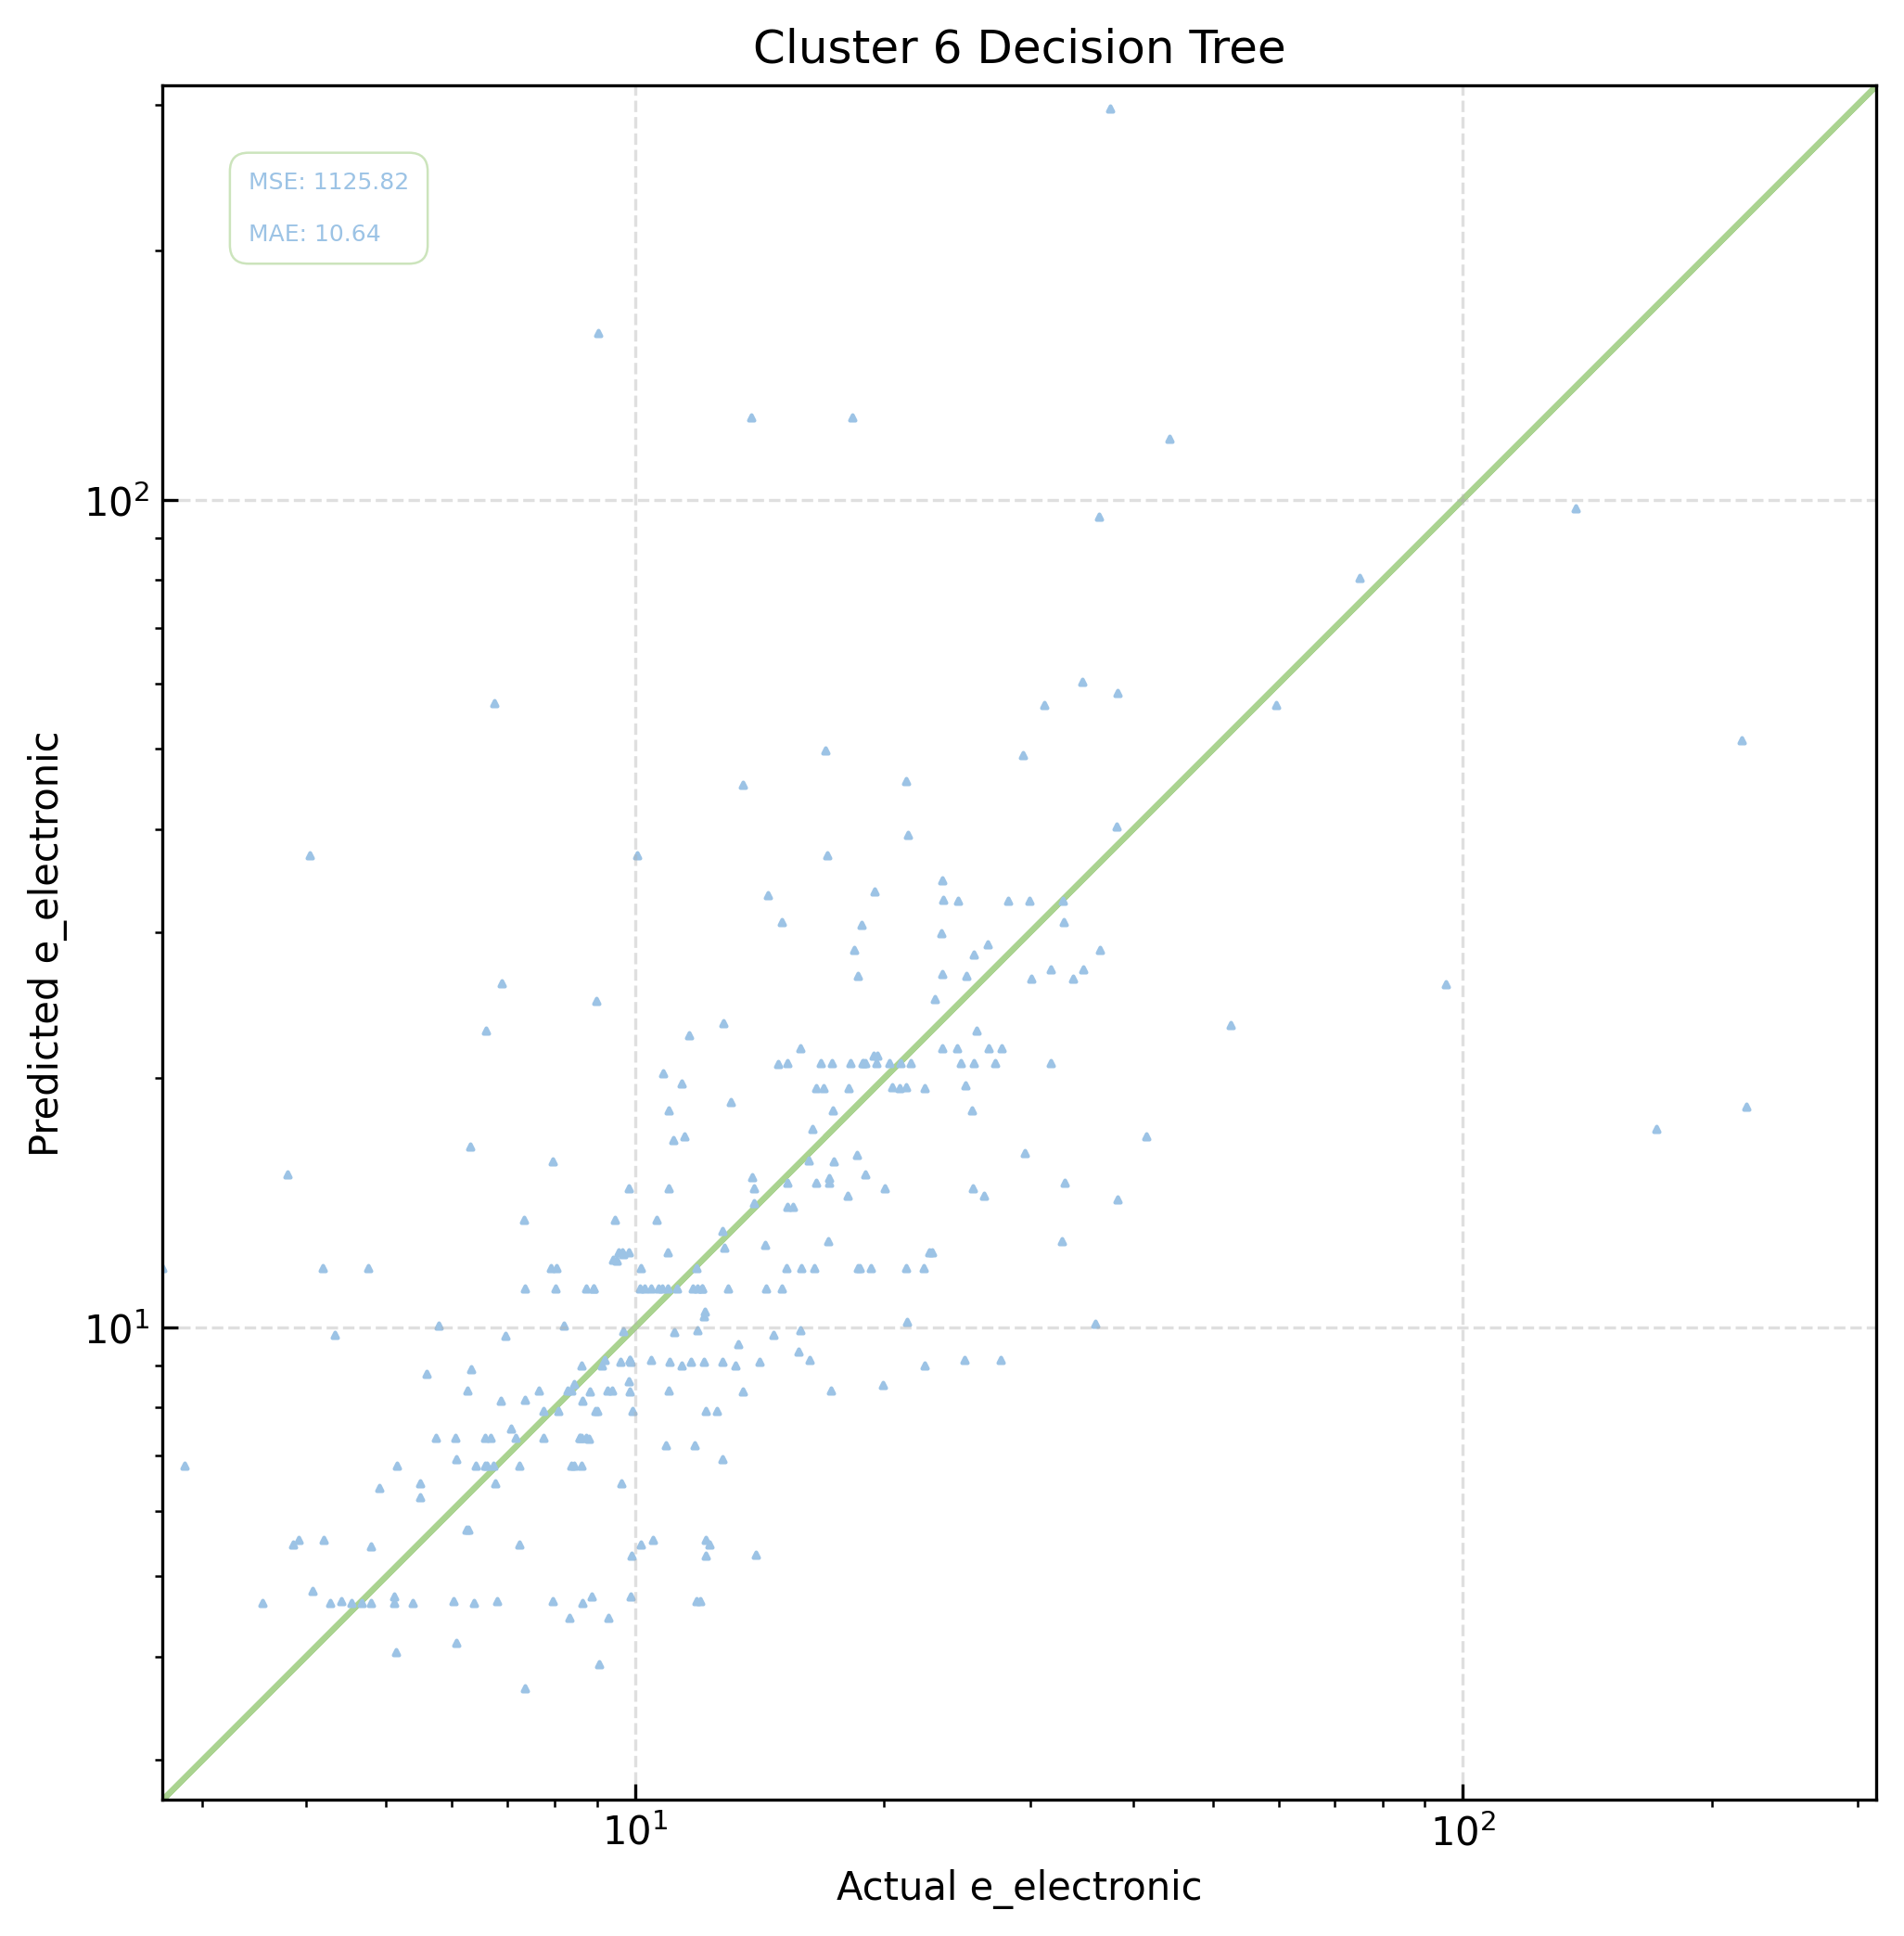

Cluster 7 Decision Tree   Best Depth: 17
MSE: 0.1270190686427813, MAE: 0.20572974546808245


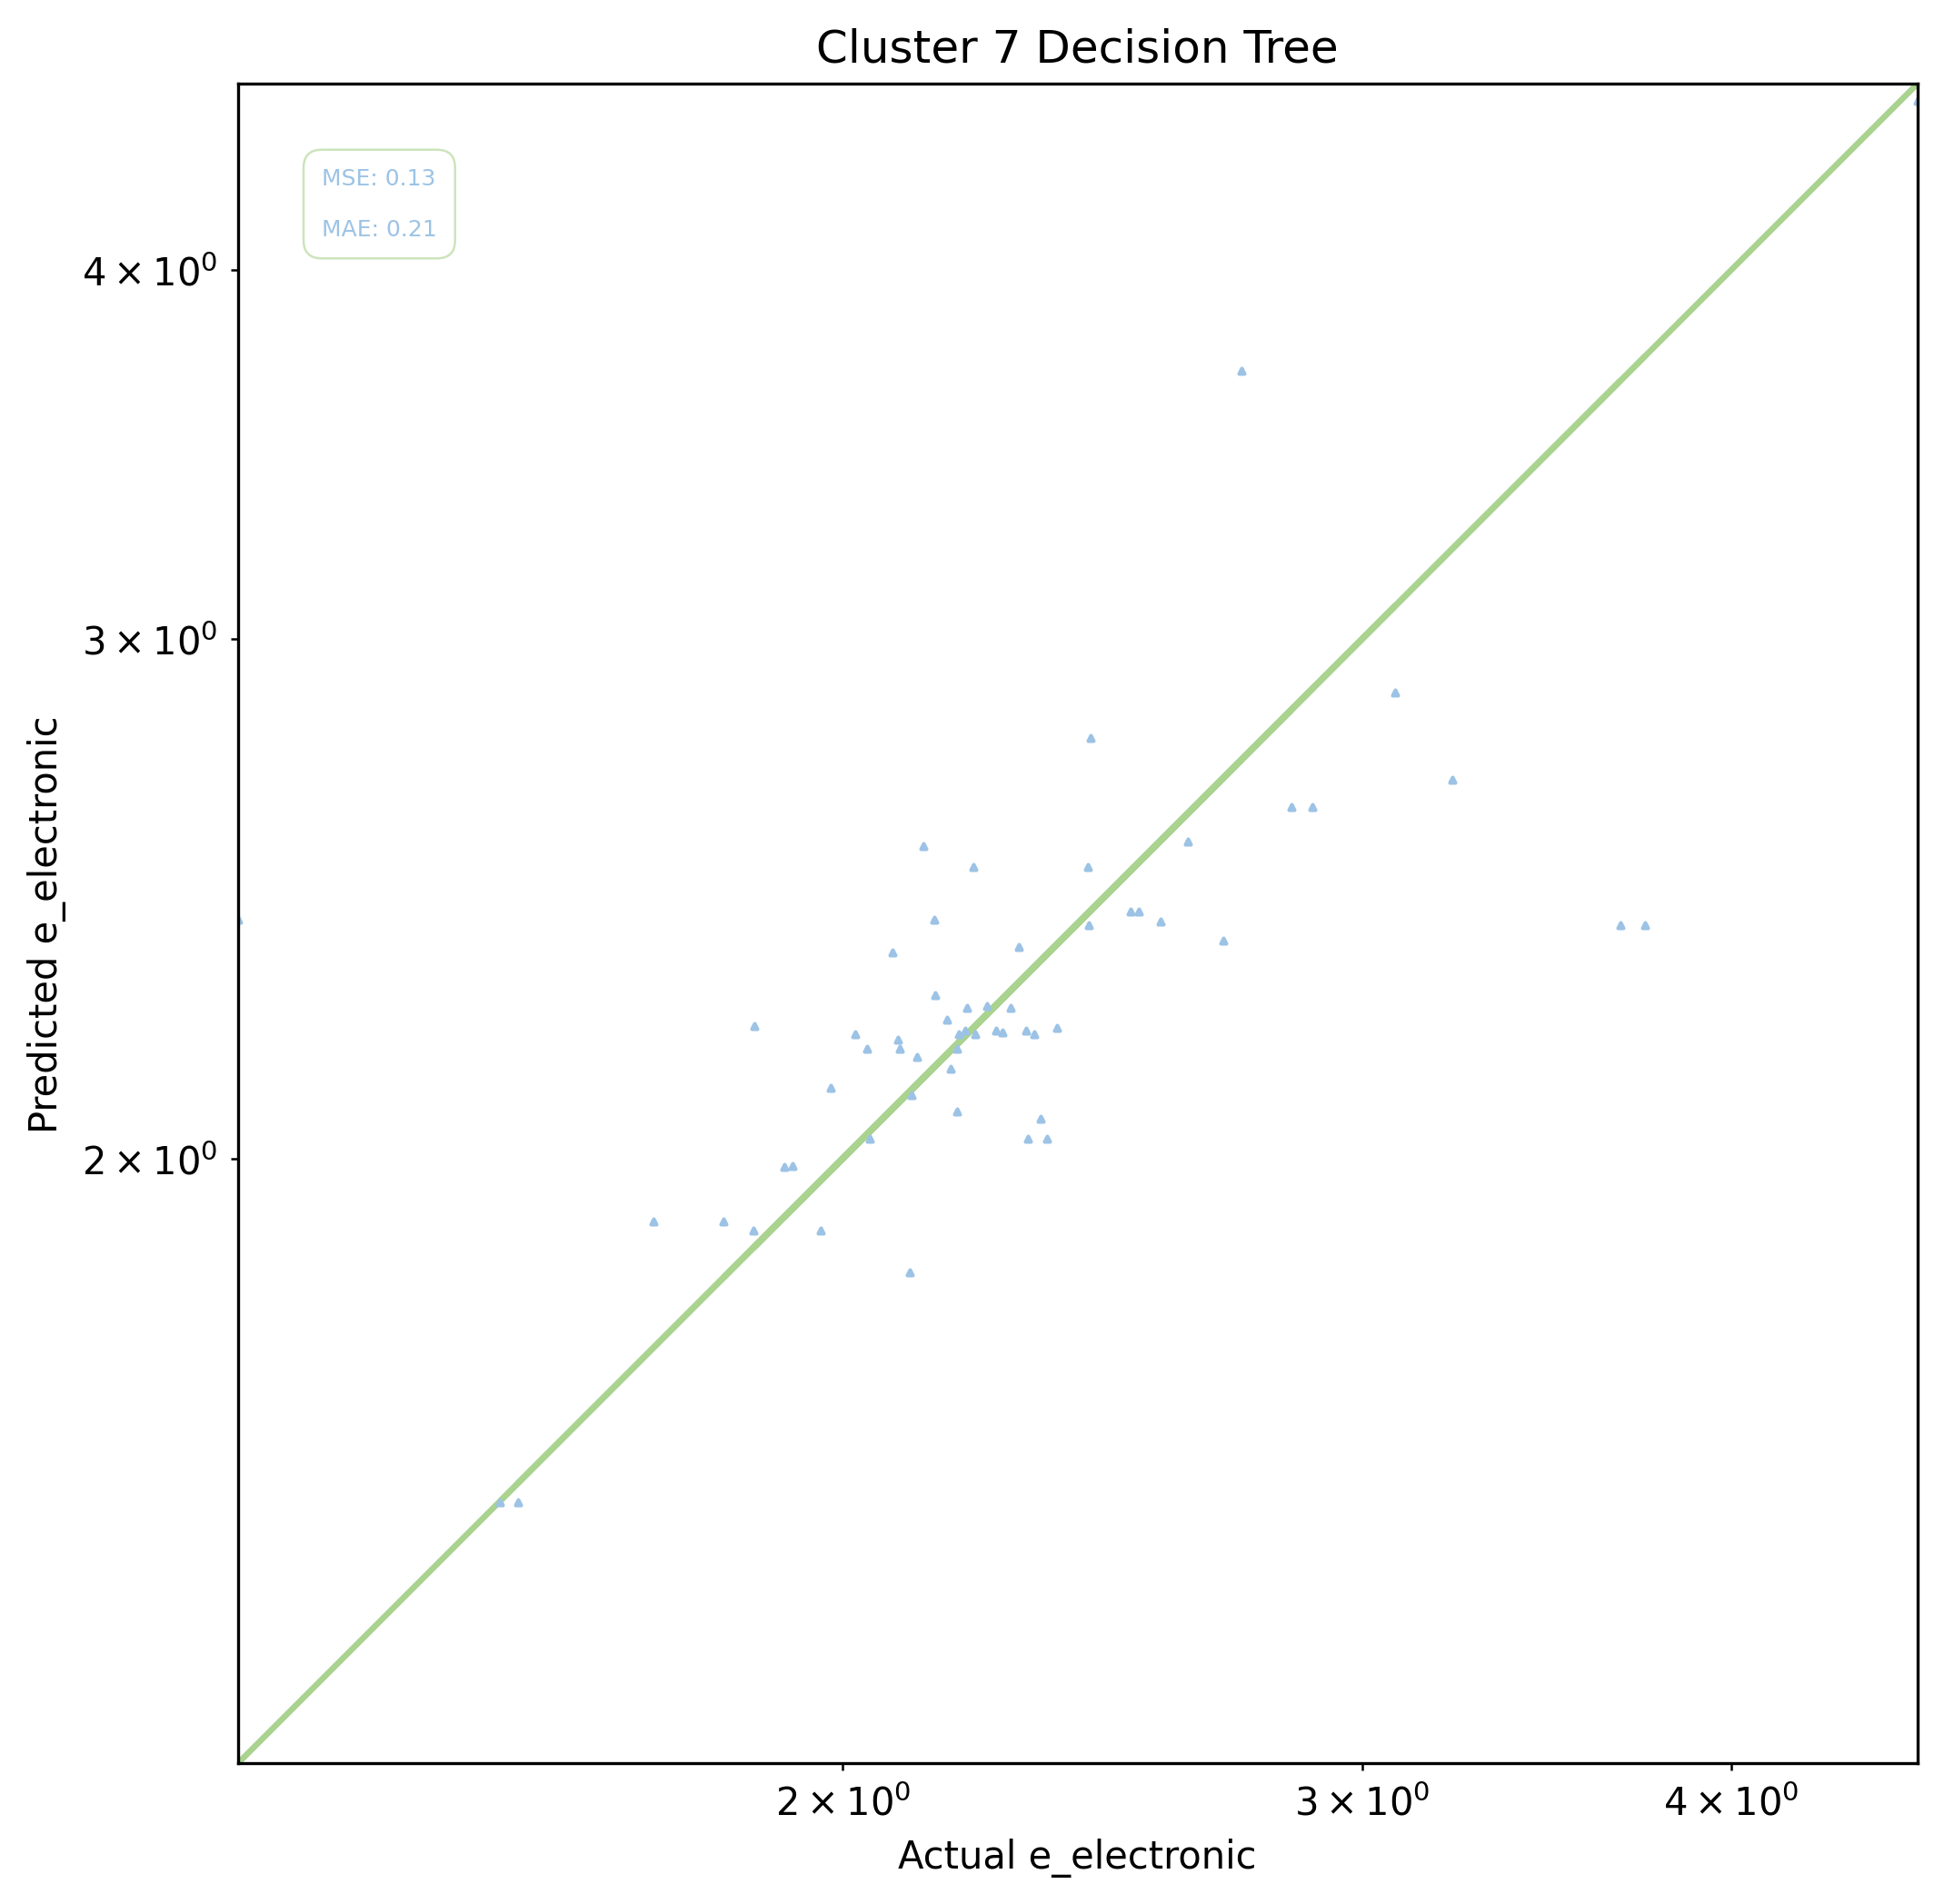

Cluster 8 Decision Tree   Best Depth: 16
MSE: 0.23846219596874652, MAE: 0.35356465694795425


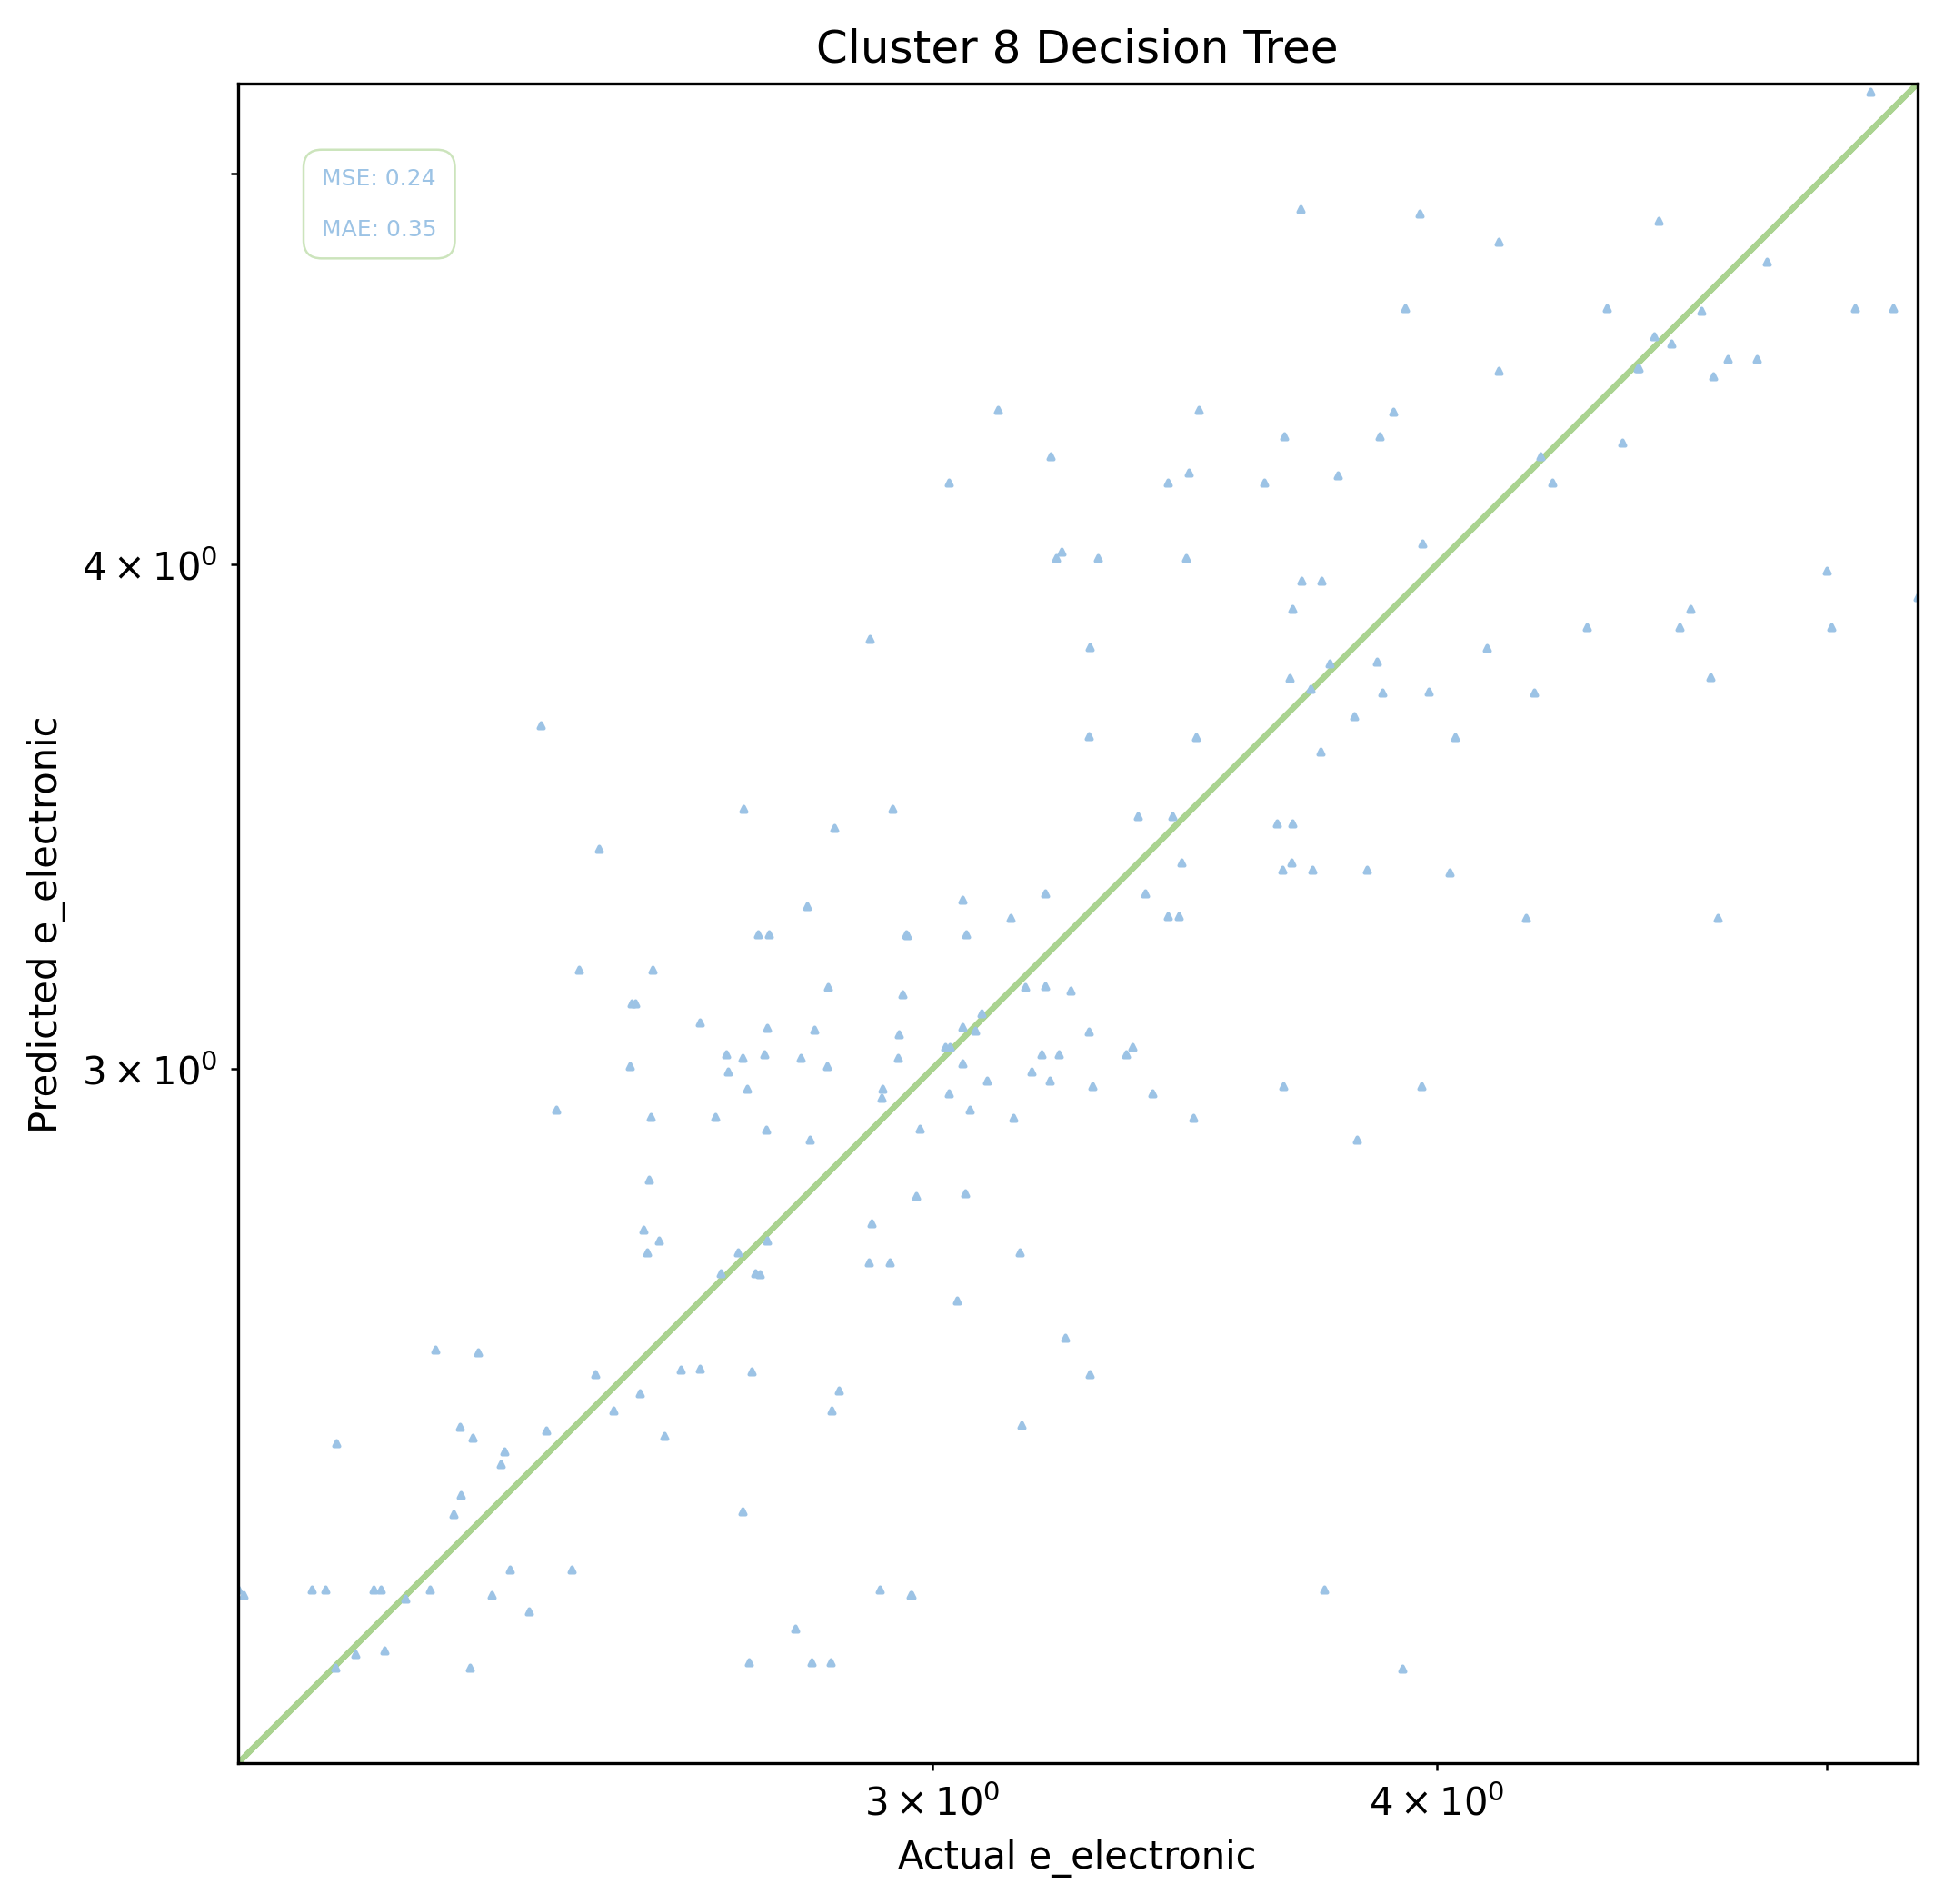

Cluster 9 Decision Tree   Best Depth: 14
MSE: 99.087945197324, MAE: 3.450613808486106


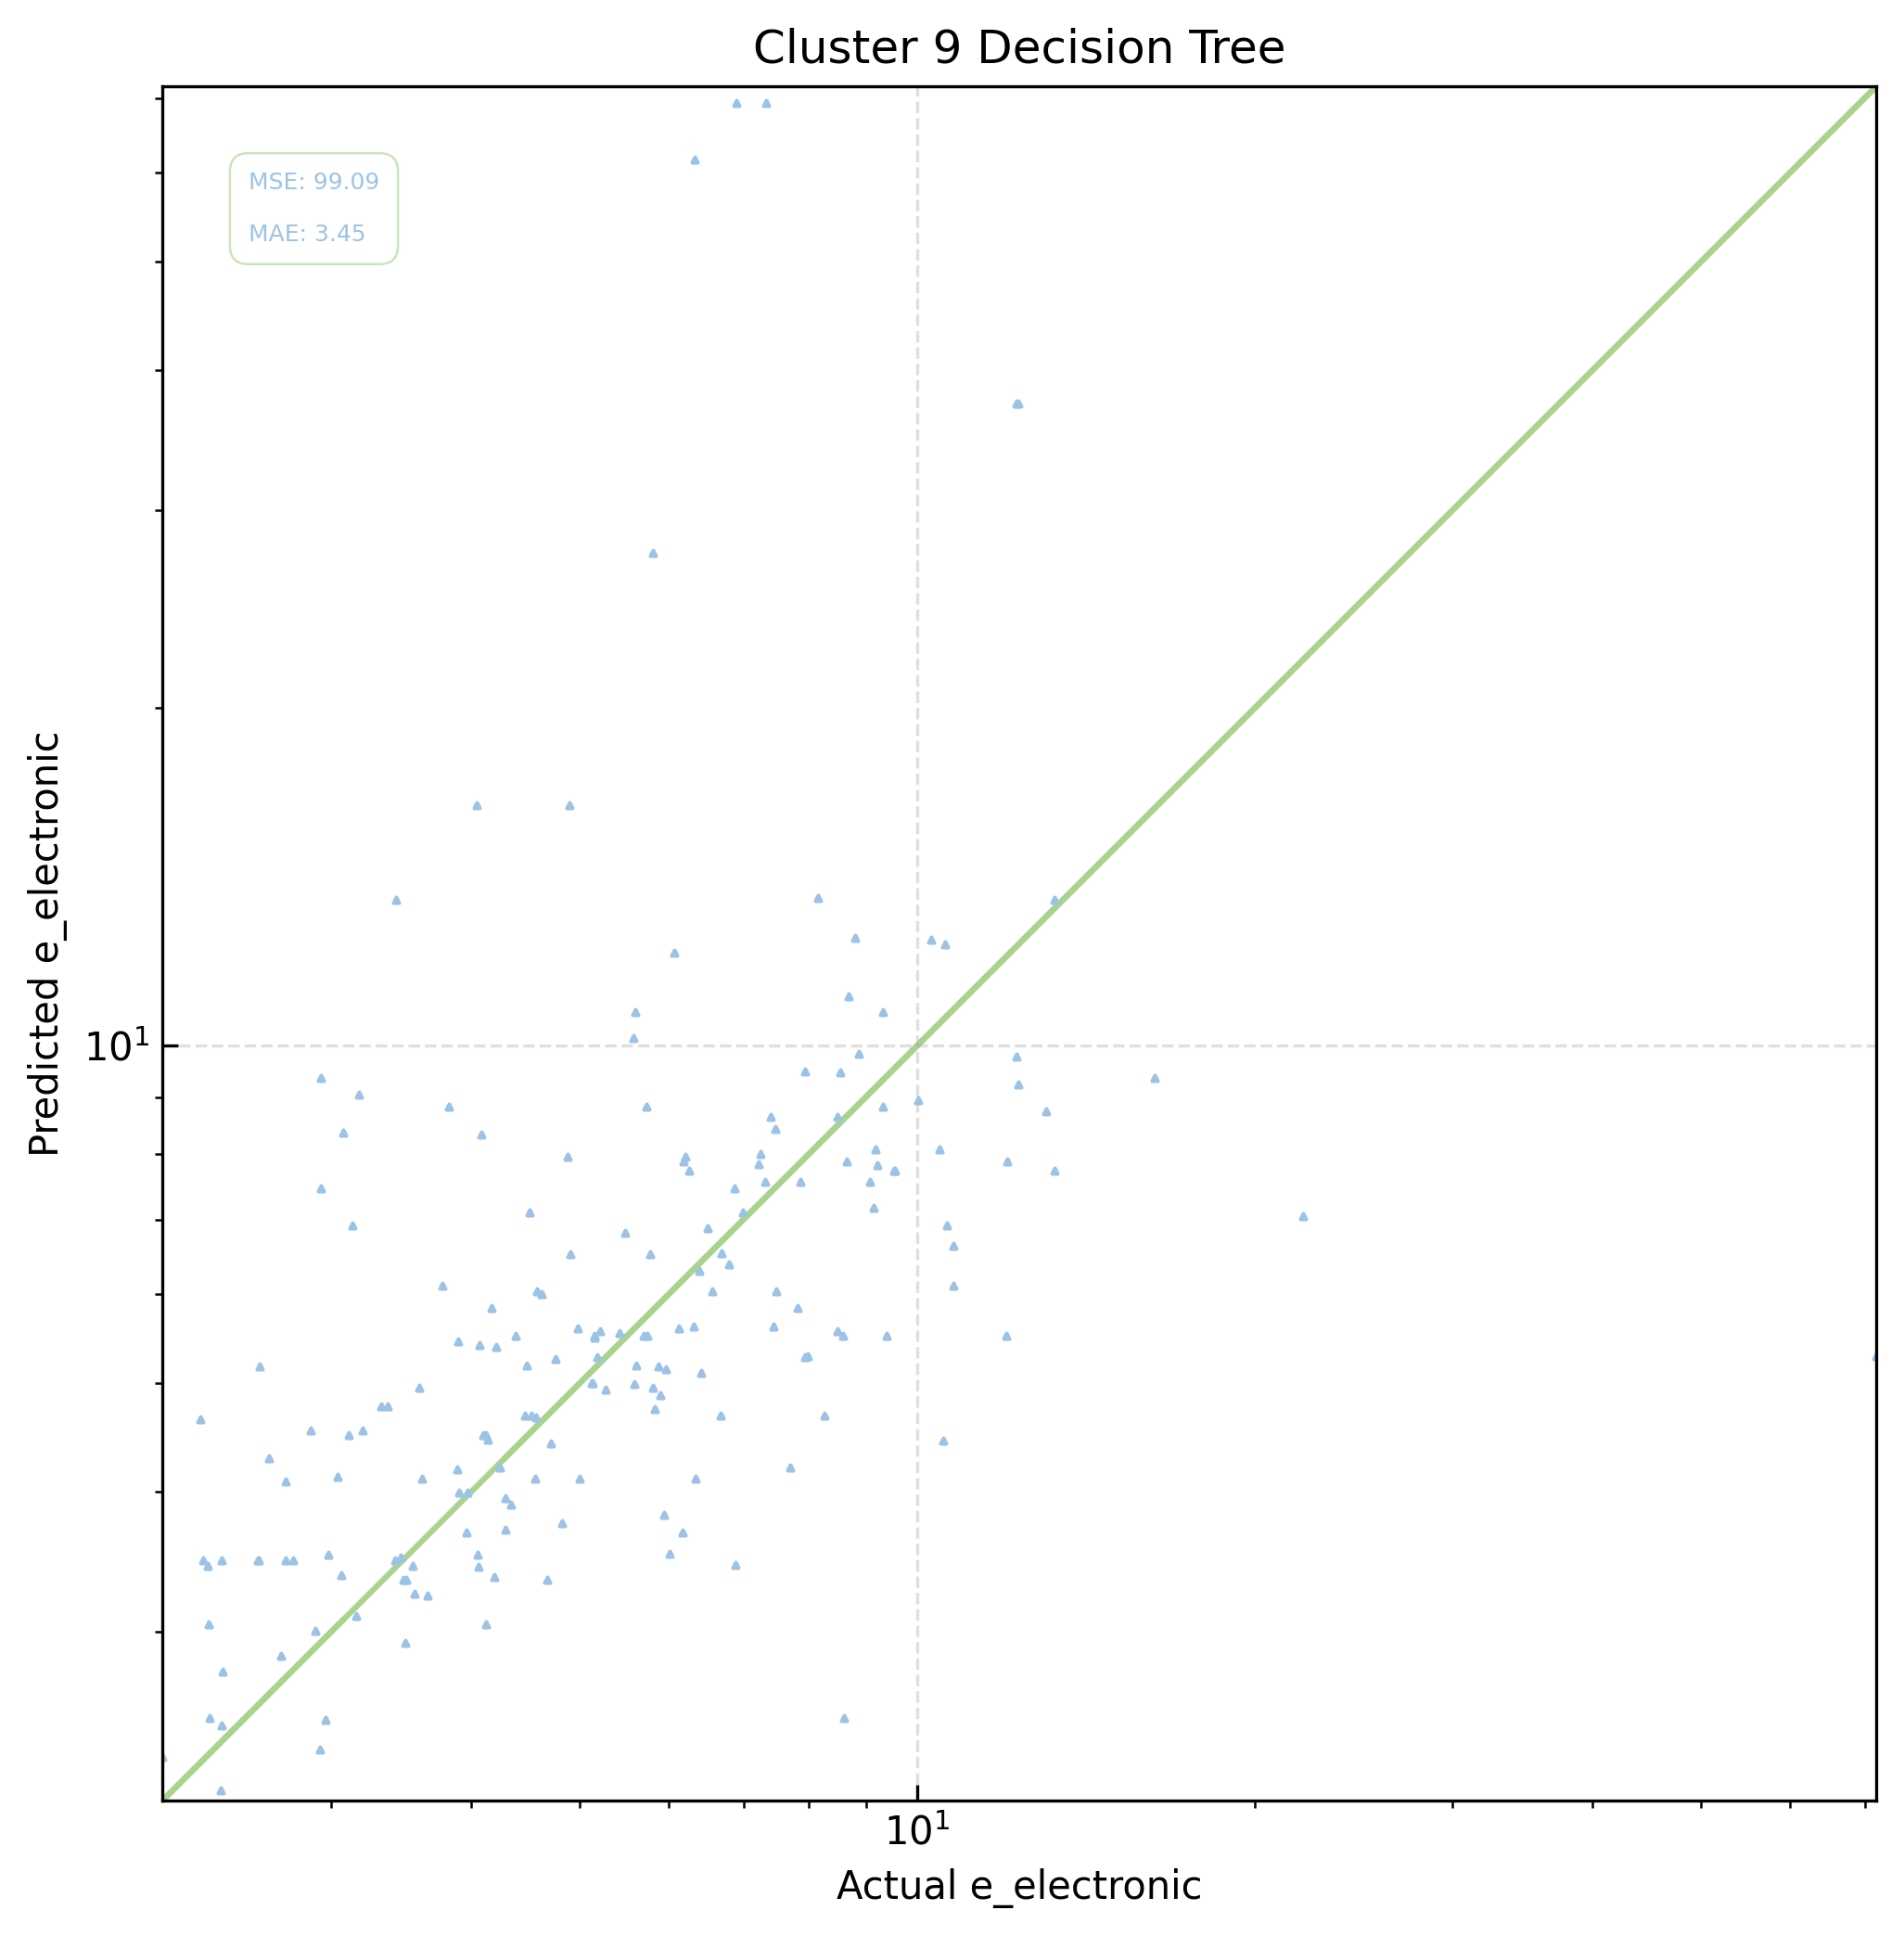

Cluster 10 Decision Tree   Best Depth: 10
MSE: 5.246516647305283, MAE: 1.4554265728347249


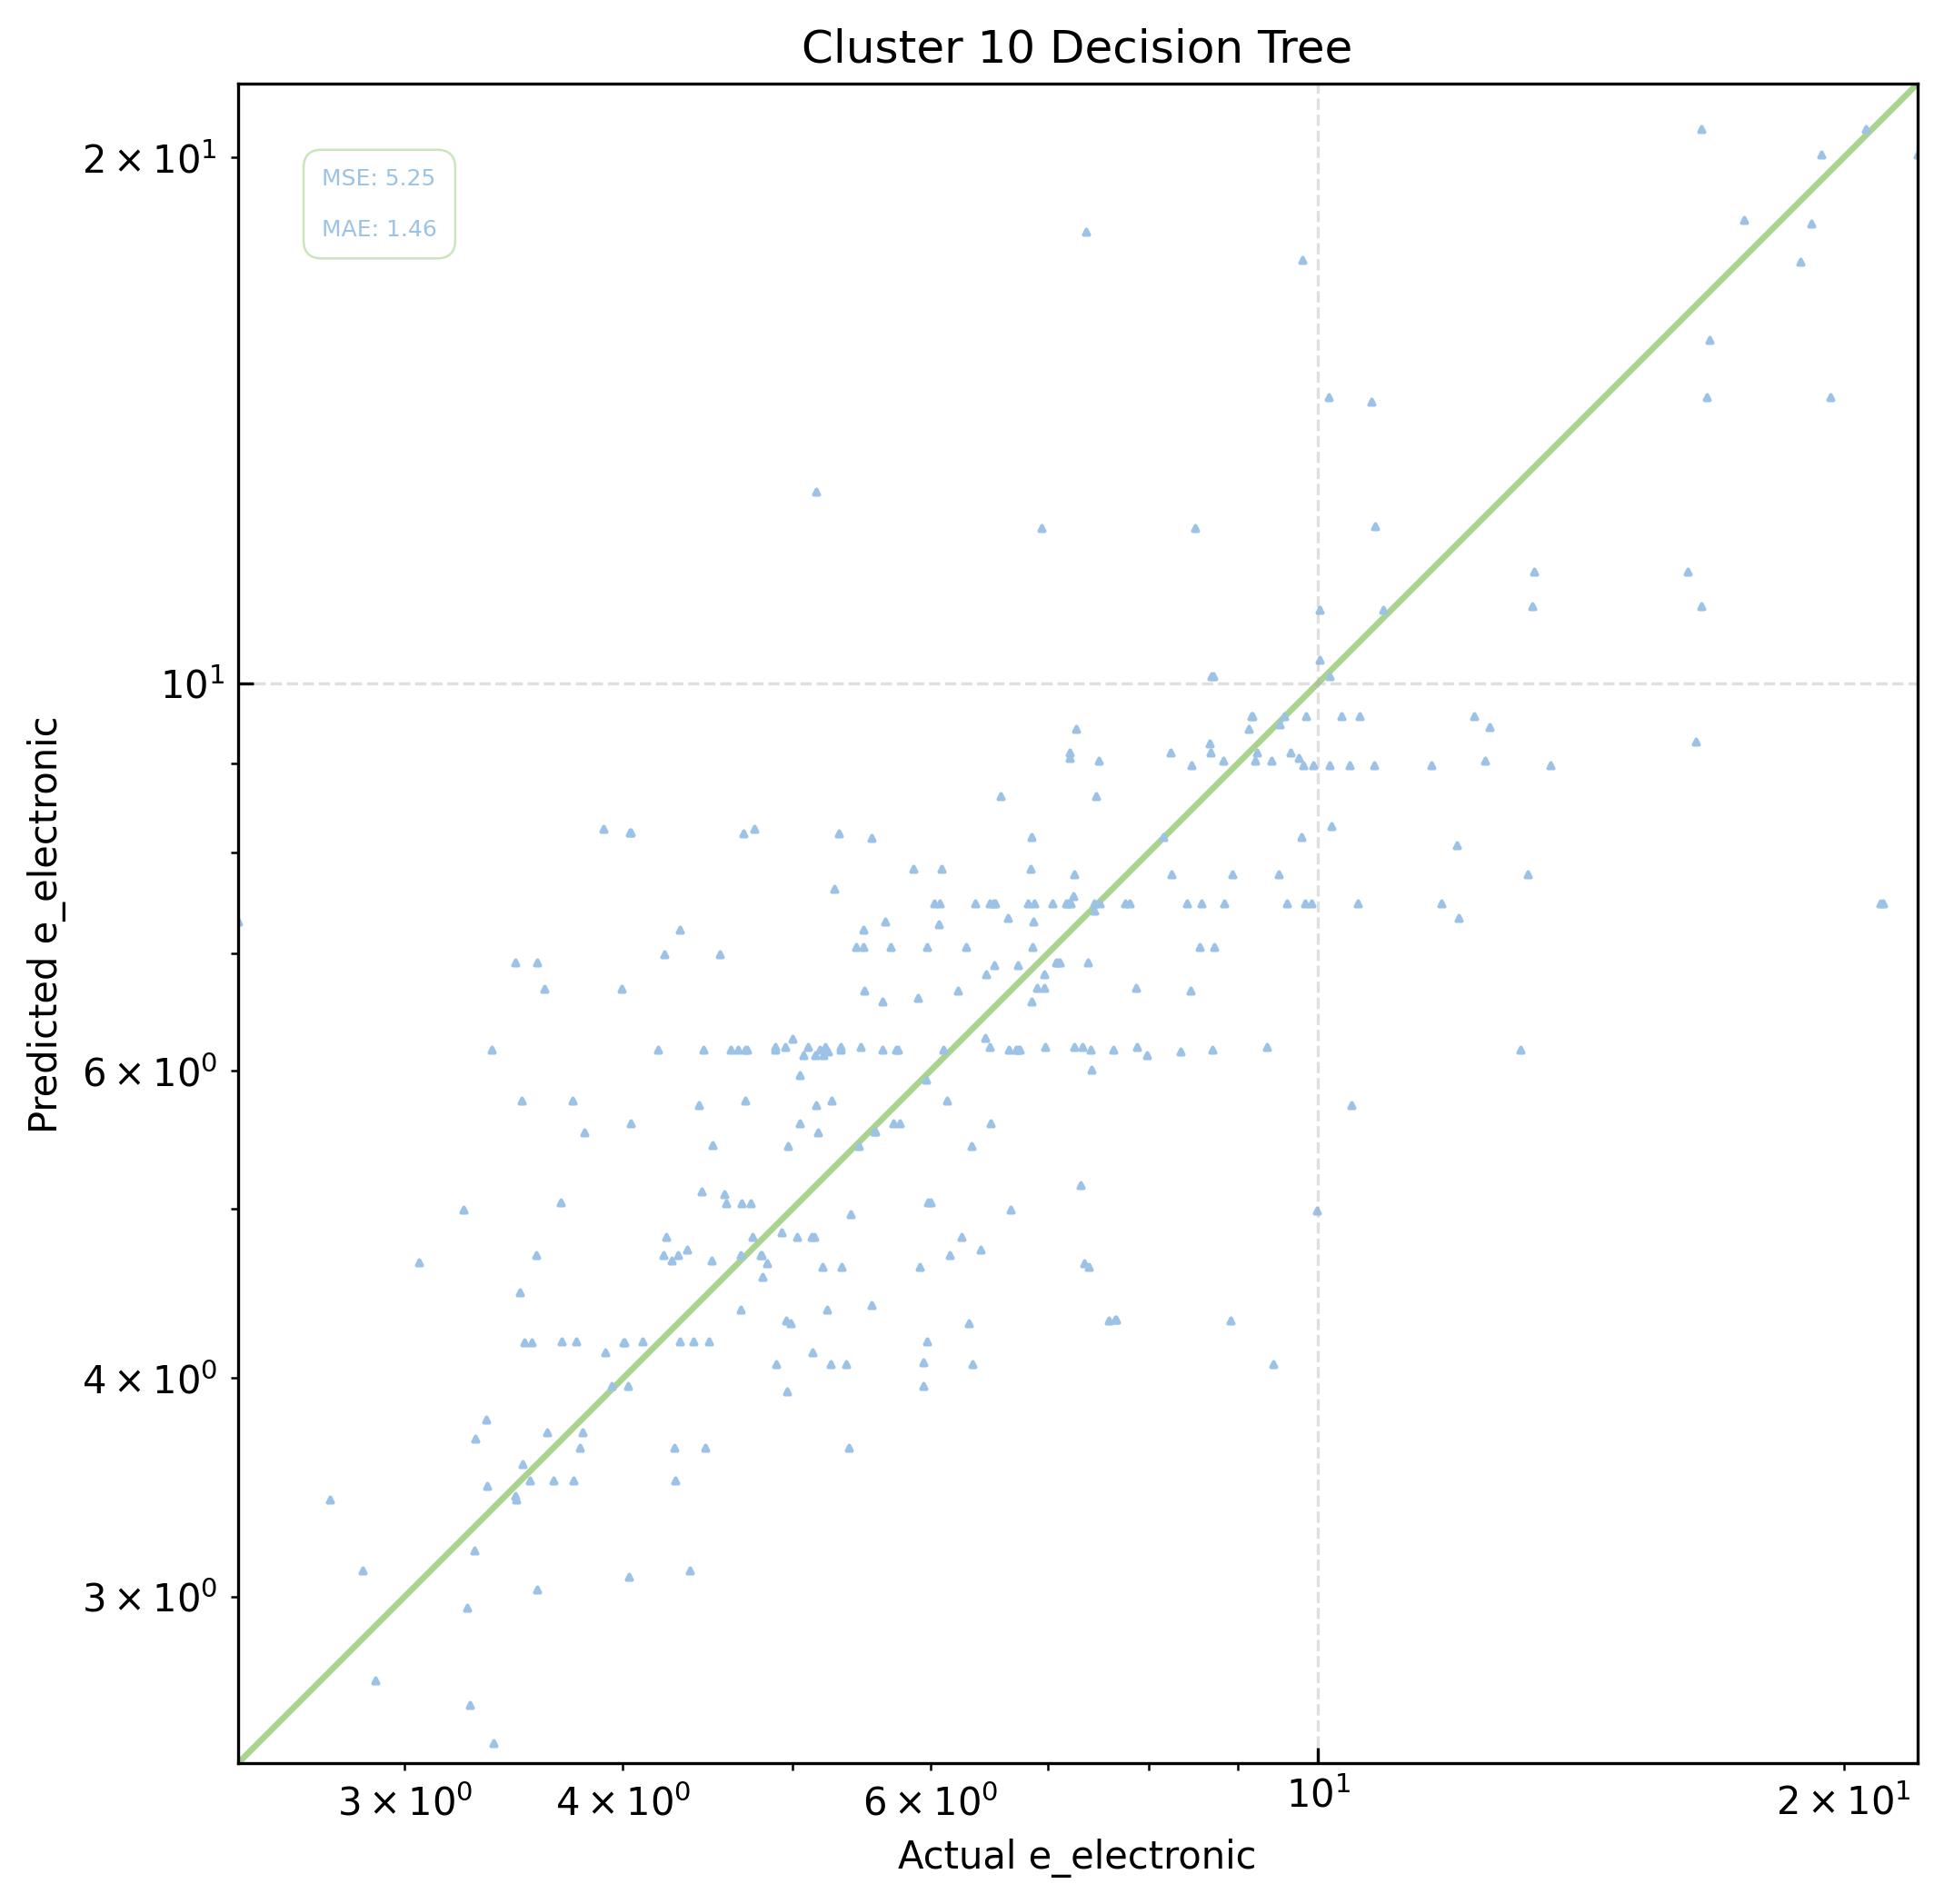

In [339]:
dt_models = []
y_test_all = []
y_pred_all = []

for cluster in range(CLUSTER_NUMS):
    # only train the X_train size great than 300
    if train_clusters[cluster].shape[0] < MIN_TRAIN_SIZE:
        continue
    dt, y_test, y_pred = decision_tree(cluster)
    dt_models.append(lr)
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred)

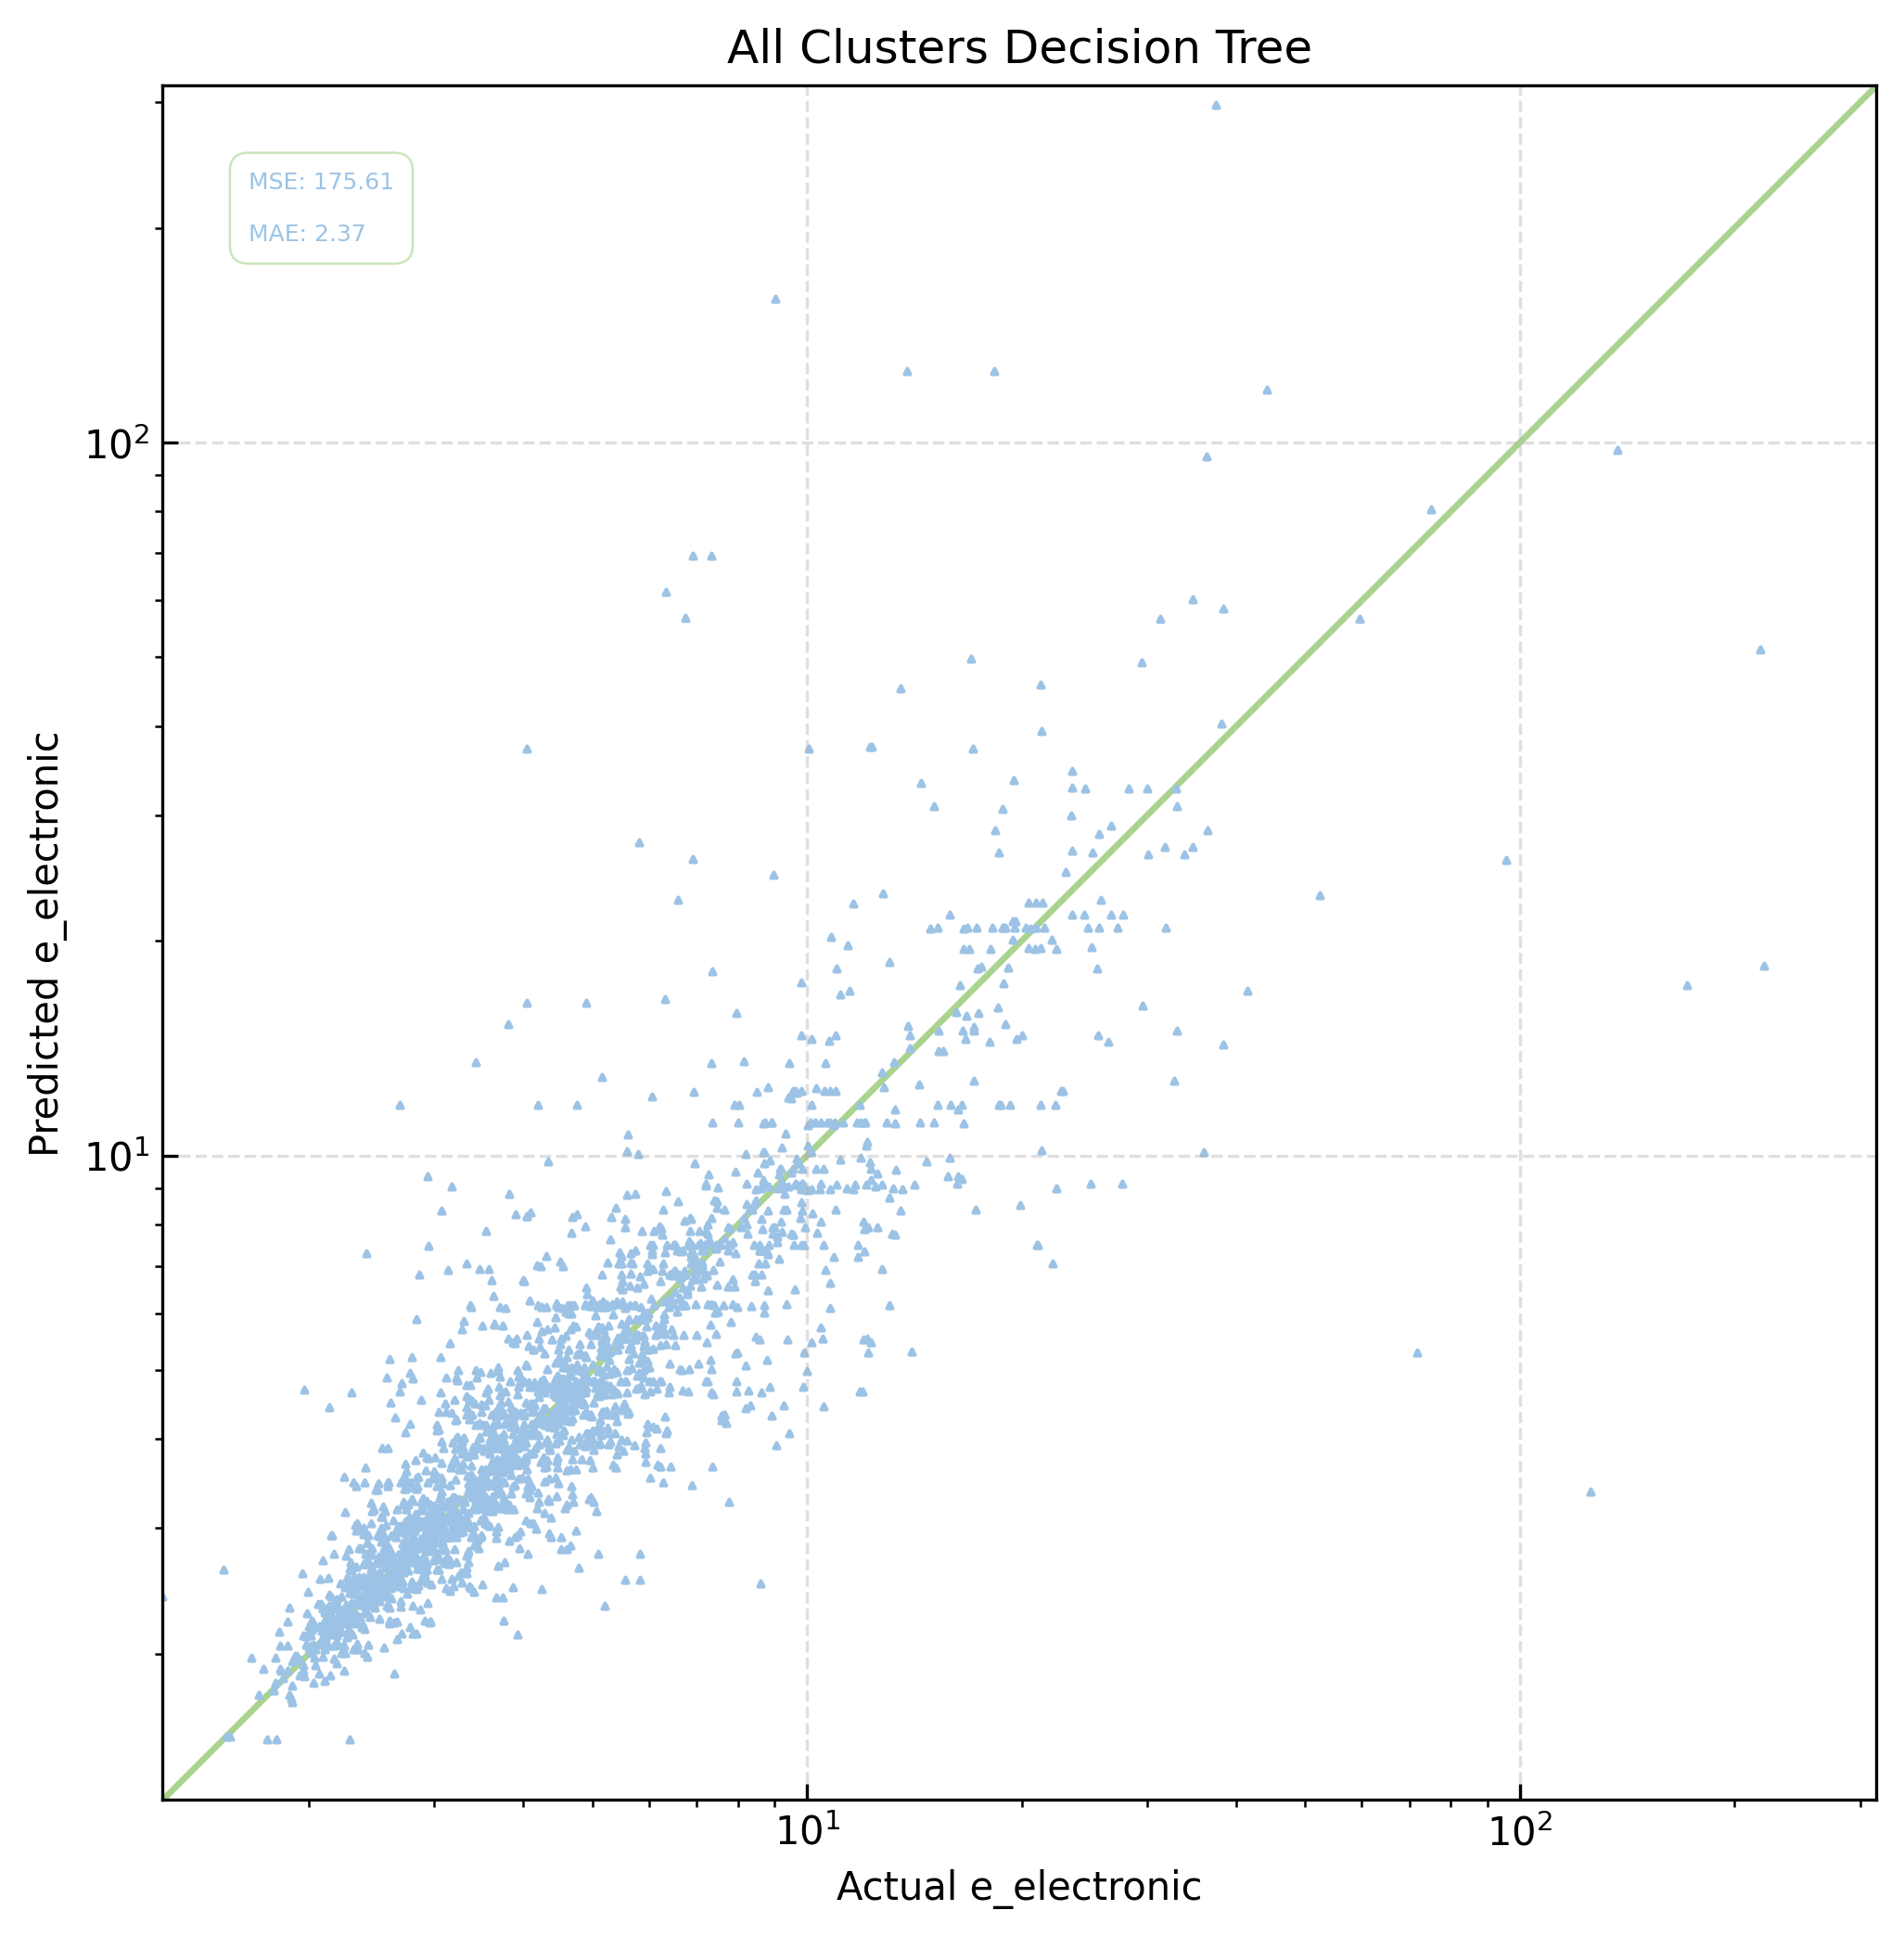

In [340]:
# draw the parity plot of all clusters
mse, mae = mean_squared_error(y_test_all, y_pred_all), mean_absolute_error(y_test_all, y_pred_all)
parity_plot(mse, mae, y_test_all, y_pred_all, y_name=TARGET, title='All Clusters Decision Tree', fig_path=FIG_PATH)


#### 3. 随机森林算法

In [341]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(cluster):
    X_train, y_train, X_test, y_test = get_train_test_set(cluster)
    rf = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, max_depth=best_depths[cluster])
    rf.fit(X_train, y_train)
    # test
    mse, mae, y_pred = model_test(rf, X_test, y_test)
    plot_scores(mse, mae, y_test, y_pred, title=f'Cluster {cluster} Random Forest', fig_path=FIG_PATH)
    return rf, y_test, y_pred

MSE: 0.20134695752504, MAE: 0.3209125594548758


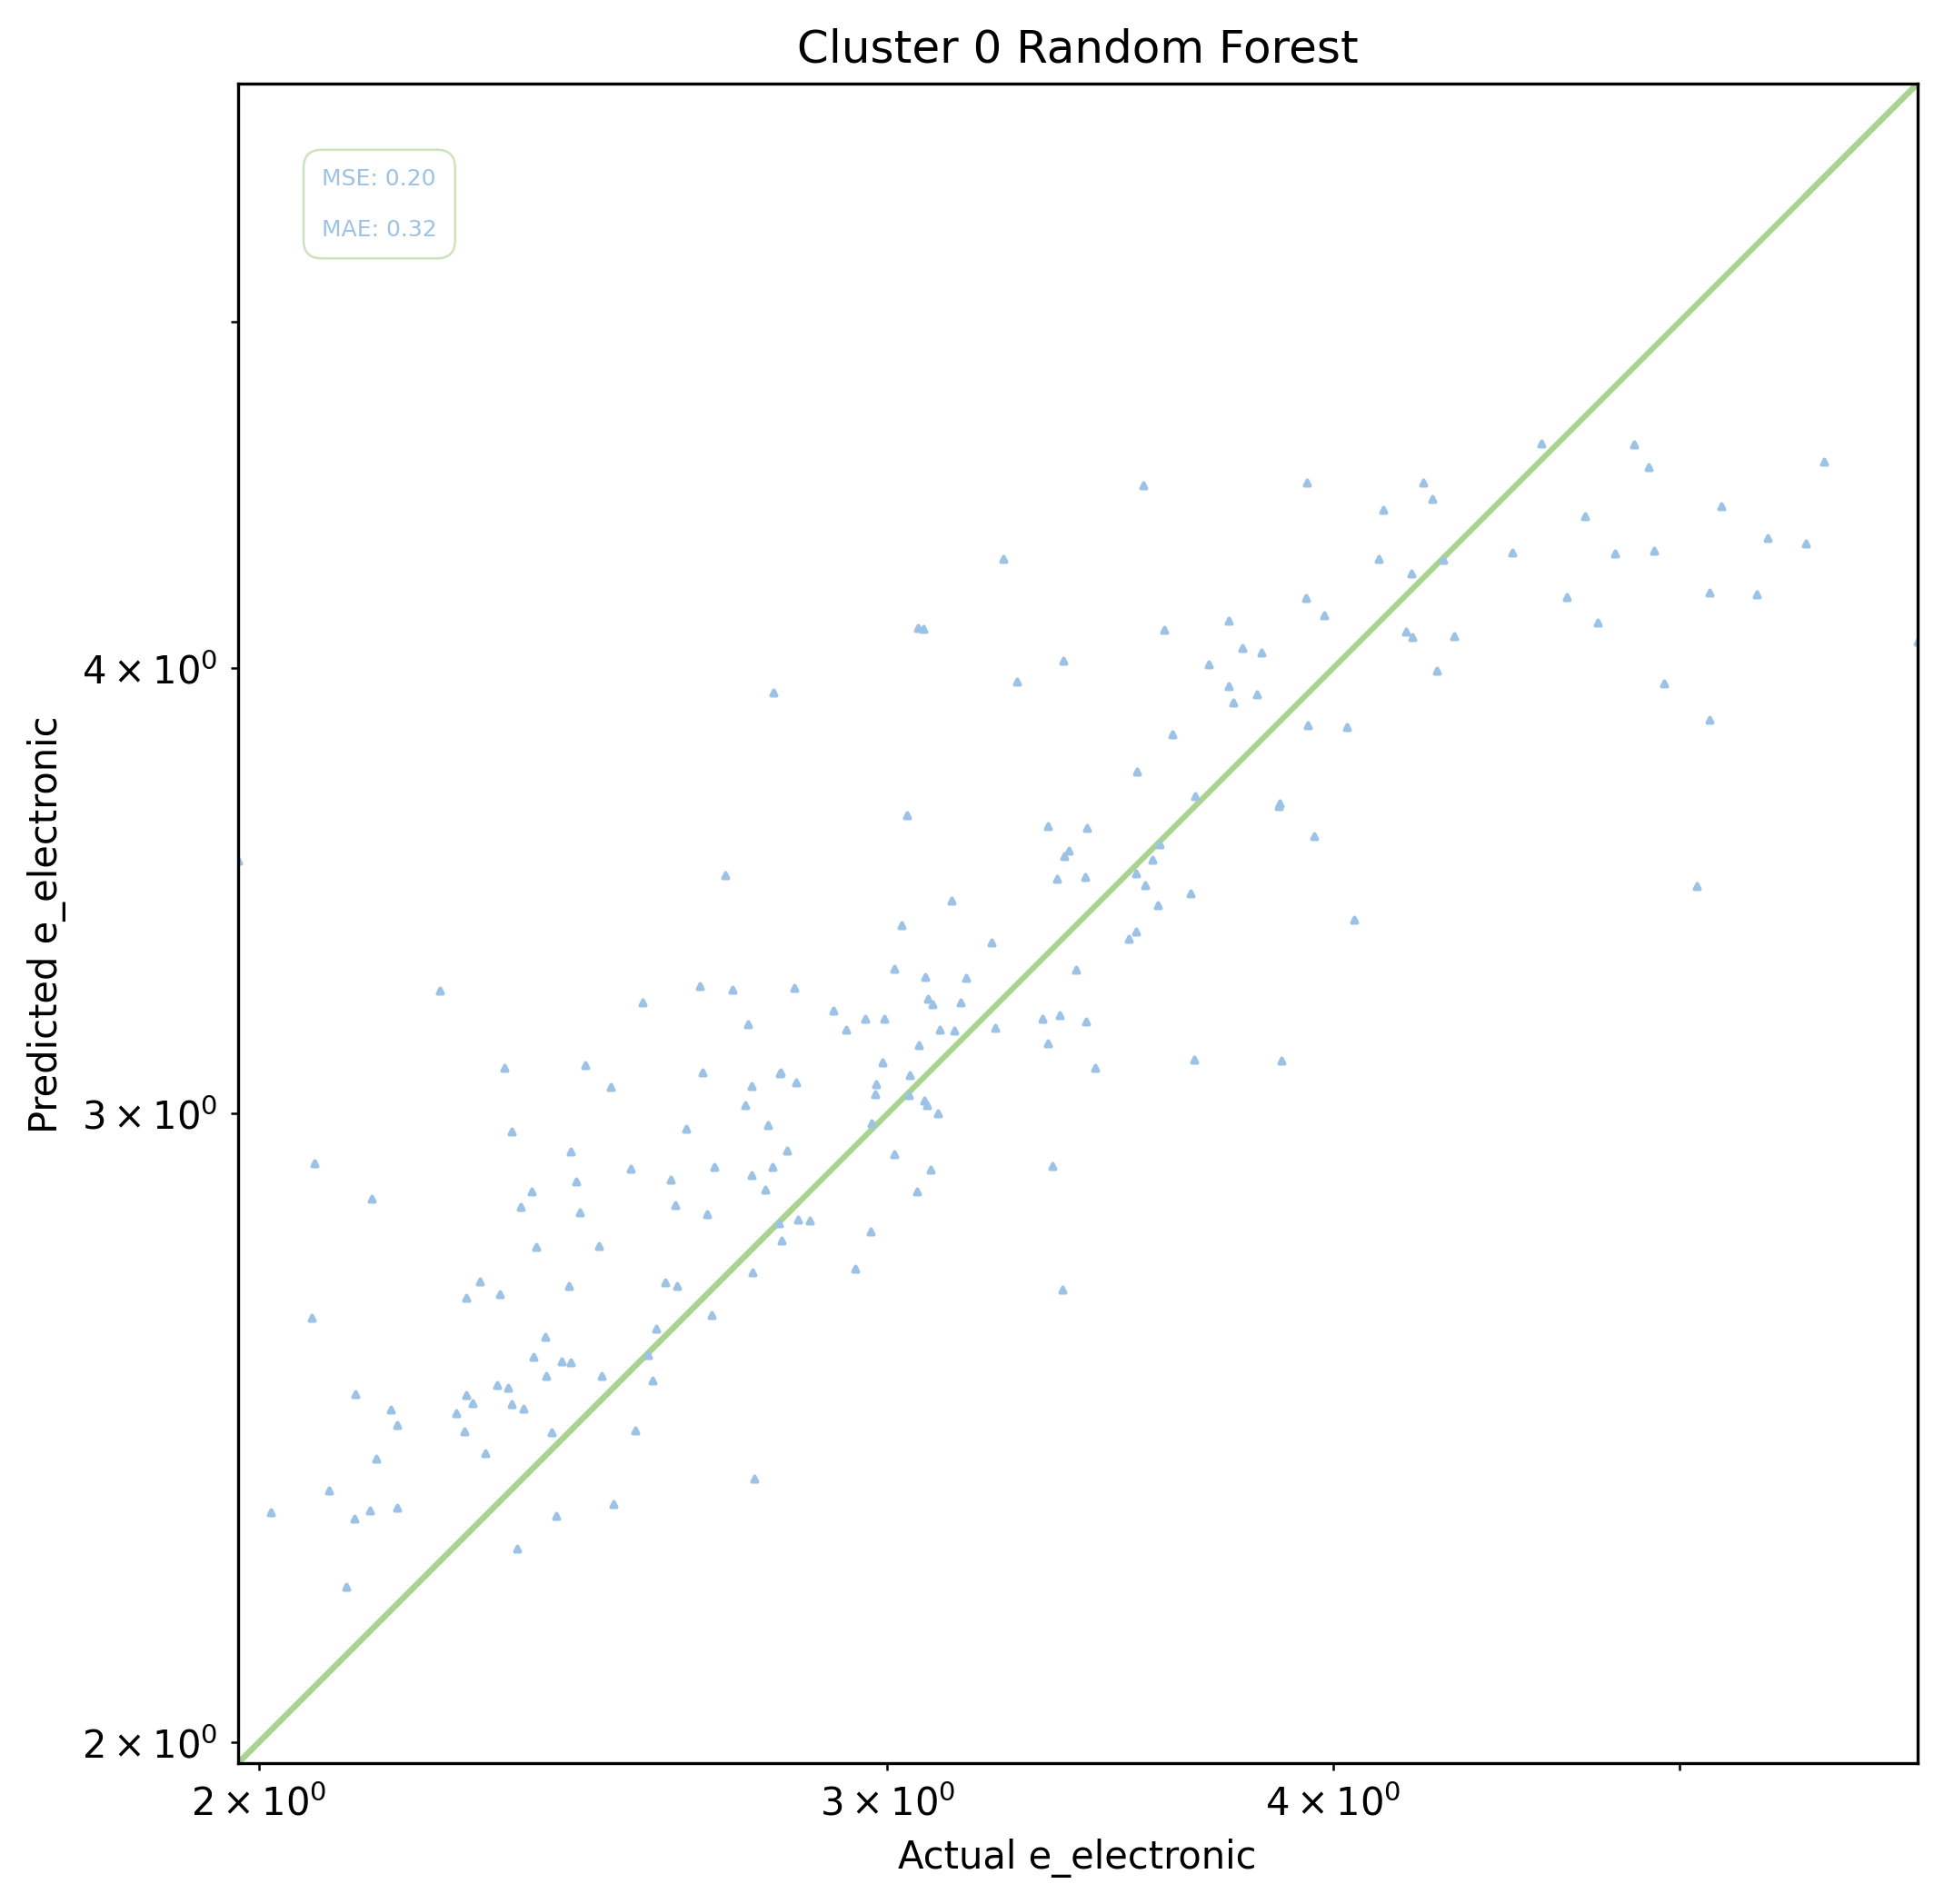

MSE: 0.03177691975244136, MAE: 0.12363361425406737


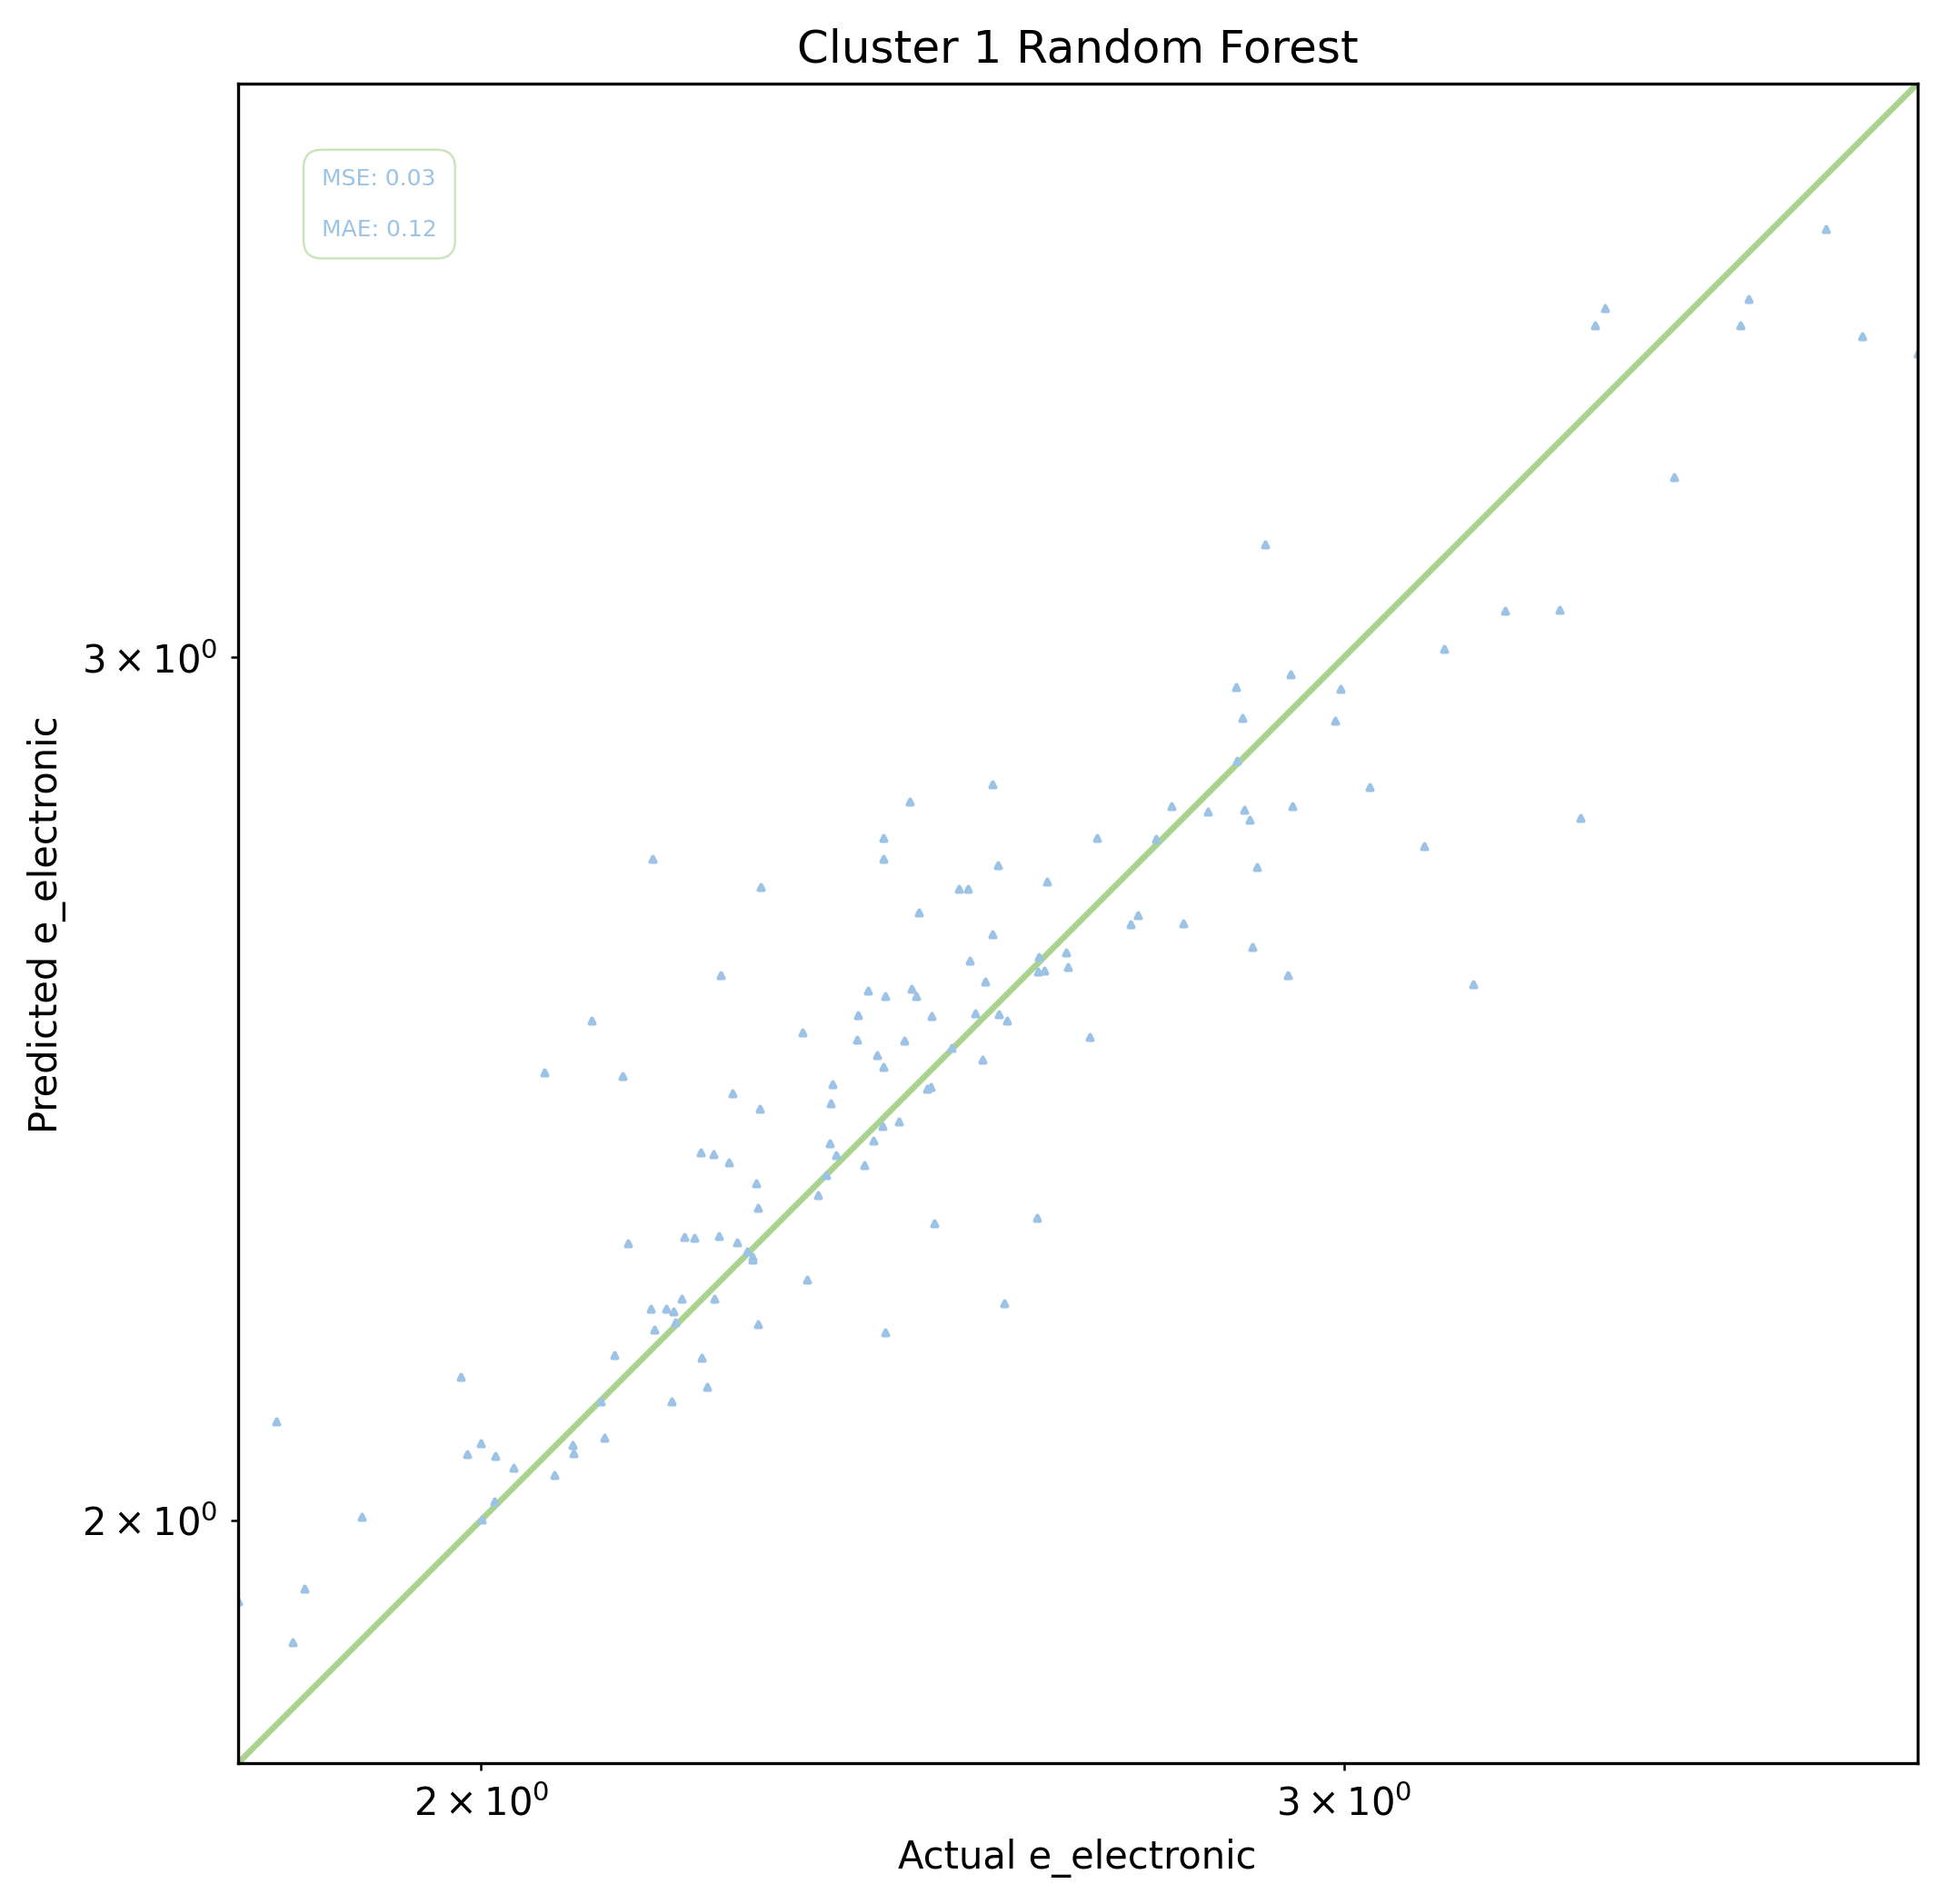

MSE: 0.5659047007515916, MAE: 0.47406518831913286


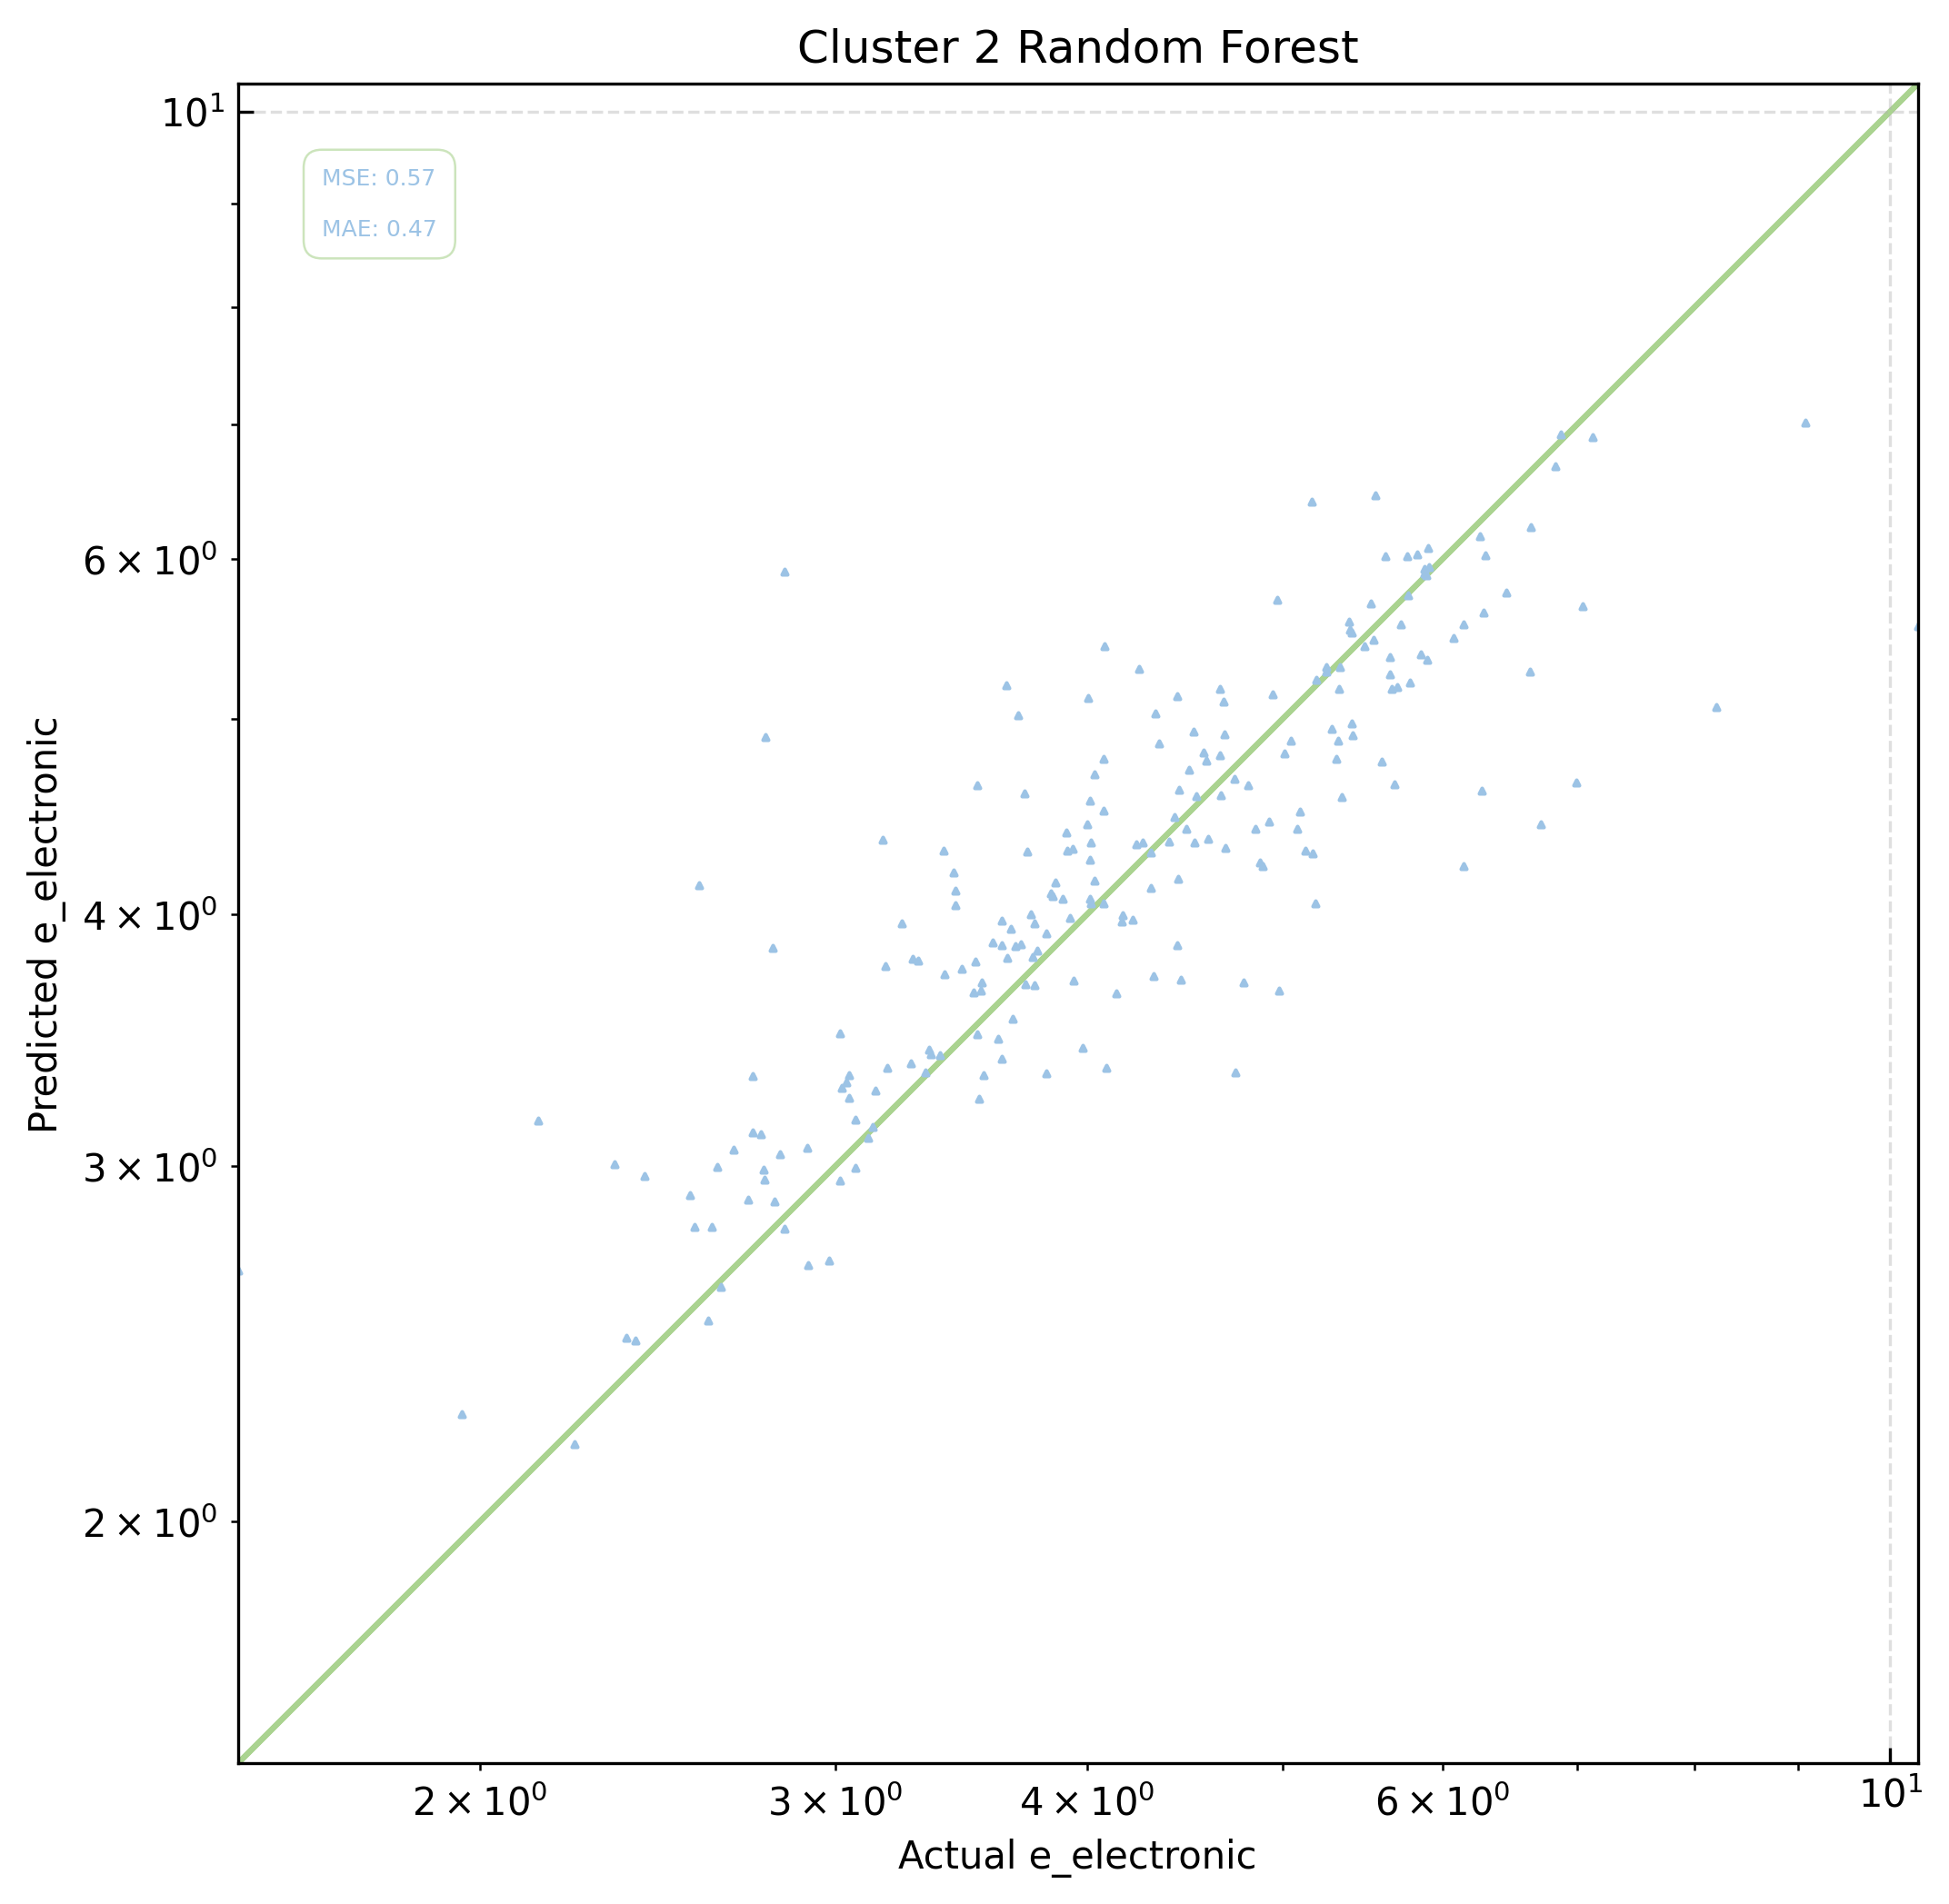

MSE: 70.93475251703059, MAE: 0.9755049911128517


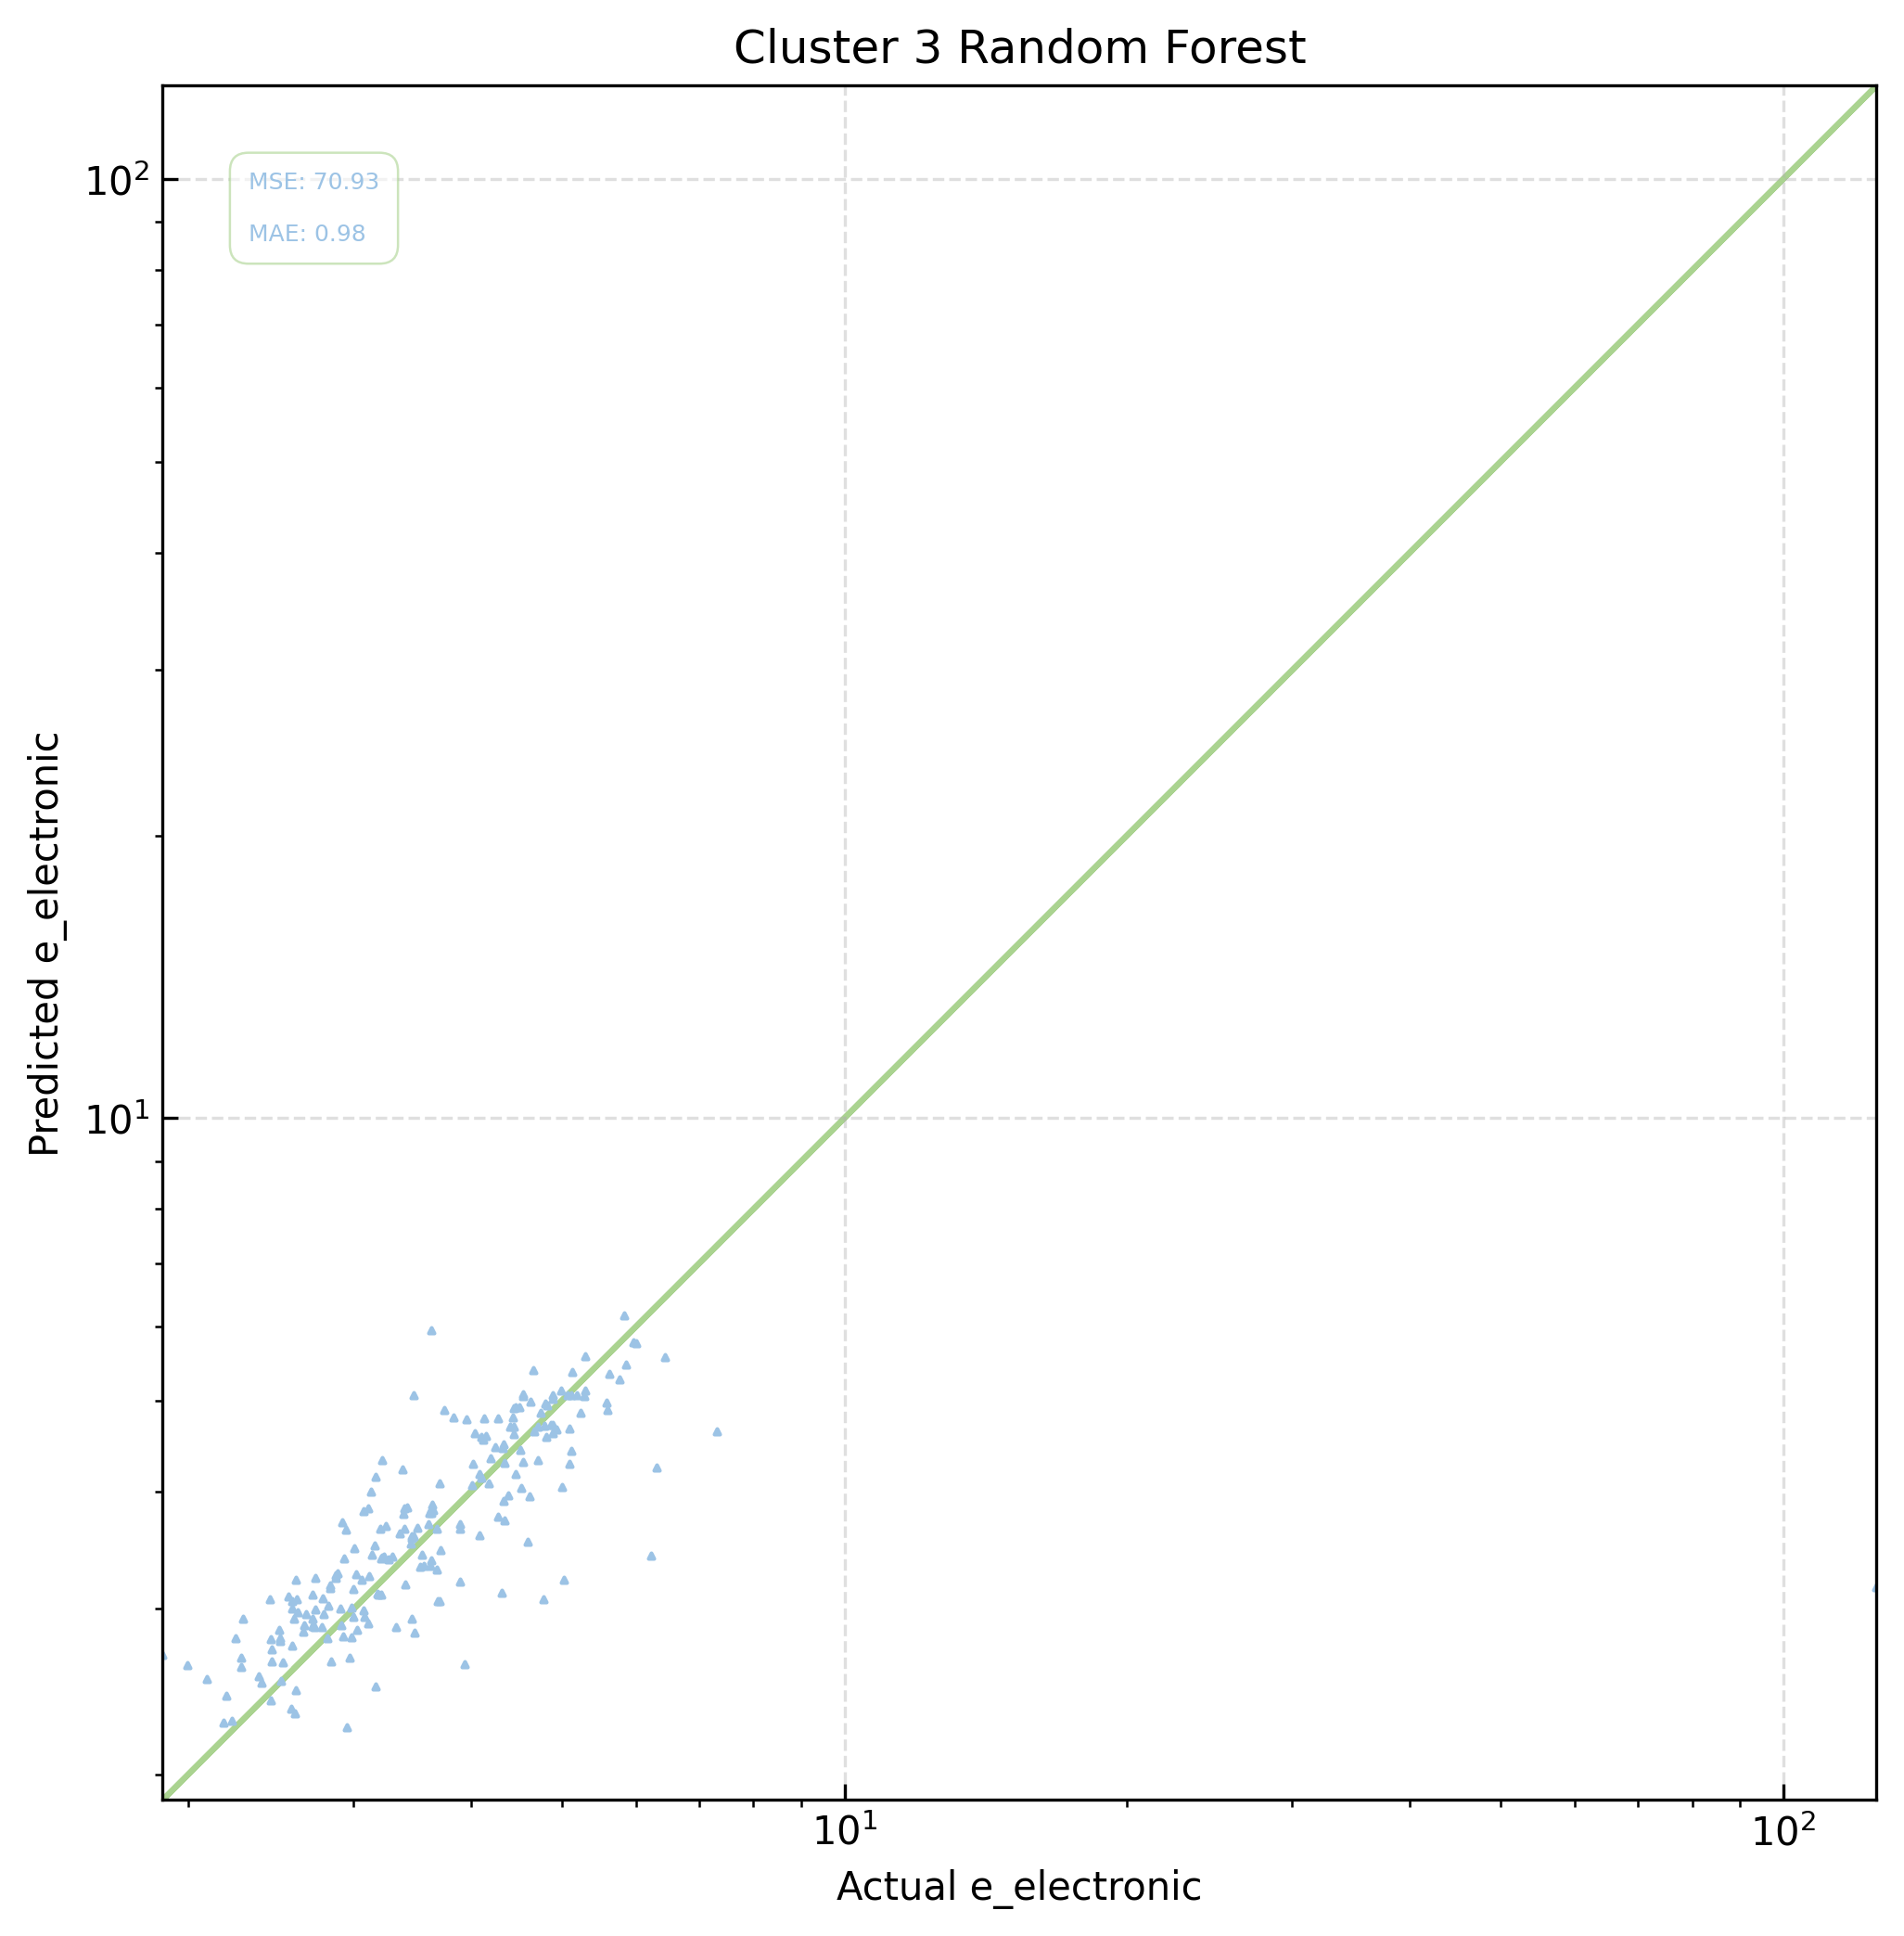

MSE: 0.6761433204609952, MAE: 0.6017415522680117


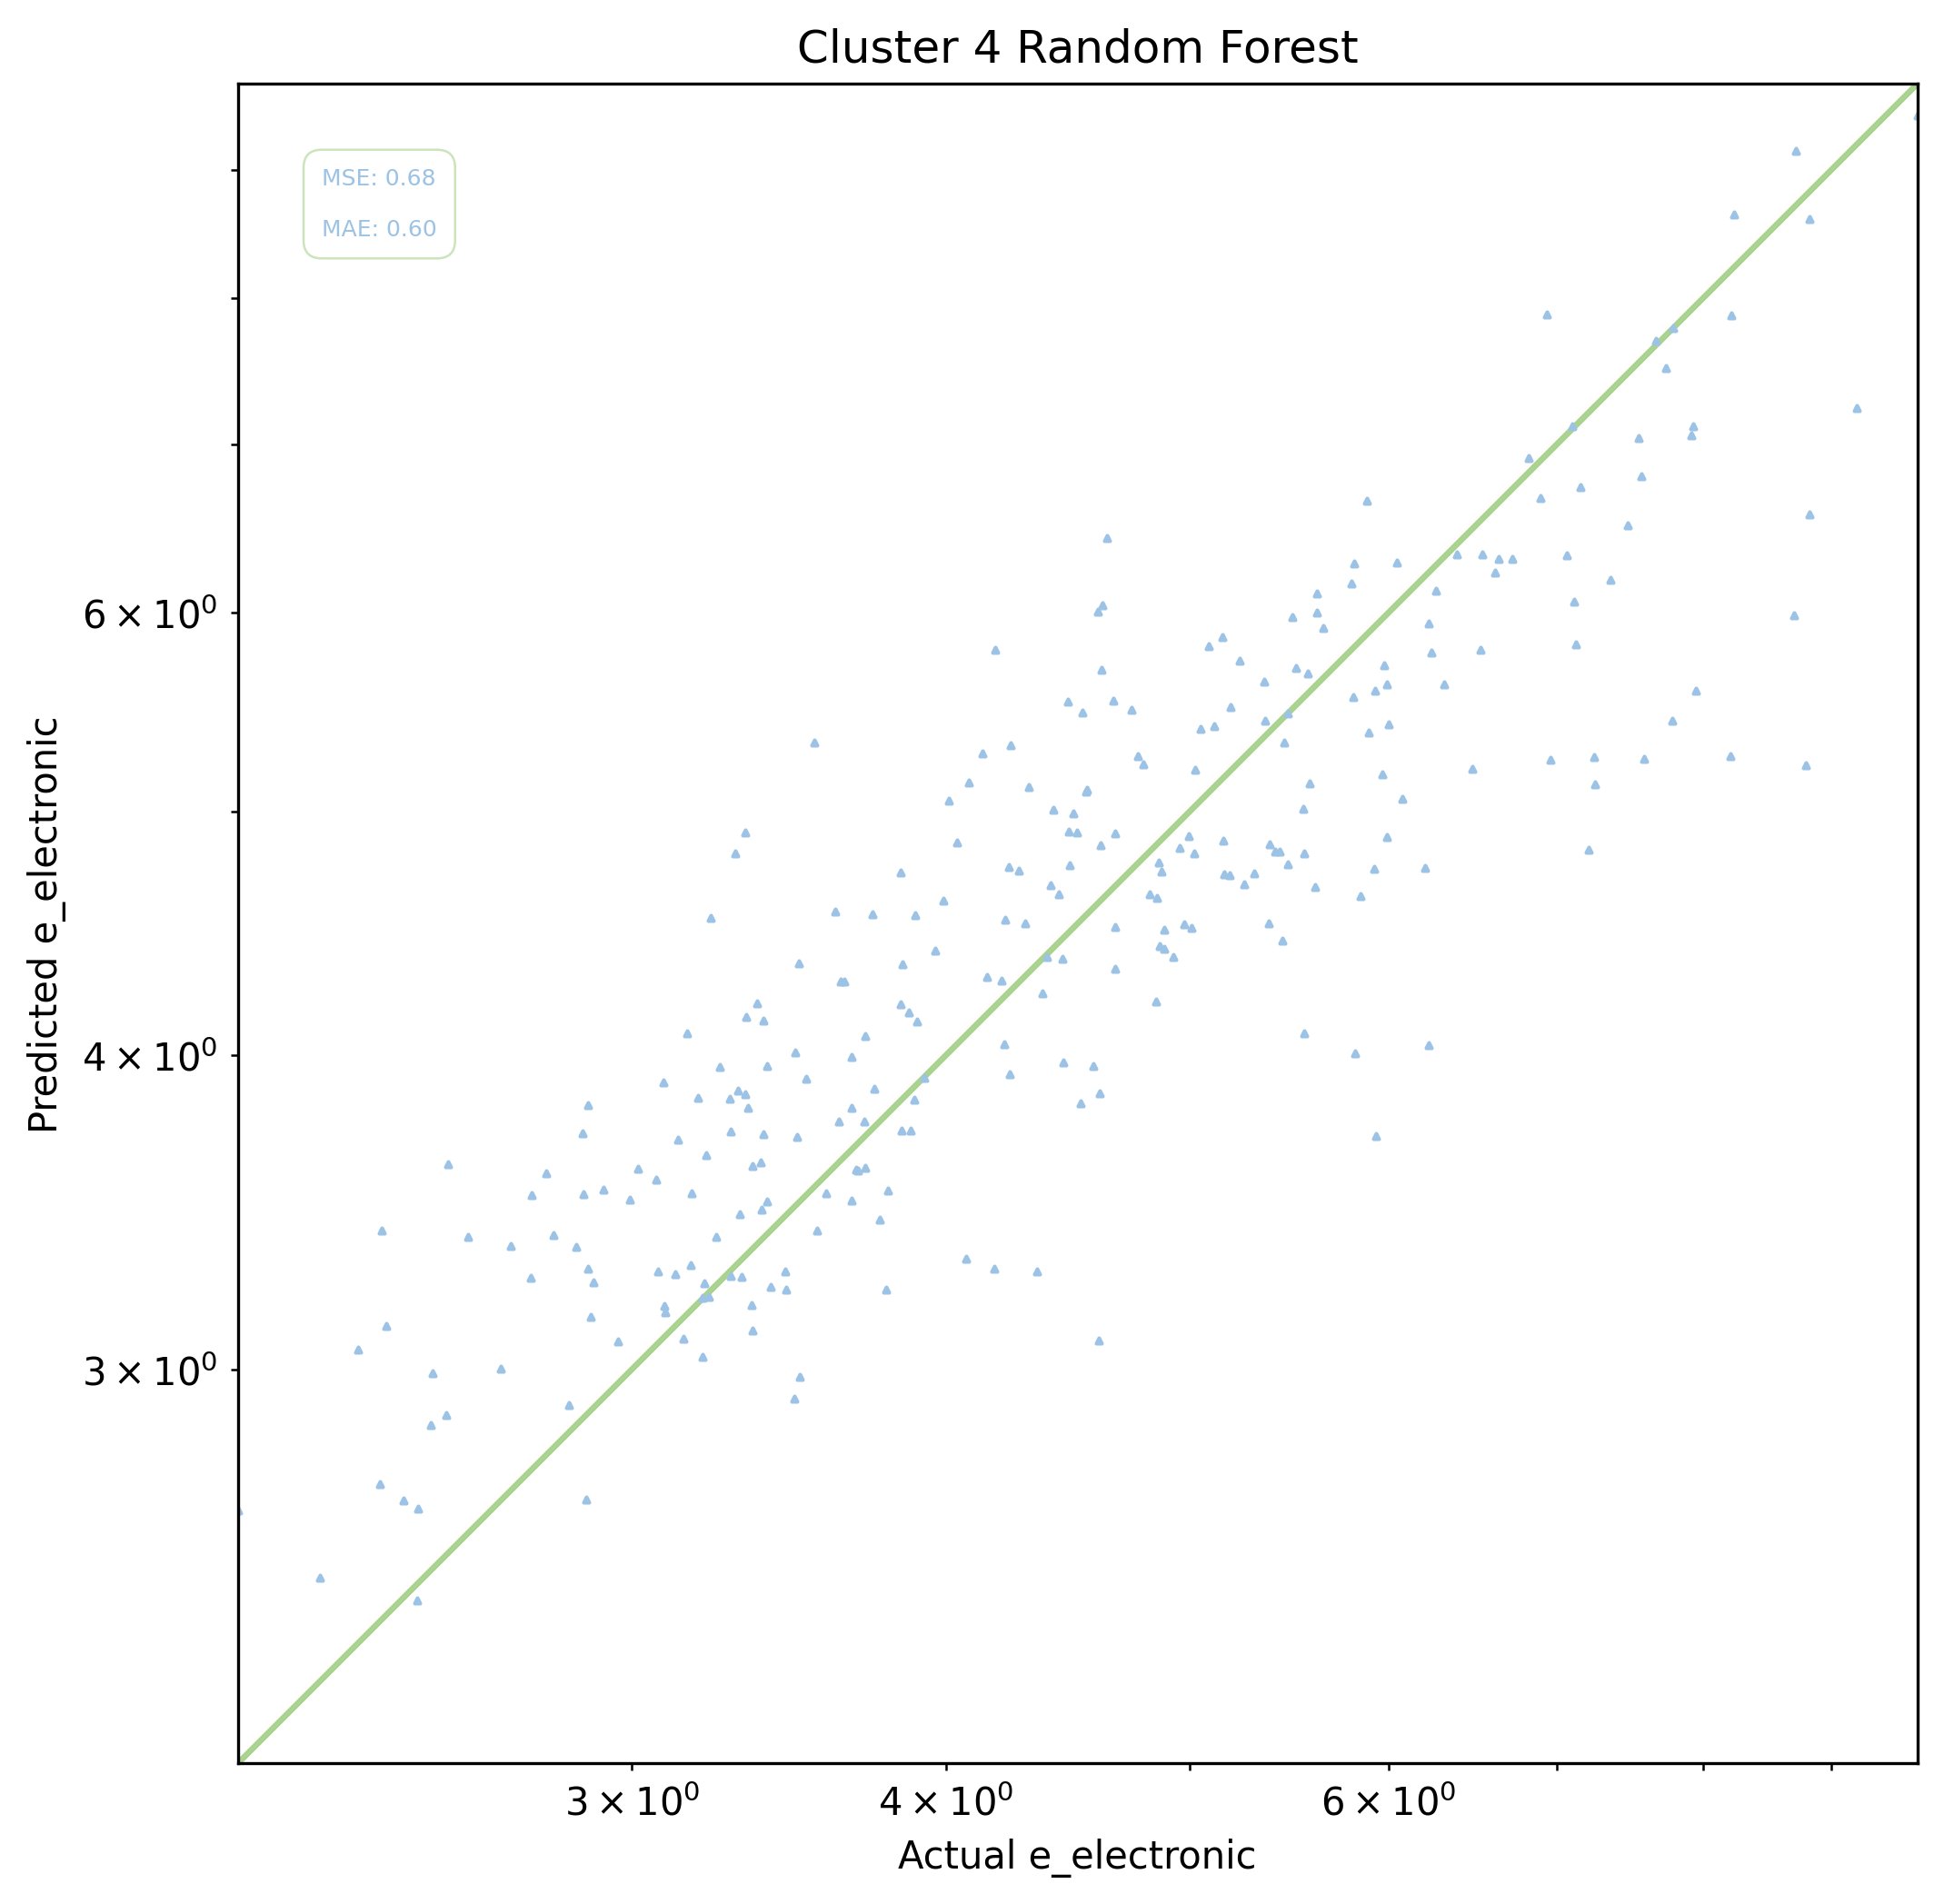

MSE: 0.025609864385241616, MAE: 0.10997401270478357


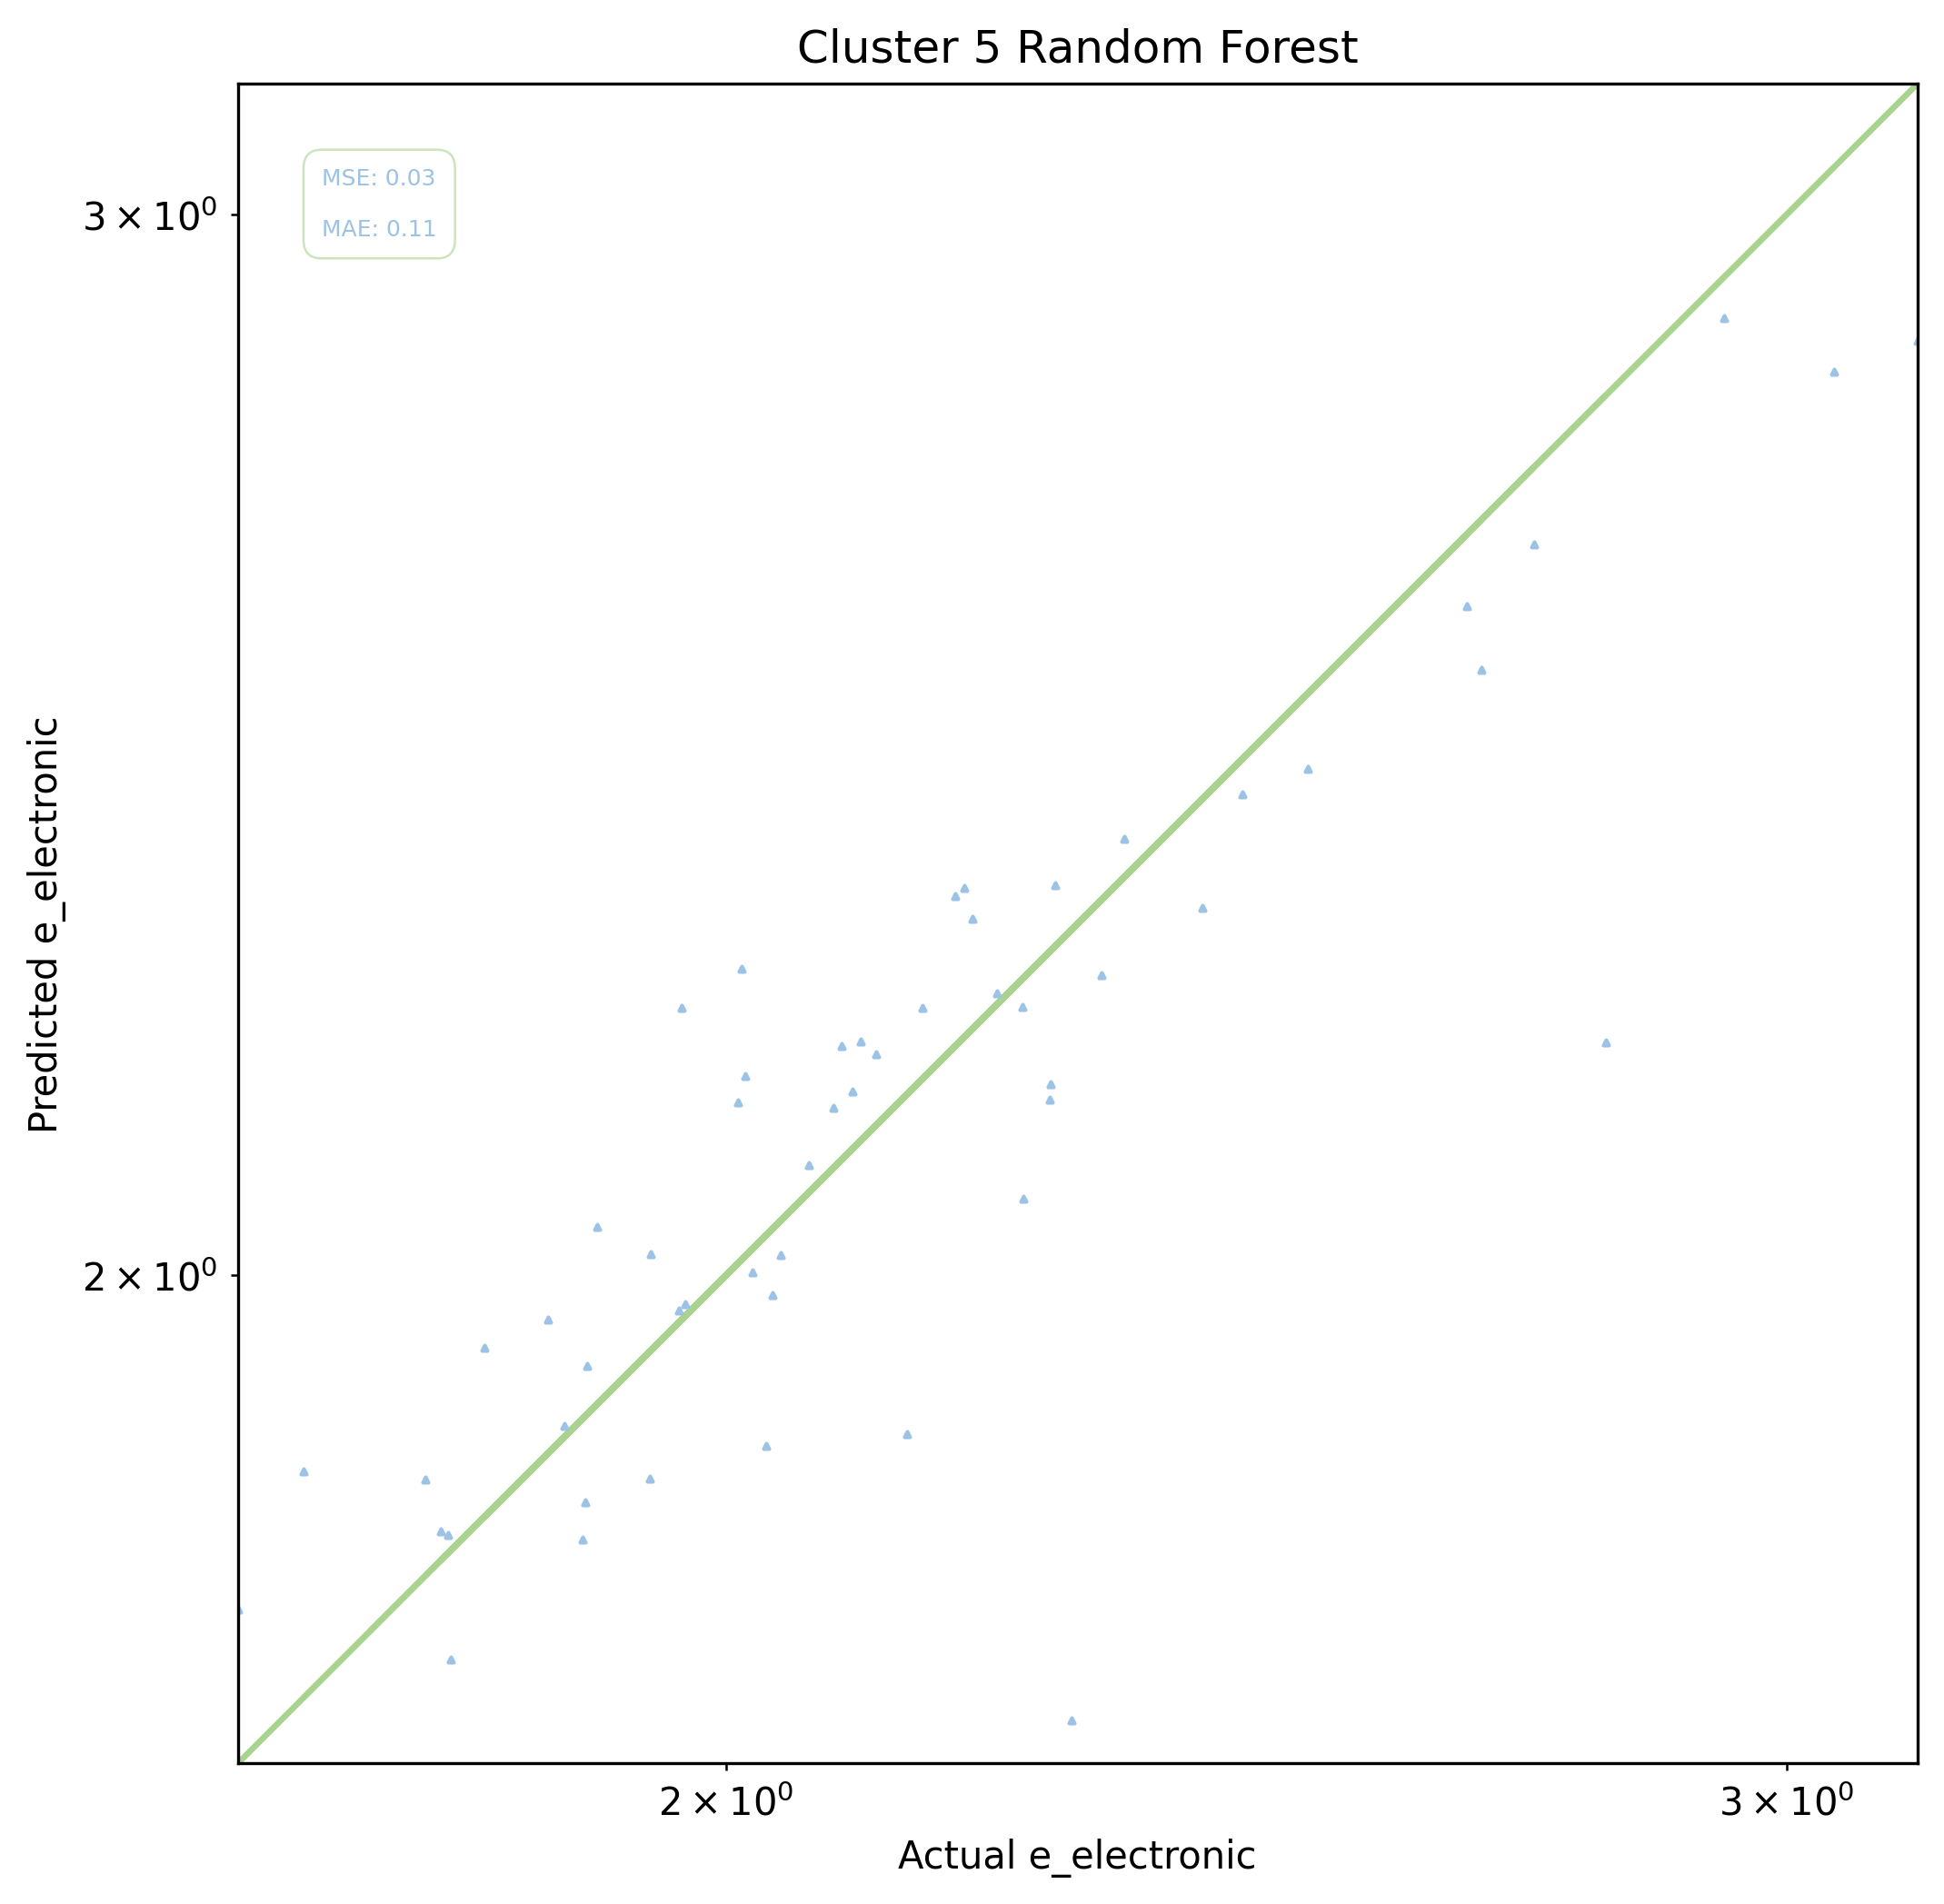

MSE: 584.6836479951985, MAE: 9.61152665254935


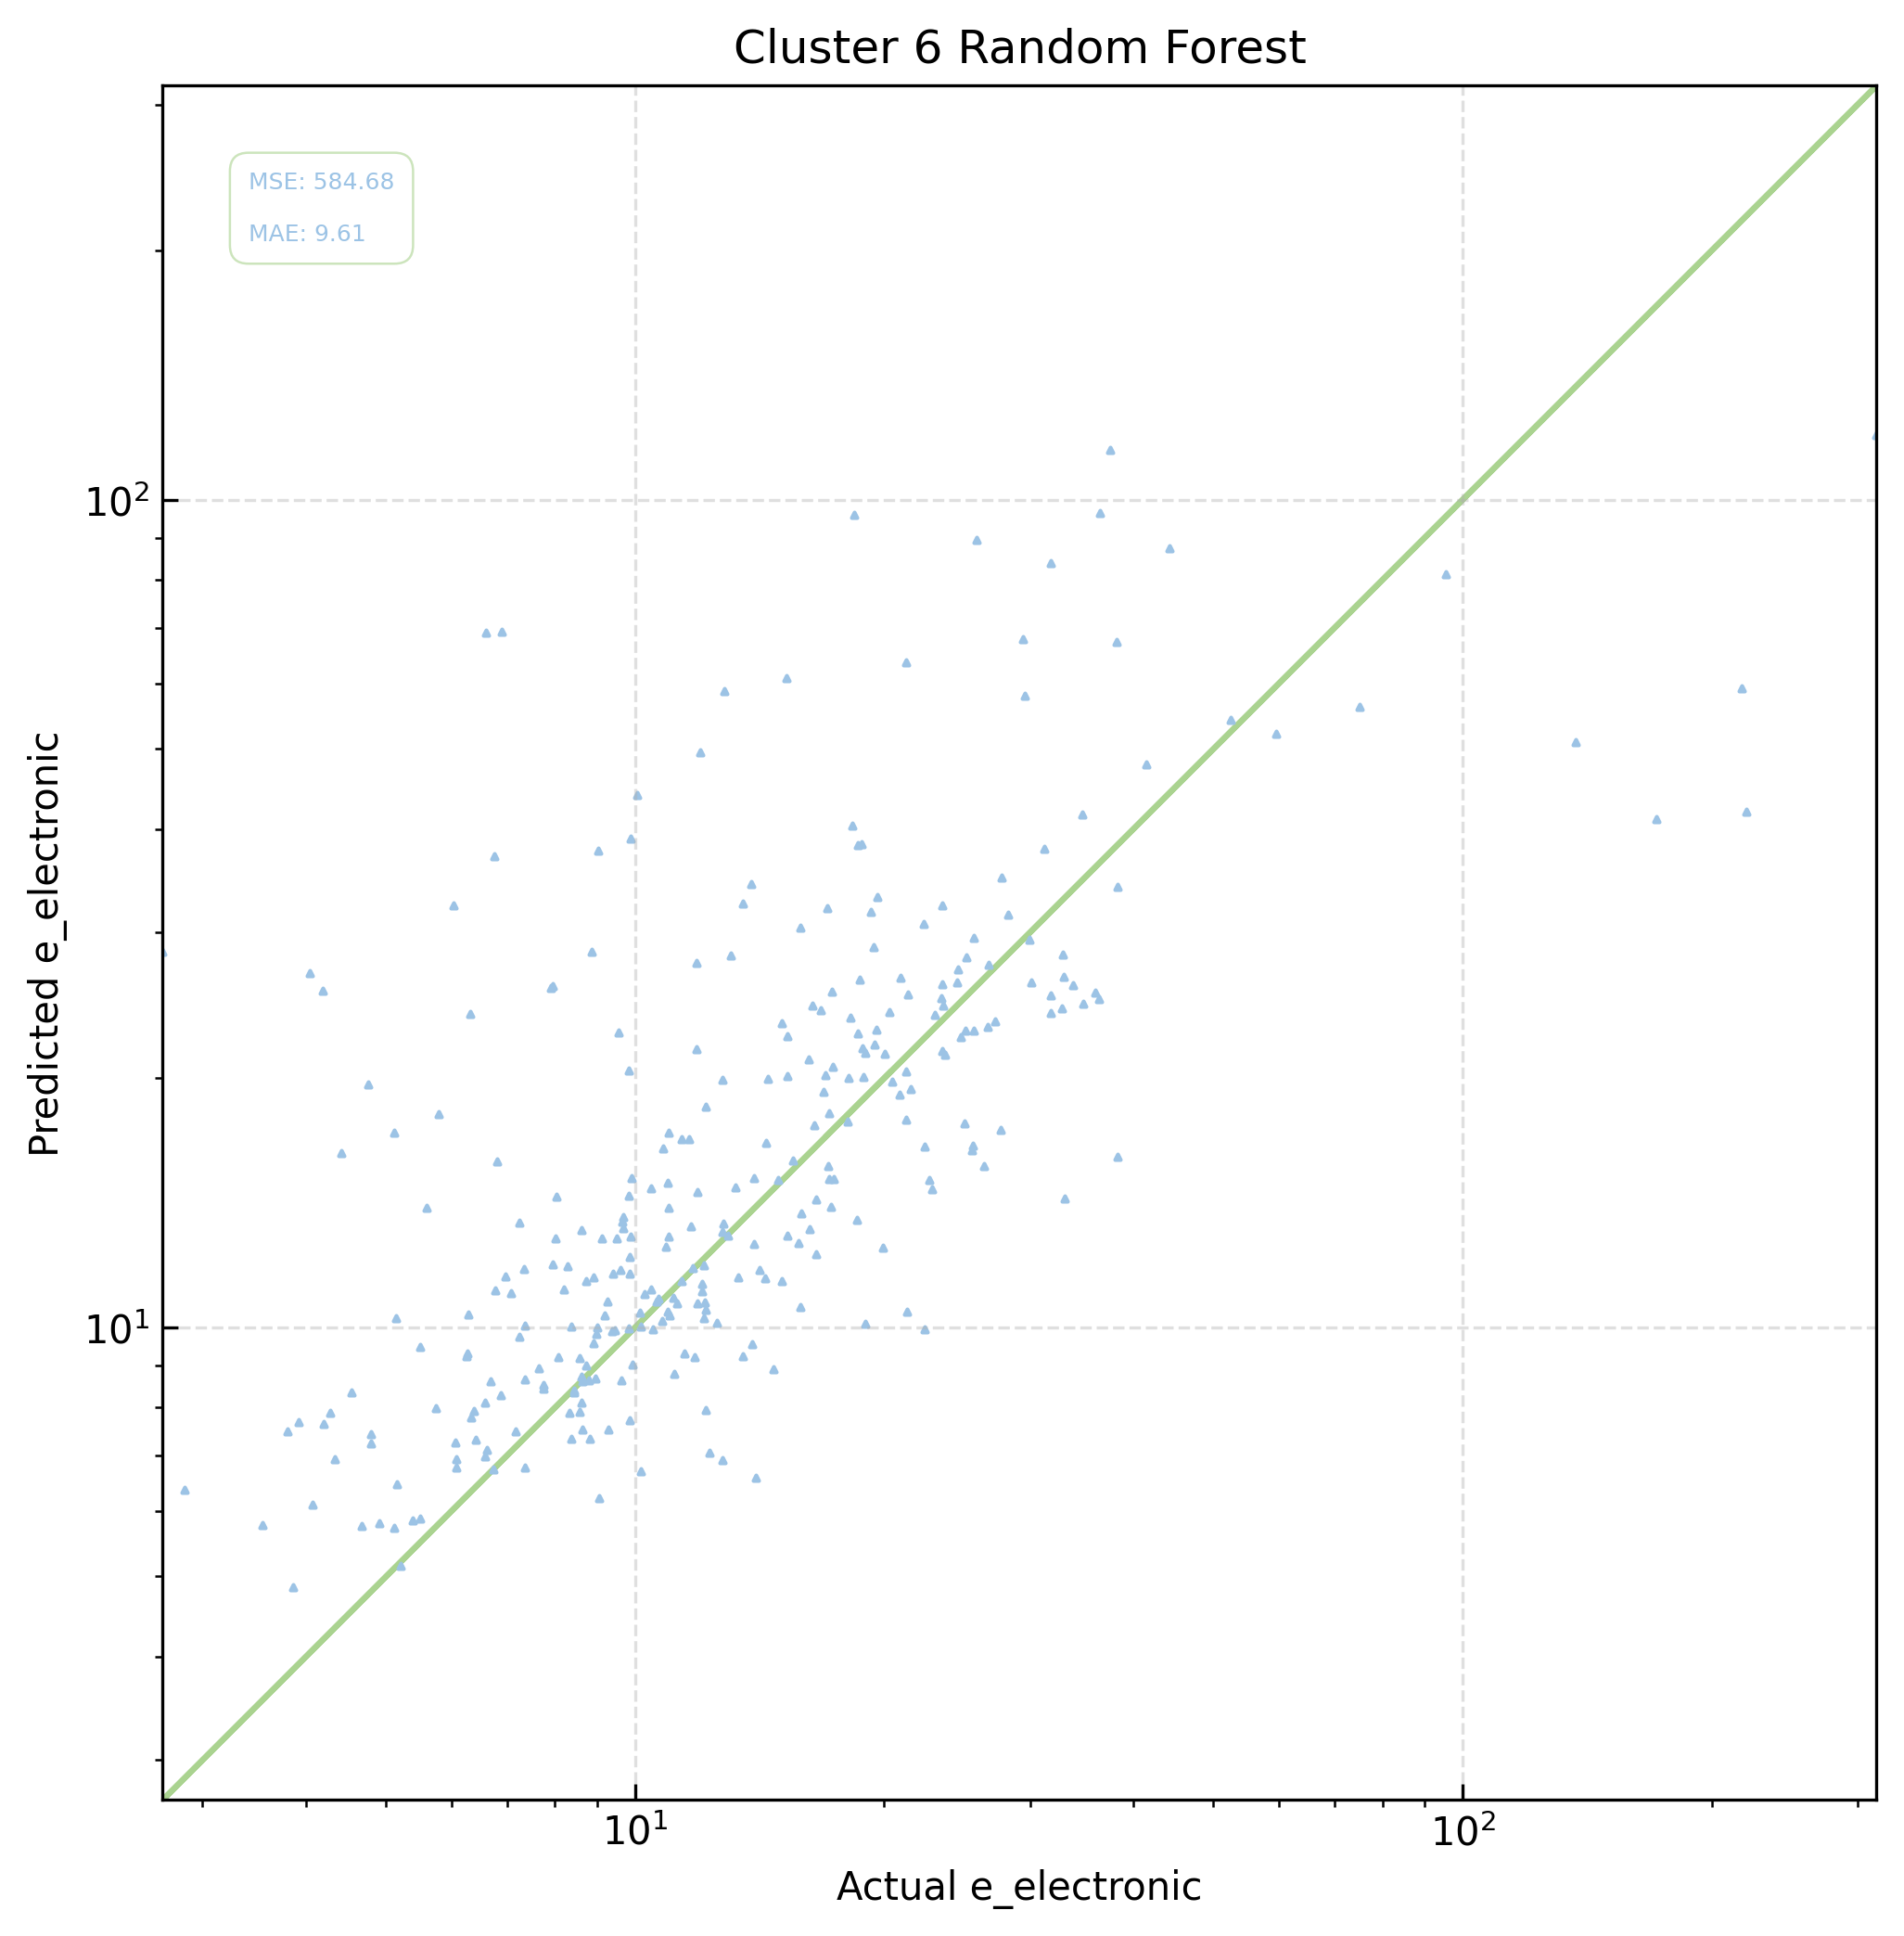

MSE: 0.06305724651061079, MAE: 0.16592984519335324


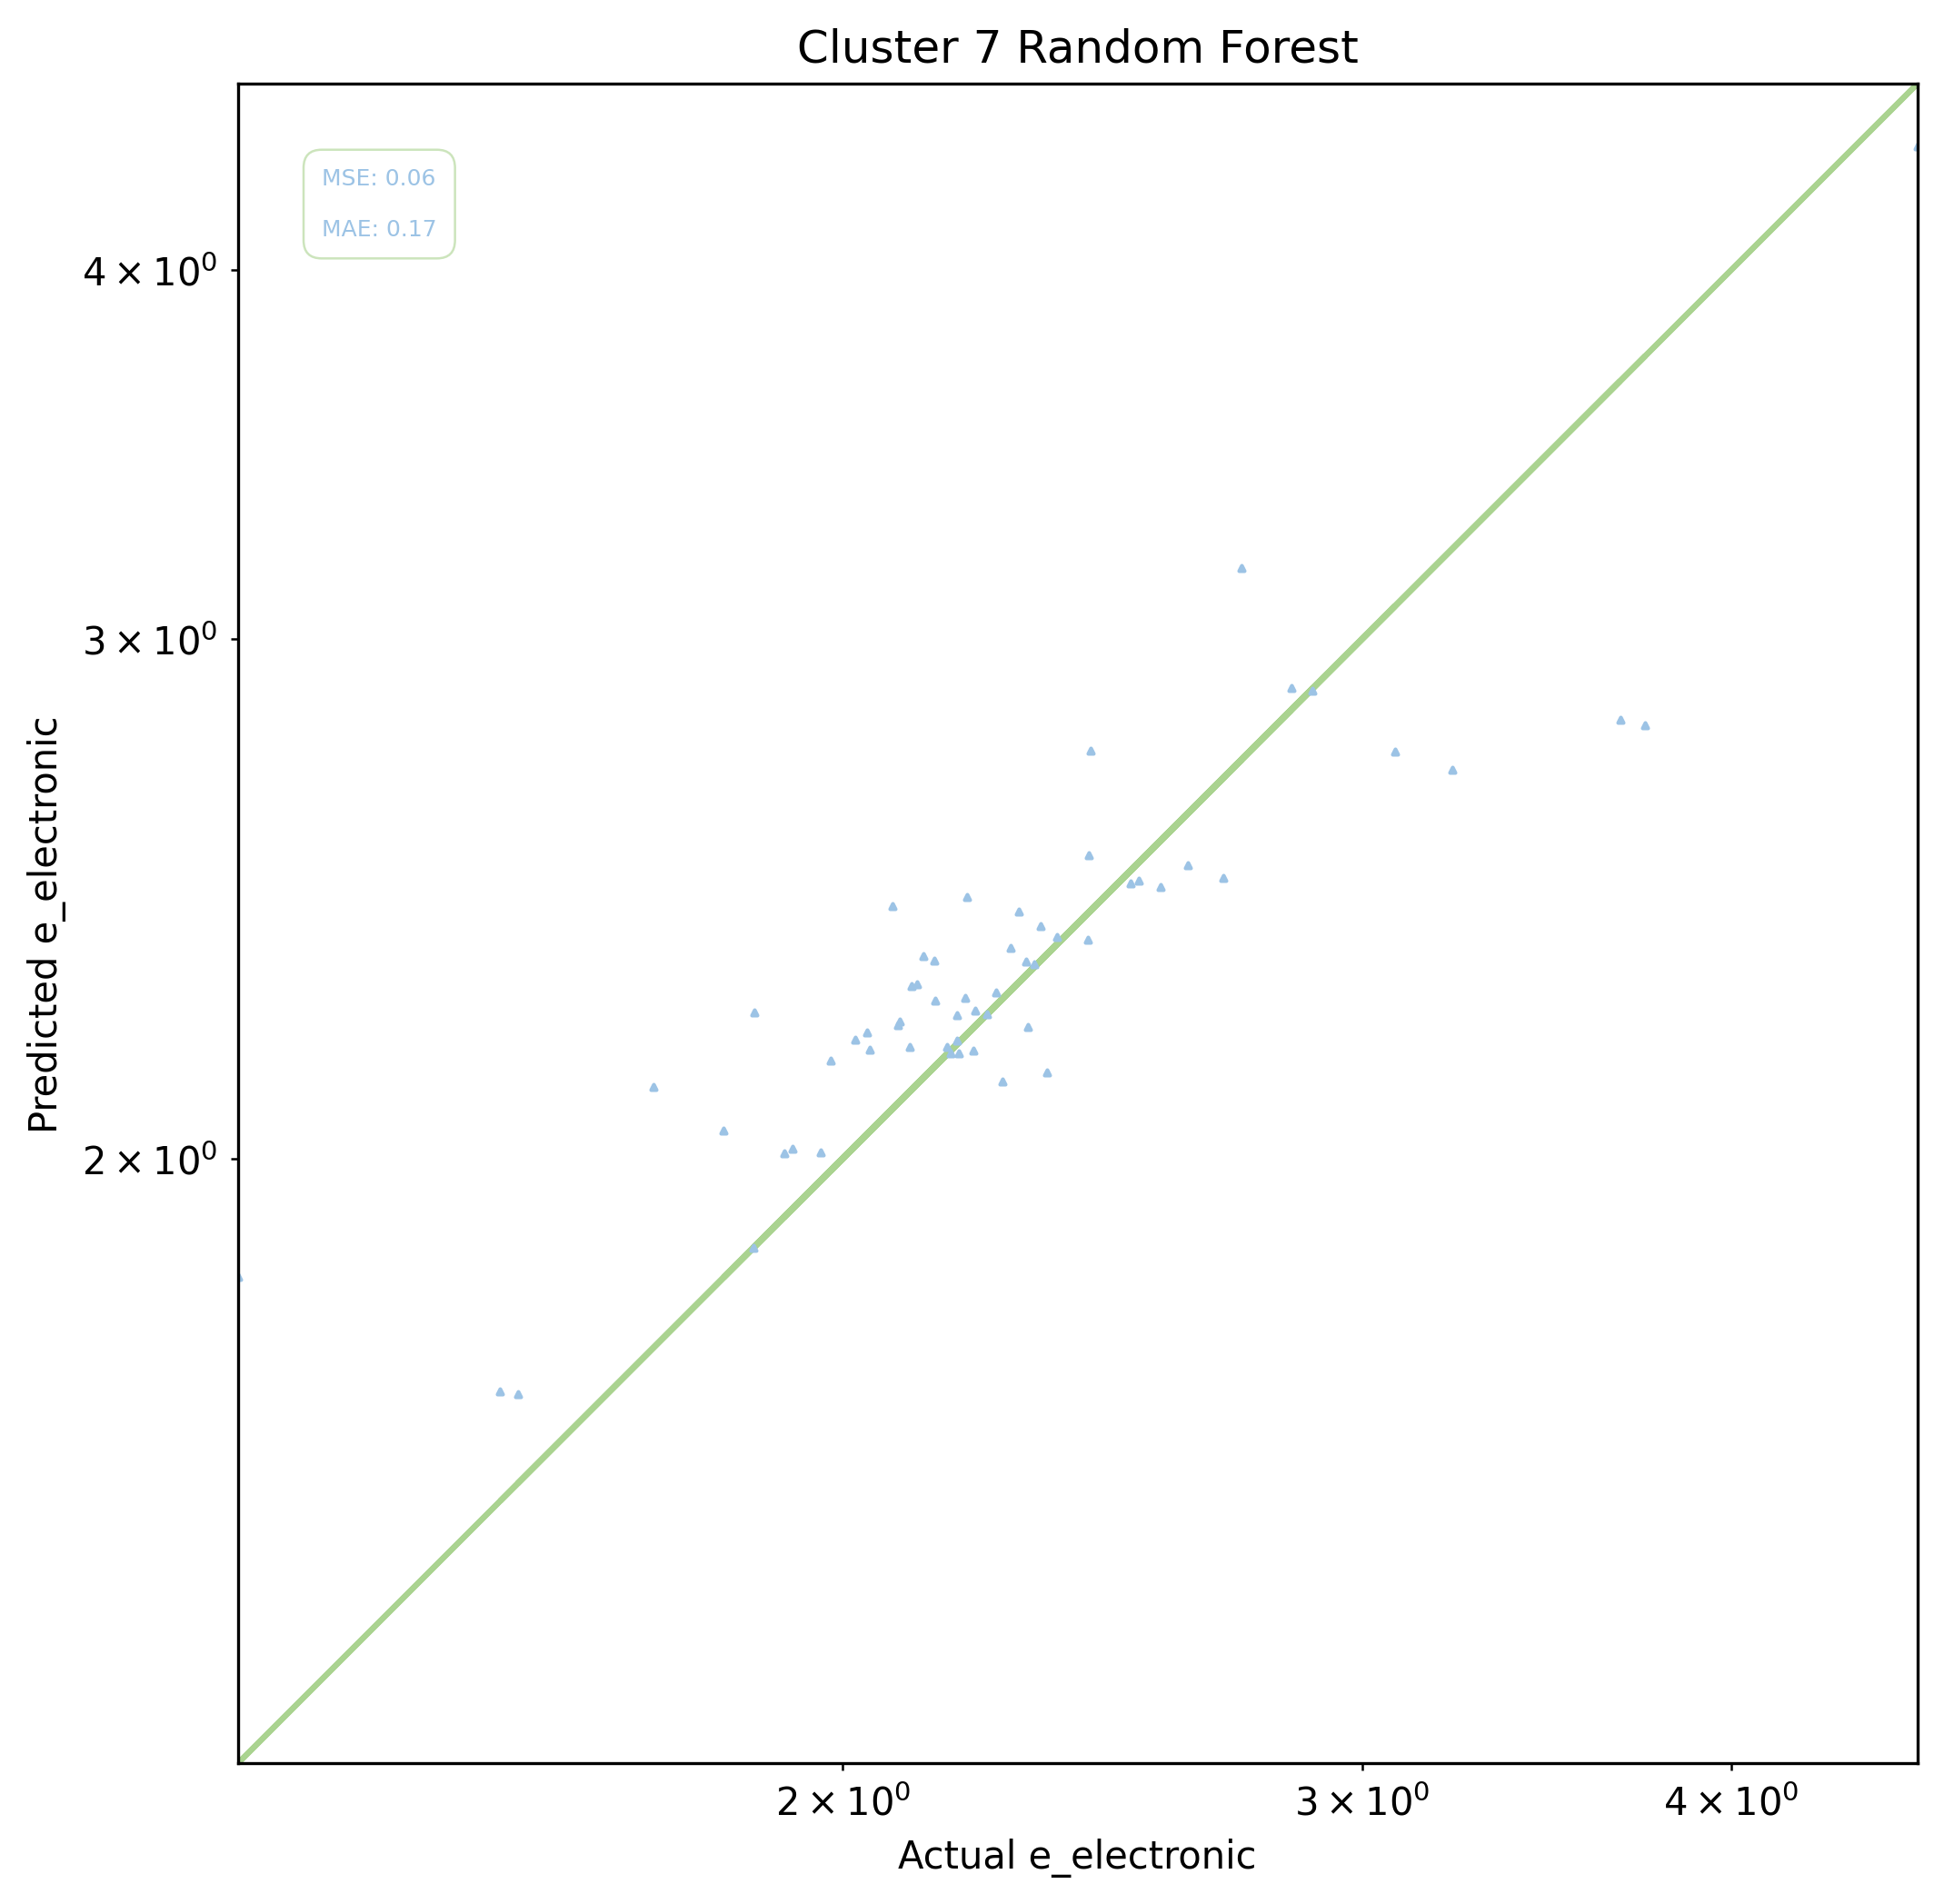

MSE: 0.10445780383255943, MAE: 0.2485015571082706


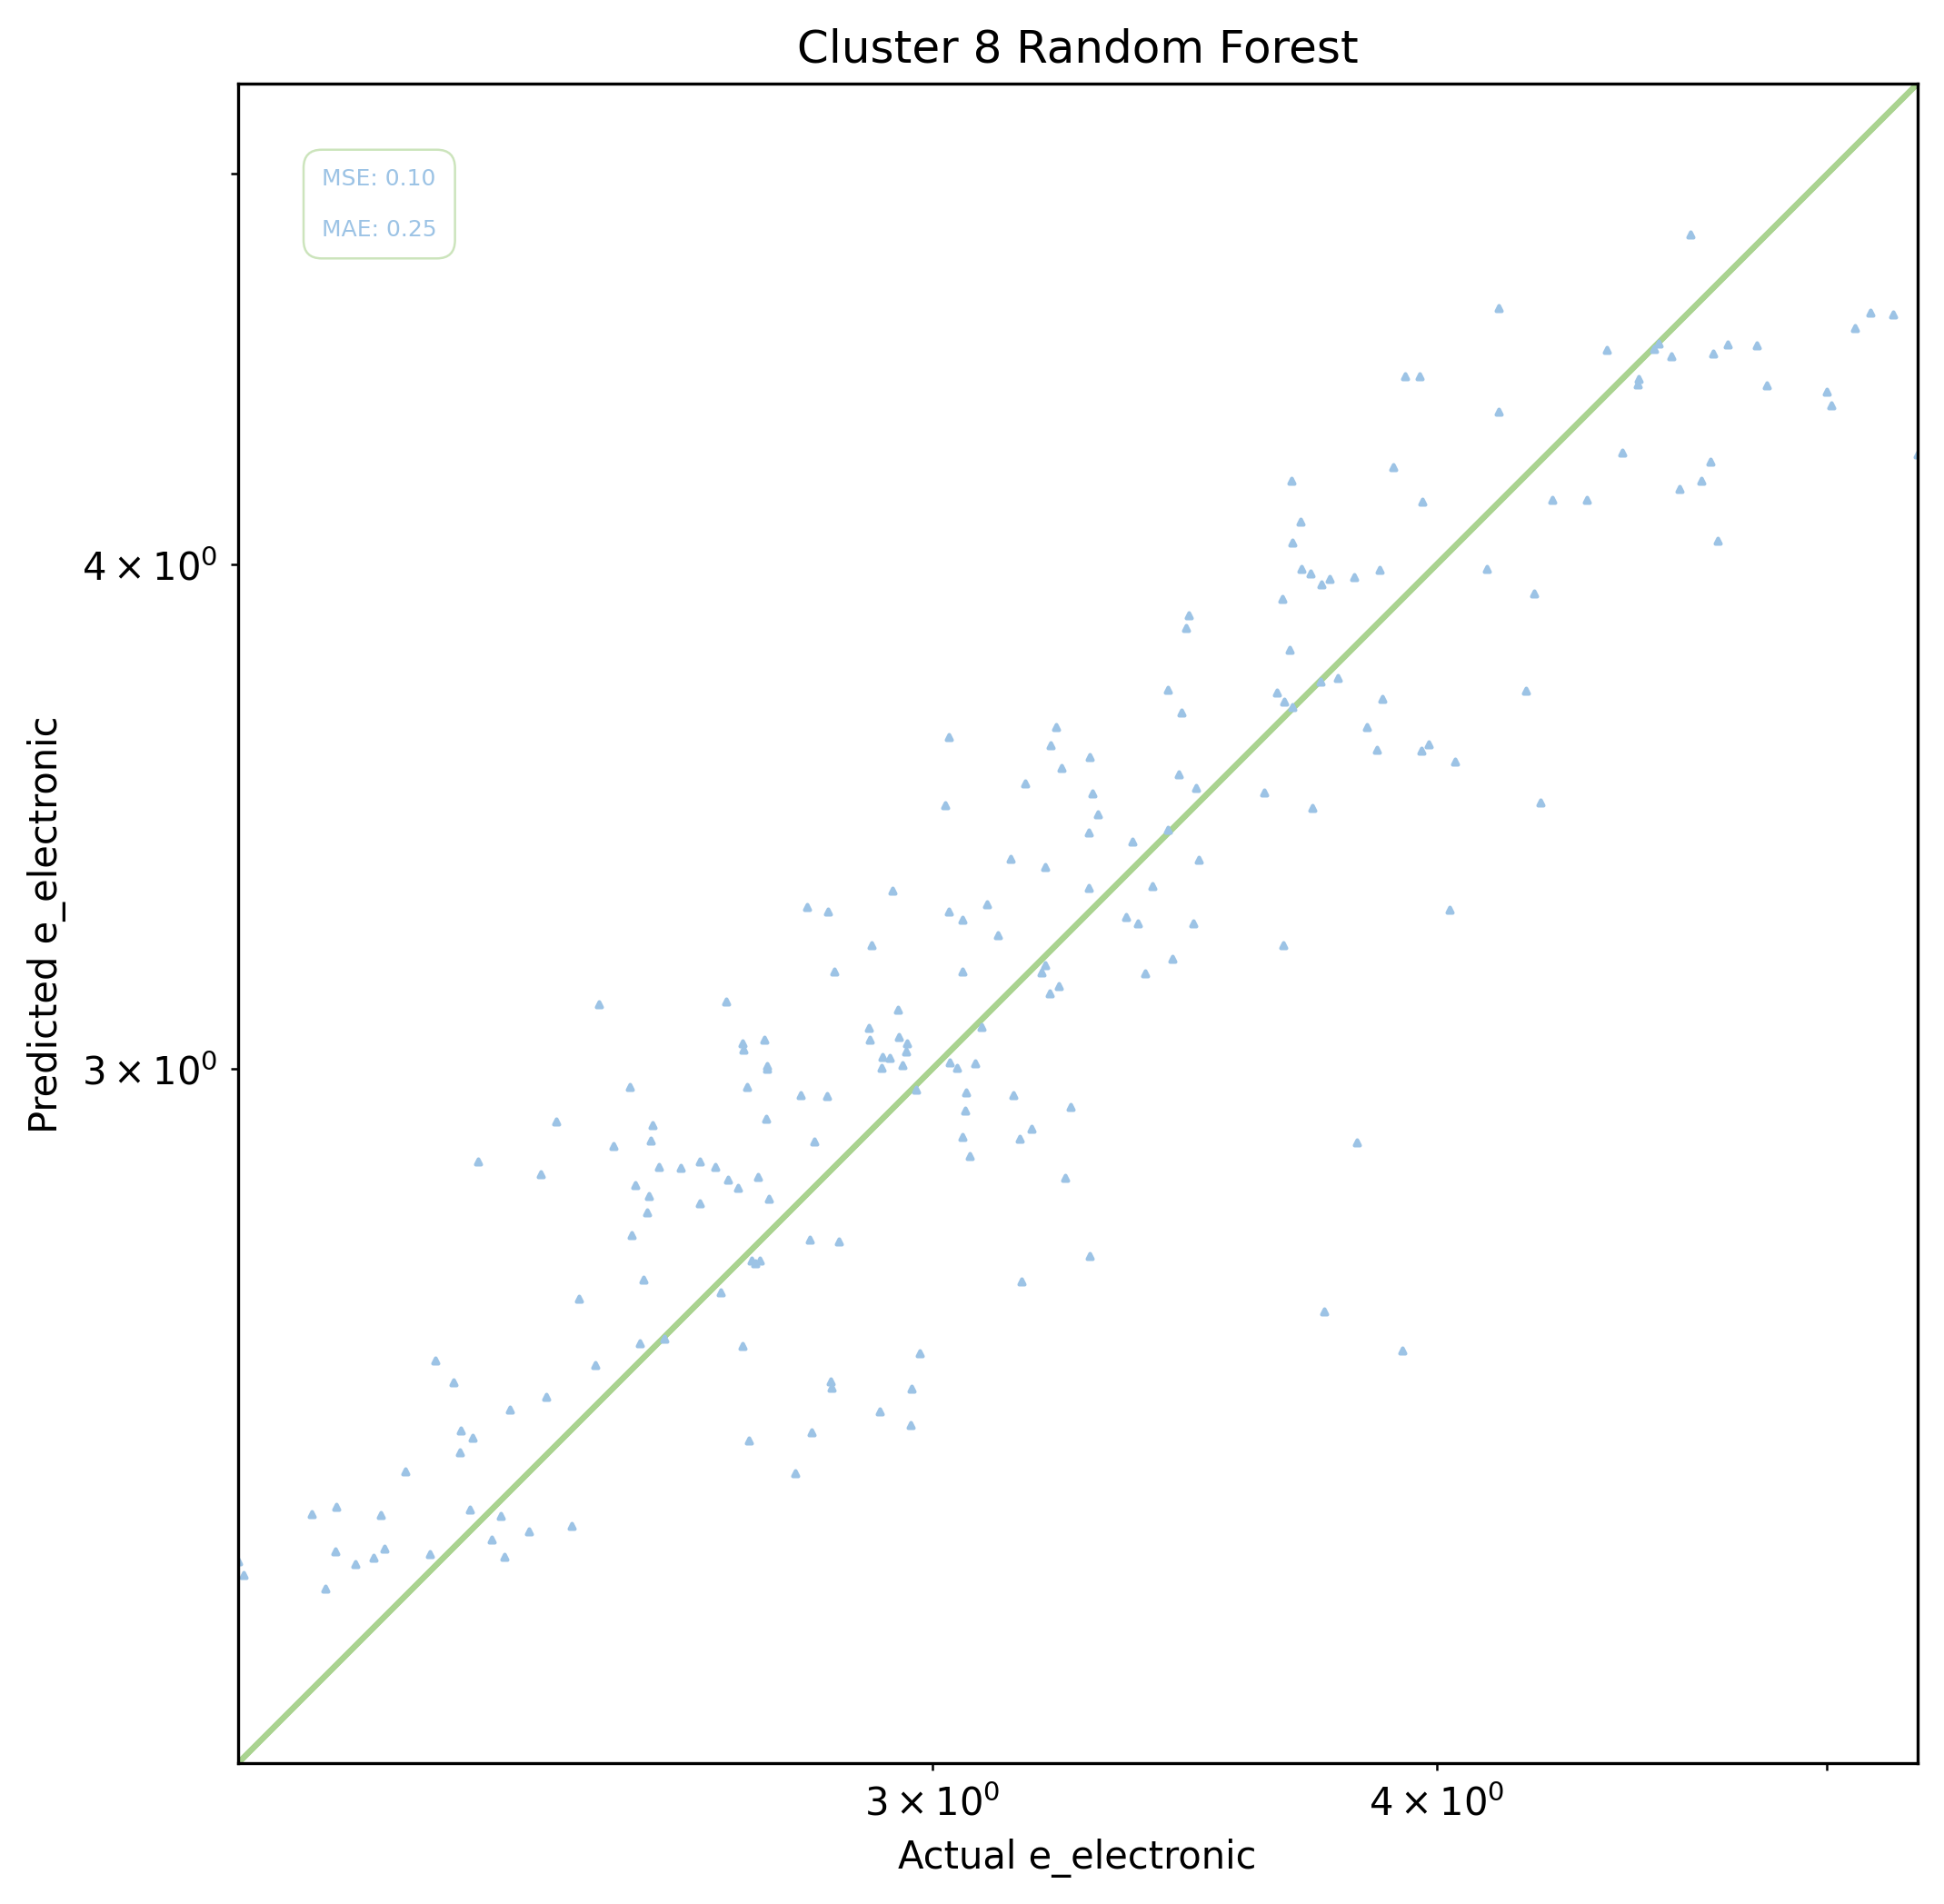

MSE: 36.27618840222262, MAE: 2.4348009137547106


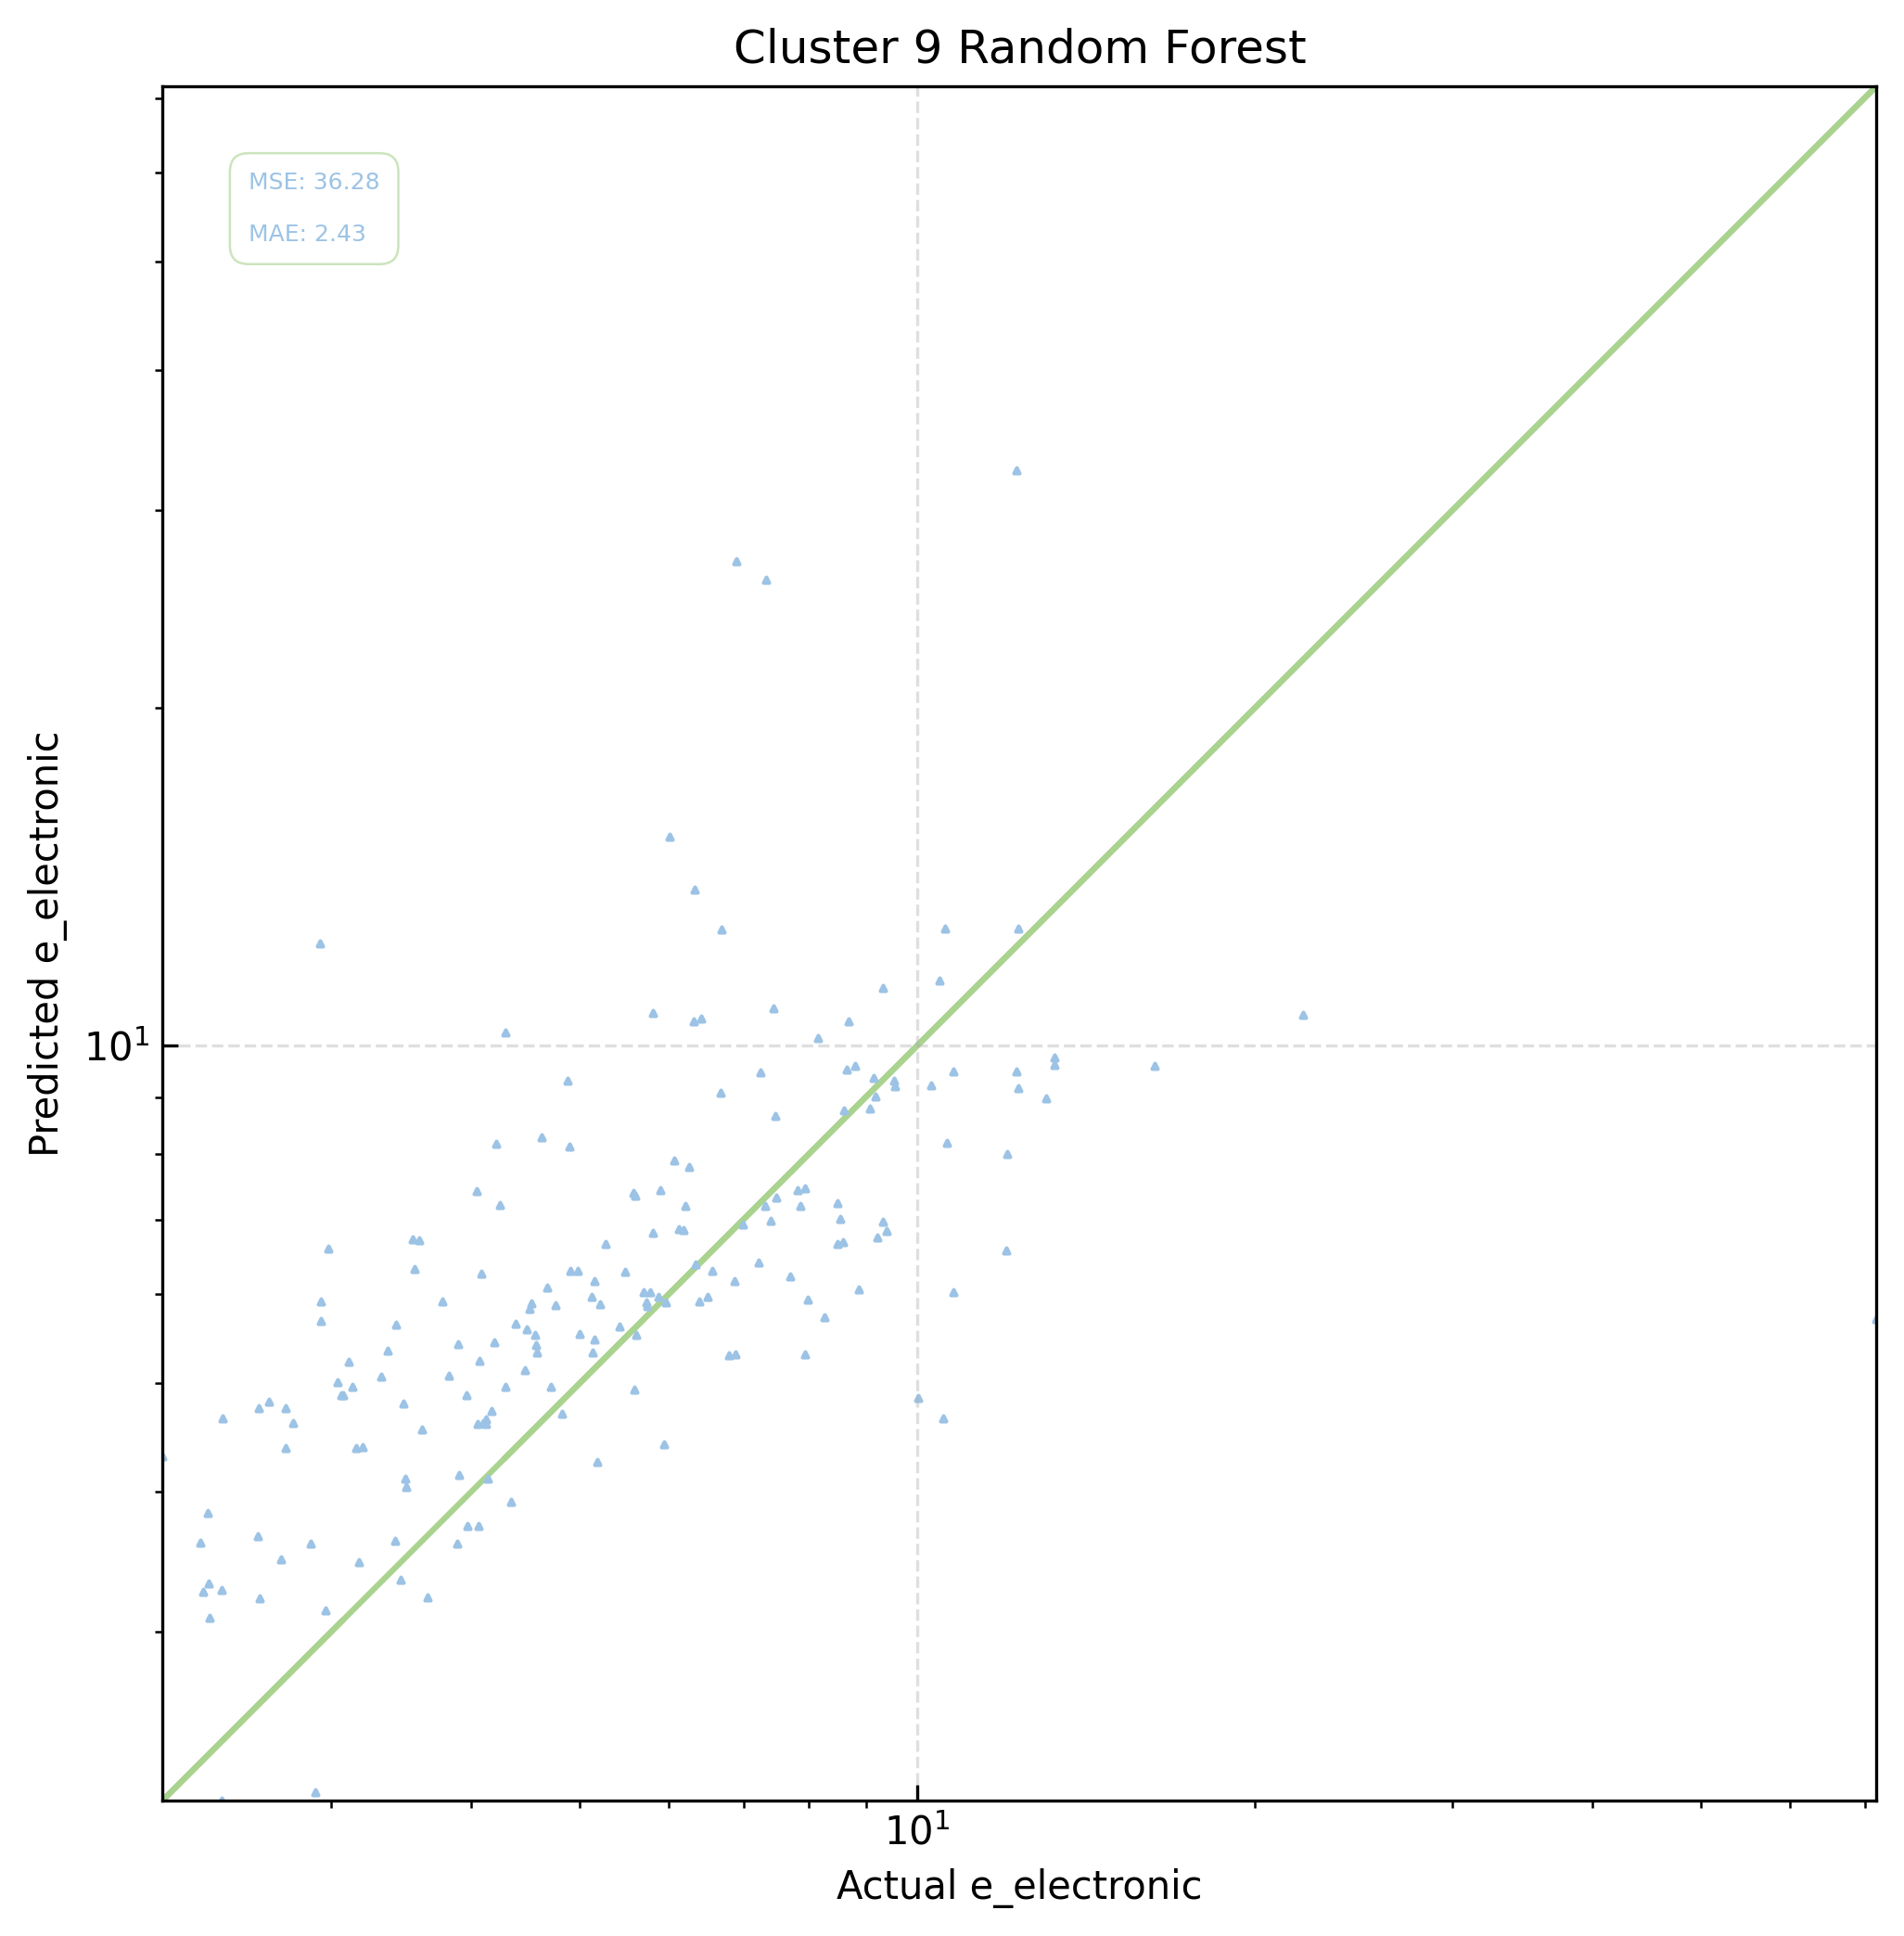

MSE: 3.1233910281472803, MAE: 1.146561467807391


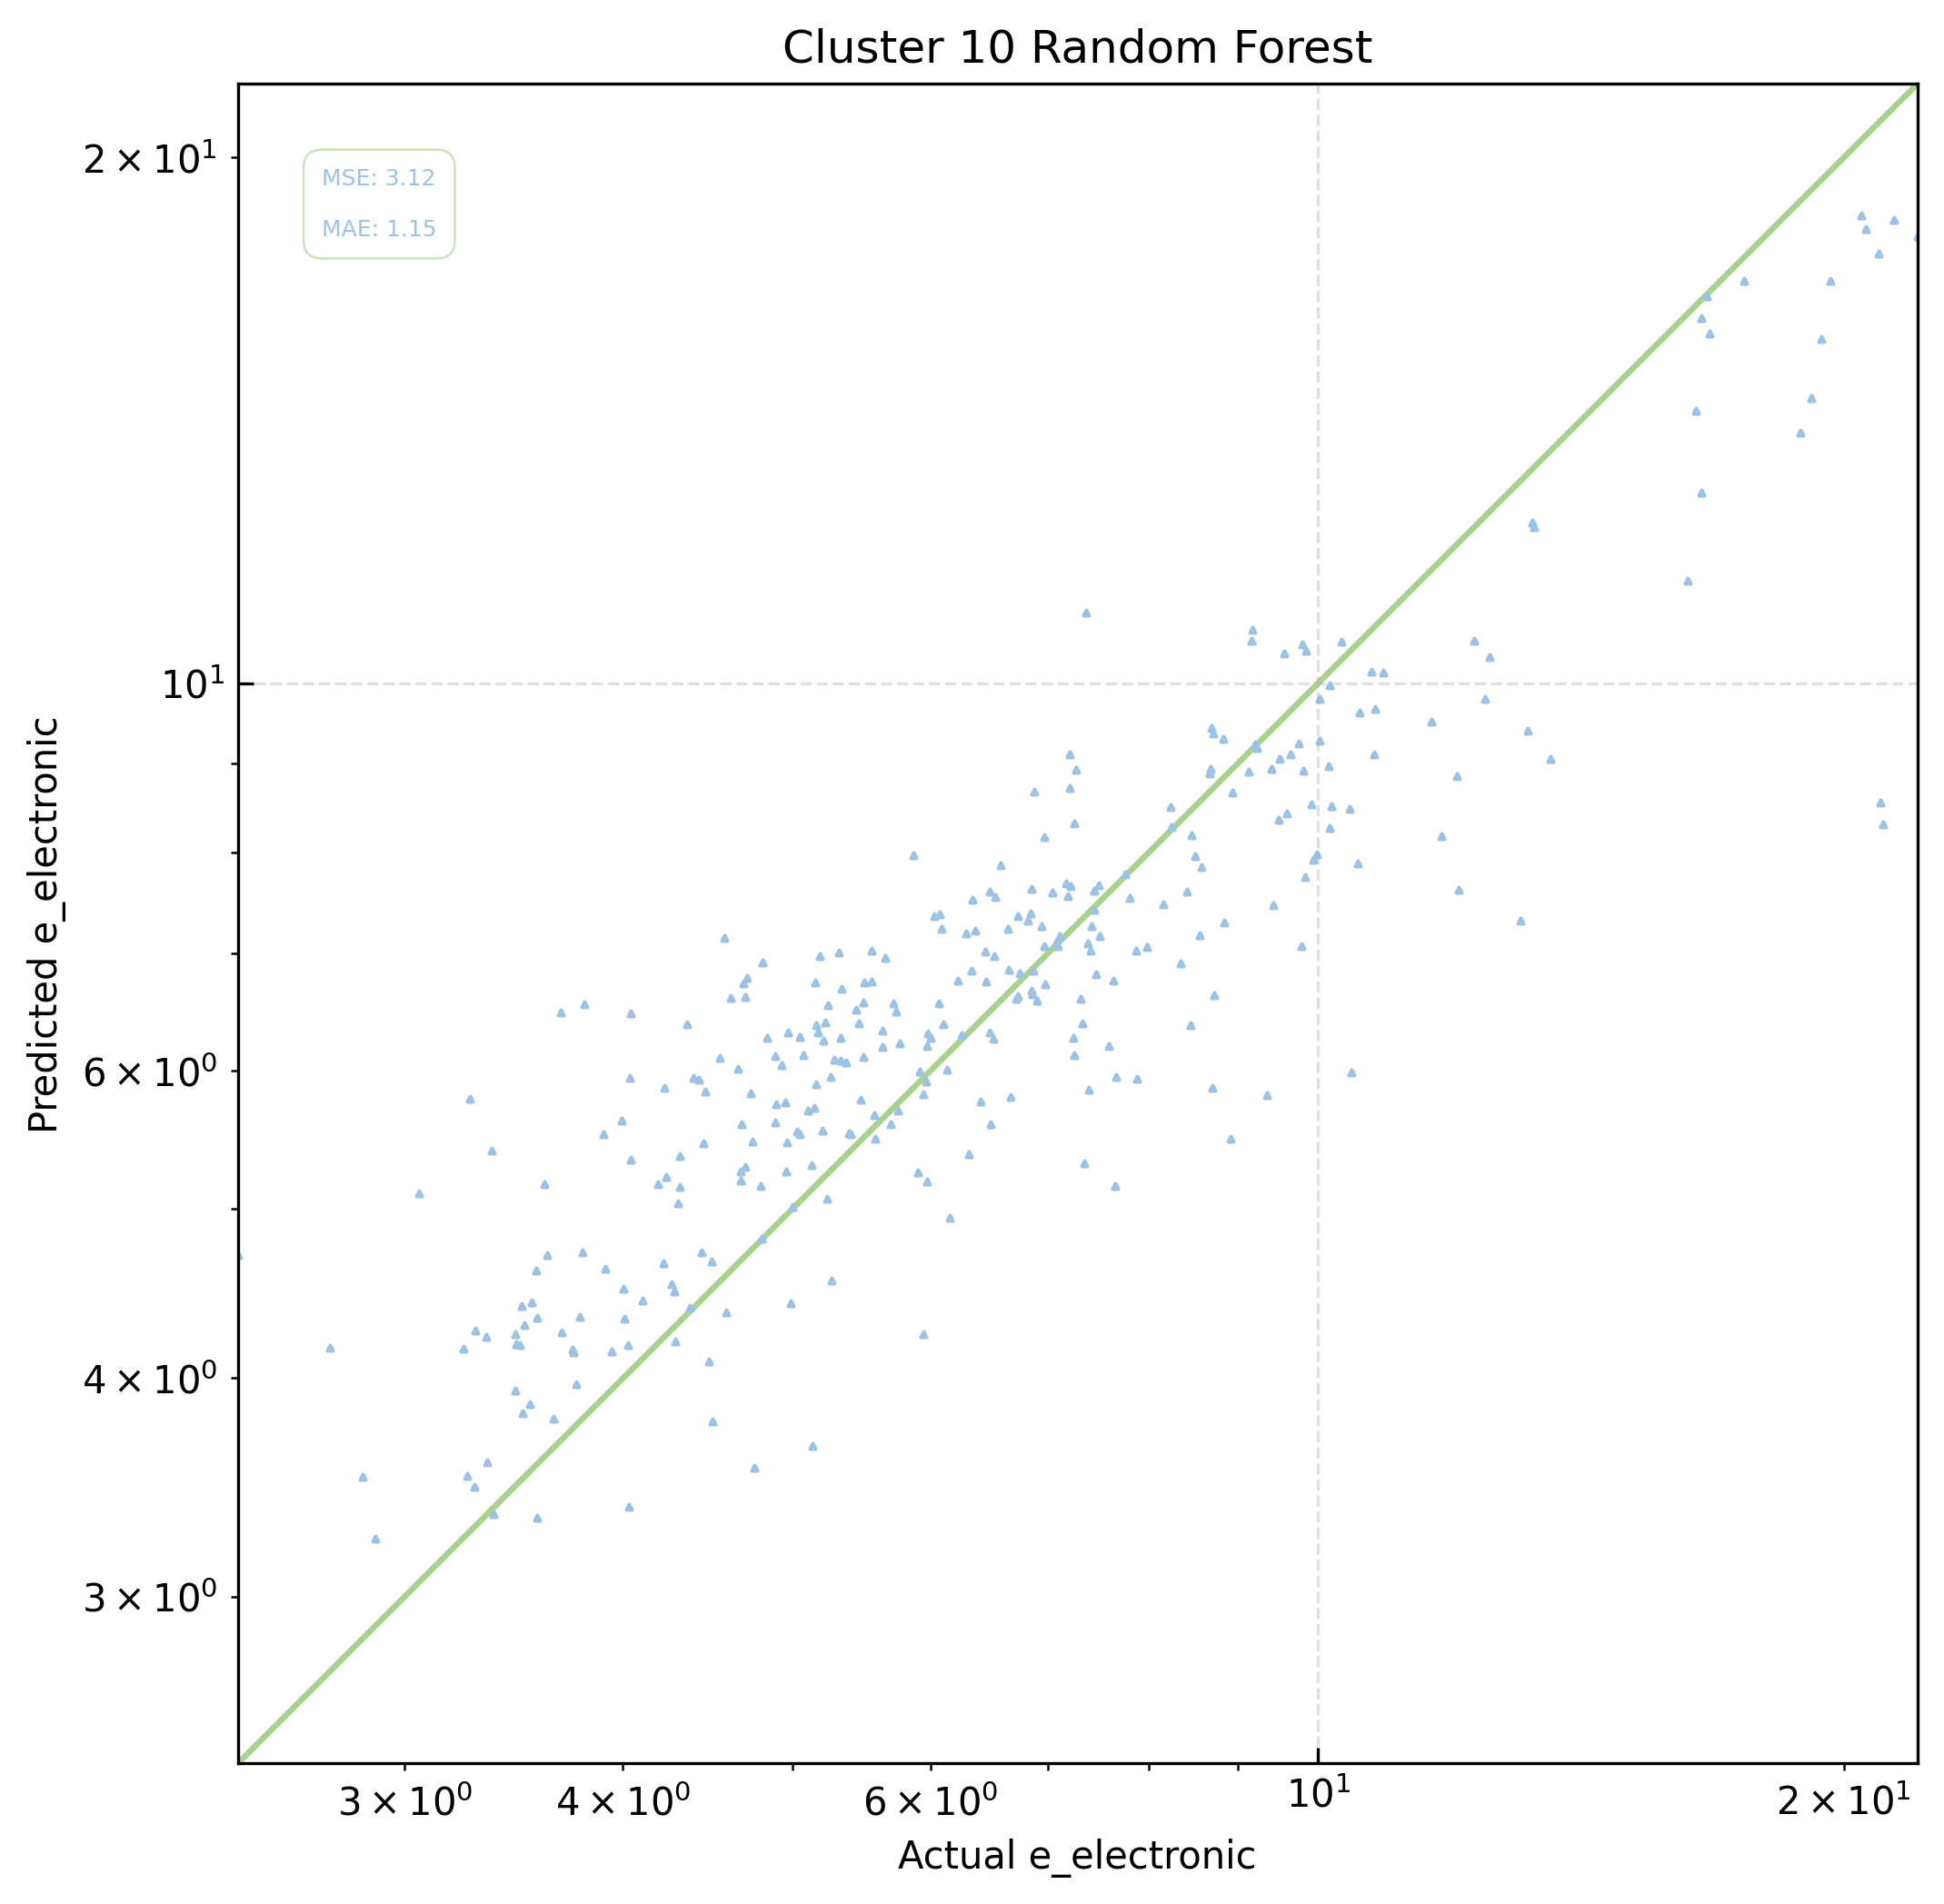

In [342]:
rf_models = []
y_test_all = []
y_pred_all = []

for cluster in range(CLUSTER_NUMS):
    if train_clusters[cluster].shape[0] < MIN_TRAIN_SIZE:
        continue
    rf, y_test, y_pred = random_forest(cluster)
    rf_models.append(rf)
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred)


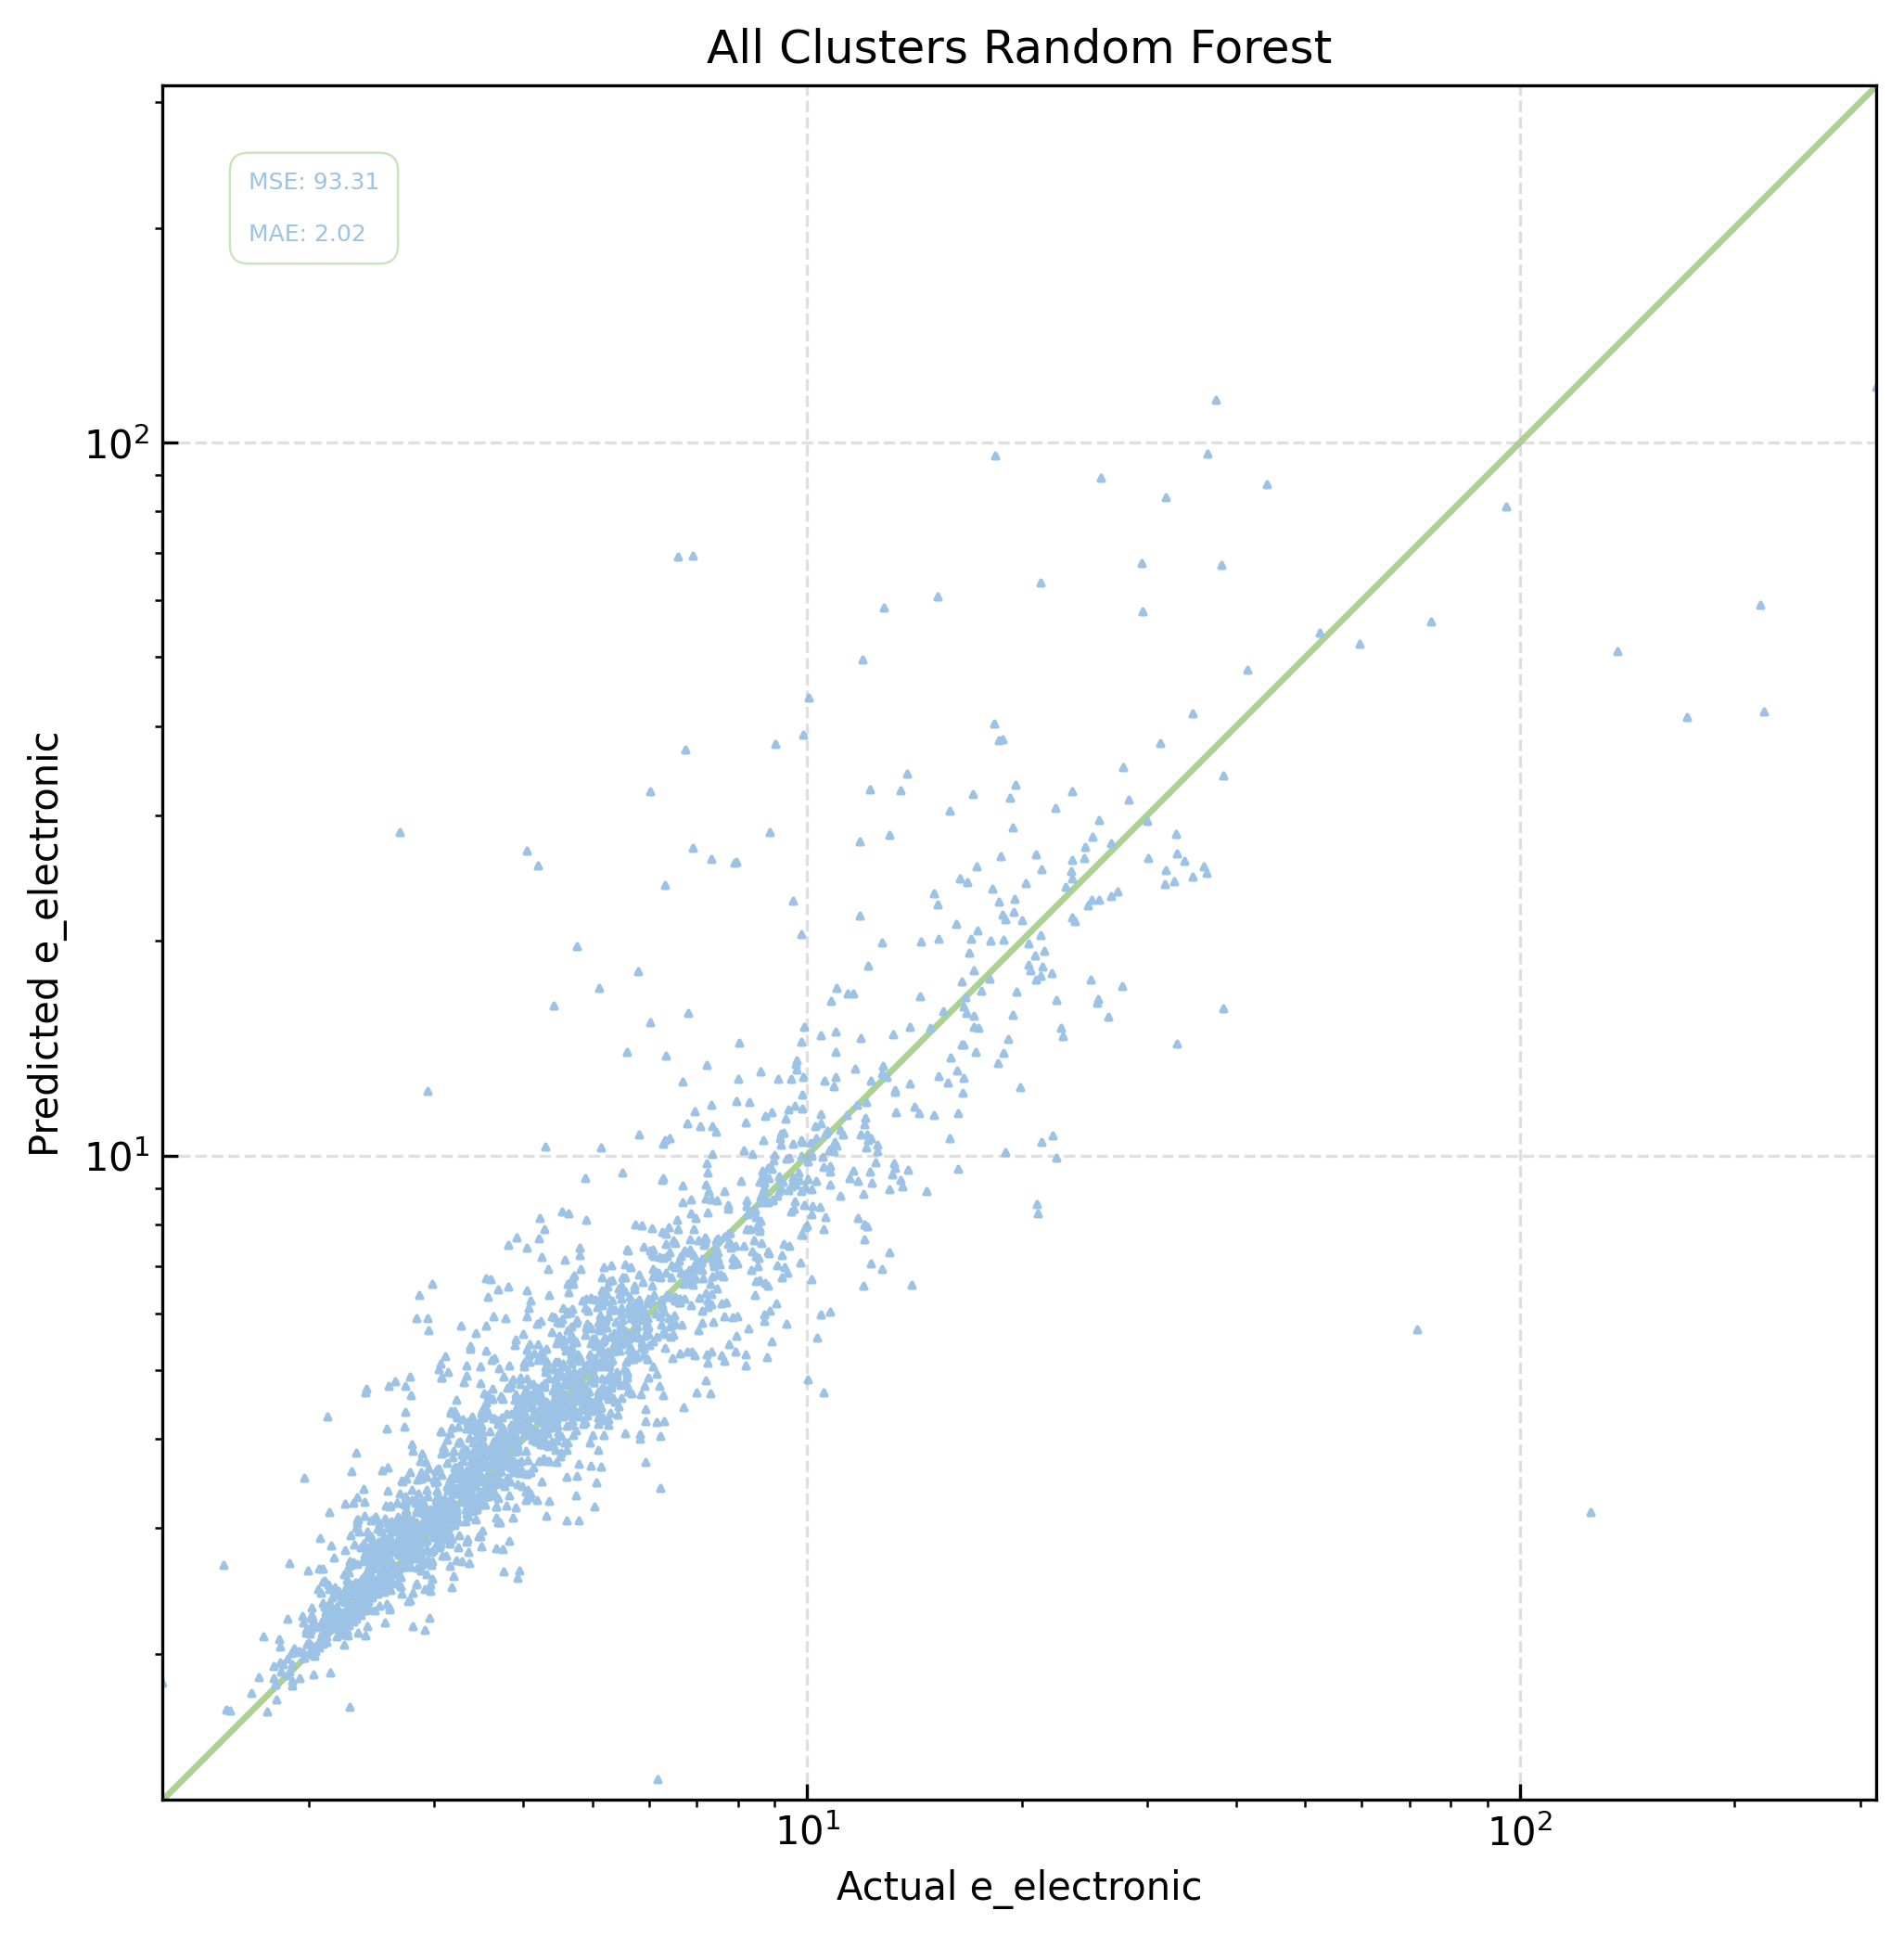

In [343]:
# draw the parity plot of all clusters
mse, mae = mean_squared_error(y_test_all, y_pred_all), mean_absolute_error(y_test_all, y_pred_all)
parity_plot(mse, mae, y_test_all, y_pred_all, y_name=TARGET, title='All Clusters Random Forest', fig_path=FIG_PATH)